In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [317]:
# design network
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(150))
model.add(Dense(1))

Train on 4999 samples, validate on 4999 samples
Epoch 1/20000
 - 6s - loss: 498.9081 - val_loss: 488.5677
Epoch 2/20000
 - 2s - loss: 482.2136 - val_loss: 477.1902
Epoch 3/20000
 - 2s - loss: 473.5756 - val_loss: 470.8850
Epoch 4/20000
 - 2s - loss: 468.7755 - val_loss: 466.6018
Epoch 5/20000
 - 2s - loss: 464.7999 - val_loss: 462.8667
Epoch 6/20000
 - 2s - loss: 461.3119 - val_loss: 459.4566
Epoch 7/20000
 - 2s - loss: 457.9678 - val_loss: 456.1831
Epoch 8/20000
 - 2s - loss: 454.7658 - val_loss: 453.1239
Epoch 9/20000
 - 2s - loss: 451.9341 - val_loss: 450.4446
Epoch 10/20000
 - 2s - loss: 449.4280 - val_loss: 448.0196
Epoch 11/20000
 - 2s - loss: 447.0986 - val_loss: 445.7401
Epoch 12/20000
 - 2s - loss: 445.2417 - val_loss: 443.9499
Epoch 13/20000
 - 2s - loss: 443.3556 - val_loss: 442.2647
Epoch 14/20000
 - 2s - loss: 443.6752 - val_loss: 441.9003
Epoch 15/20000
 - 2s - loss: 427.9634 - val_loss: 439.1709
Epoch 16/20000
 - 2s - loss: 438.7582 - val_loss: 437.7518
Epoch 17/20000
 -

Epoch 139/20000
 - 2s - loss: 293.3139 - val_loss: 304.0526
Epoch 140/20000
 - 2s - loss: 291.5177 - val_loss: 292.1978
Epoch 141/20000
 - 2s - loss: 289.7166 - val_loss: 294.3358
Epoch 142/20000
 - 2s - loss: 289.6377 - val_loss: 292.5742
Epoch 143/20000
 - 2s - loss: 285.7229 - val_loss: 288.4494
Epoch 144/20000
 - 2s - loss: 288.2803 - val_loss: 283.5216
Epoch 145/20000
 - 2s - loss: 281.9642 - val_loss: 282.7704
Epoch 146/20000
 - 2s - loss: 278.4369 - val_loss: 281.2214
Epoch 147/20000
 - 2s - loss: 278.4348 - val_loss: 281.1546
Epoch 148/20000
 - 2s - loss: 277.4348 - val_loss: 276.9108
Epoch 149/20000
 - 2s - loss: 272.8339 - val_loss: 275.6002
Epoch 150/20000
 - 2s - loss: 272.5729 - val_loss: 273.2592
Epoch 151/20000
 - 2s - loss: 270.6924 - val_loss: 276.5652
Epoch 152/20000
 - 2s - loss: 268.7050 - val_loss: 269.5003
Epoch 153/20000
 - 2s - loss: 267.3353 - val_loss: 263.8962
Epoch 154/20000
 - 2s - loss: 263.9865 - val_loss: 258.5409
Epoch 155/20000
 - 2s - loss: 258.8125 -

Epoch 277/20000
 - 2s - loss: 81.1798 - val_loss: 81.6822
Epoch 278/20000
 - 2s - loss: 81.8400 - val_loss: 83.5261
Epoch 279/20000
 - 2s - loss: 81.8684 - val_loss: 80.2293
Epoch 280/20000
 - 2s - loss: 80.7735 - val_loss: 80.3772
Epoch 281/20000
 - 1s - loss: 80.4716 - val_loss: 80.4621
Epoch 282/20000
 - 2s - loss: 81.9365 - val_loss: 88.0764
Epoch 283/20000
 - 2s - loss: 82.8526 - val_loss: 81.5373
Epoch 284/20000
 - 2s - loss: 81.9363 - val_loss: 80.9295
Epoch 285/20000
 - 2s - loss: 82.5670 - val_loss: 79.8501
Epoch 286/20000
 - 2s - loss: 80.2280 - val_loss: 86.0064
Epoch 287/20000
 - 2s - loss: 81.3265 - val_loss: 81.3922
Epoch 288/20000
 - 2s - loss: 82.5957 - val_loss: 79.4353
Epoch 289/20000
 - 1s - loss: 79.3616 - val_loss: 77.4866
Epoch 290/20000
 - 2s - loss: 78.7526 - val_loss: 73.3073
Epoch 291/20000
 - 2s - loss: 76.7446 - val_loss: 74.4906
Epoch 292/20000
 - 2s - loss: 77.7994 - val_loss: 72.6001
Epoch 293/20000
 - 2s - loss: 76.5955 - val_loss: 76.1508
Epoch 294/2000

 - 2s - loss: 53.2995 - val_loss: 47.9279
Epoch 419/20000
 - 2s - loss: 52.3792 - val_loss: 49.4460
Epoch 420/20000
 - 1s - loss: 52.4995 - val_loss: 46.7241
Epoch 421/20000
 - 2s - loss: 51.9625 - val_loss: 47.2169
Epoch 422/20000
 - 2s - loss: 51.6382 - val_loss: 45.4065
Epoch 423/20000
 - 1s - loss: 51.3279 - val_loss: 45.1465
Epoch 424/20000
 - 2s - loss: 49.6935 - val_loss: 45.3830
Epoch 425/20000
 - 2s - loss: 51.6021 - val_loss: 47.3053
Epoch 426/20000
 - 1s - loss: 51.4437 - val_loss: 47.2845
Epoch 427/20000
 - 2s - loss: 51.7240 - val_loss: 47.5245
Epoch 428/20000
 - 2s - loss: 51.6617 - val_loss: 46.7216
Epoch 429/20000
 - 2s - loss: 51.5639 - val_loss: 46.9825
Epoch 430/20000
 - 2s - loss: 50.5339 - val_loss: 47.5359
Epoch 431/20000
 - 2s - loss: 52.5216 - val_loss: 46.6245
Epoch 432/20000
 - 2s - loss: 50.4127 - val_loss: 45.5970
Epoch 433/20000
 - 2s - loss: 49.5777 - val_loss: 44.8192
Epoch 434/20000
 - 2s - loss: 48.3907 - val_loss: 43.0025
Epoch 435/20000
 - 2s - loss: 

Epoch 560/20000
 - 1s - loss: 35.6652 - val_loss: 31.4334
Epoch 561/20000
 - 1s - loss: 35.0919 - val_loss: 32.3037
Epoch 562/20000
 - 2s - loss: 35.4866 - val_loss: 34.6341
Epoch 563/20000
 - 2s - loss: 37.3019 - val_loss: 31.6753
Epoch 564/20000
 - 2s - loss: 35.9480 - val_loss: 31.0868
Epoch 565/20000
 - 1s - loss: 35.5871 - val_loss: 30.7013
Epoch 566/20000
 - 2s - loss: 35.2118 - val_loss: 31.9063
Epoch 567/20000
 - 2s - loss: 36.1989 - val_loss: 31.0211
Epoch 568/20000
 - 2s - loss: 35.0692 - val_loss: 31.9383
Epoch 569/20000
 - 2s - loss: 35.1025 - val_loss: 31.9163
Epoch 570/20000
 - 2s - loss: 35.3682 - val_loss: 31.8063
Epoch 571/20000
 - 2s - loss: 34.5393 - val_loss: 30.6536
Epoch 572/20000
 - 2s - loss: 34.5827 - val_loss: 31.7075
Epoch 573/20000
 - 1s - loss: 36.4710 - val_loss: 31.4510
Epoch 574/20000
 - 2s - loss: 34.6590 - val_loss: 32.4104
Epoch 575/20000
 - 1s - loss: 35.5696 - val_loss: 32.7052
Epoch 576/20000
 - 2s - loss: 35.1776 - val_loss: 30.5340
Epoch 577/2000

 - 2s - loss: 31.2397 - val_loss: 28.3063
Epoch 702/20000
 - 2s - loss: 31.7555 - val_loss: 26.3350
Epoch 703/20000
 - 2s - loss: 30.2726 - val_loss: 26.7428
Epoch 704/20000
 - 2s - loss: 30.1293 - val_loss: 26.5670
Epoch 705/20000
 - 2s - loss: 29.5865 - val_loss: 26.0127
Epoch 706/20000
 - 2s - loss: 29.3353 - val_loss: 24.6948
Epoch 707/20000
 - 2s - loss: 28.7914 - val_loss: 24.7698
Epoch 708/20000
 - 2s - loss: 28.6128 - val_loss: 26.0181
Epoch 709/20000
 - 2s - loss: 29.0459 - val_loss: 26.5295
Epoch 710/20000
 - 2s - loss: 31.4086 - val_loss: 25.8366
Epoch 711/20000
 - 2s - loss: 29.4191 - val_loss: 25.5171
Epoch 712/20000
 - 2s - loss: 29.3906 - val_loss: 25.8251
Epoch 713/20000
 - 2s - loss: 29.6650 - val_loss: 25.0975
Epoch 714/20000
 - 2s - loss: 28.5936 - val_loss: 25.5561
Epoch 715/20000
 - 2s - loss: 29.1330 - val_loss: 25.8496
Epoch 716/20000
 - 2s - loss: 29.7978 - val_loss: 26.1744
Epoch 717/20000
 - 2s - loss: 29.7227 - val_loss: 26.4923
Epoch 718/20000
 - 2s - loss: 

Epoch 843/20000
 - 2s - loss: 27.6762 - val_loss: 24.6198
Epoch 844/20000
 - 2s - loss: 28.2953 - val_loss: 23.8067
Epoch 845/20000
 - 2s - loss: 27.6087 - val_loss: 24.3699
Epoch 846/20000
 - 2s - loss: 28.2027 - val_loss: 23.4551
Epoch 847/20000
 - 2s - loss: 27.7548 - val_loss: 24.4198
Epoch 848/20000
 - 2s - loss: 26.8051 - val_loss: 23.0811
Epoch 849/20000
 - 2s - loss: 26.8243 - val_loss: 22.9968
Epoch 850/20000
 - 2s - loss: 27.5639 - val_loss: 23.7159
Epoch 851/20000
 - 2s - loss: 26.9204 - val_loss: 23.7146
Epoch 852/20000
 - 2s - loss: 26.8262 - val_loss: 23.5232
Epoch 853/20000
 - 2s - loss: 27.0163 - val_loss: 23.6872
Epoch 854/20000
 - 2s - loss: 27.5685 - val_loss: 24.3323
Epoch 855/20000
 - 2s - loss: 27.9507 - val_loss: 24.7647
Epoch 856/20000
 - 2s - loss: 28.5102 - val_loss: 23.8871
Epoch 857/20000
 - 2s - loss: 27.8821 - val_loss: 25.1271
Epoch 858/20000
 - 2s - loss: 29.6333 - val_loss: 22.5714
Epoch 859/20000
 - 2s - loss: 27.8751 - val_loss: 26.7470
Epoch 860/2000

 - 2s - loss: 27.0380 - val_loss: 23.4581
Epoch 985/20000
 - 2s - loss: 27.4033 - val_loss: 24.3113
Epoch 986/20000
 - 2s - loss: 27.2121 - val_loss: 24.5464
Epoch 987/20000
 - 2s - loss: 27.5890 - val_loss: 23.0978
Epoch 988/20000
 - 2s - loss: 26.8616 - val_loss: 22.8365
Epoch 989/20000
 - 2s - loss: 26.5672 - val_loss: 22.3960
Epoch 990/20000
 - 2s - loss: 26.1434 - val_loss: 23.7921
Epoch 991/20000
 - 2s - loss: 26.9416 - val_loss: 23.3799
Epoch 992/20000
 - 2s - loss: 26.8516 - val_loss: 23.1578
Epoch 993/20000
 - 2s - loss: 26.6426 - val_loss: 23.8124
Epoch 994/20000
 - 2s - loss: 26.7297 - val_loss: 23.2197
Epoch 995/20000
 - 2s - loss: 26.9602 - val_loss: 23.4034
Epoch 996/20000
 - 2s - loss: 26.7933 - val_loss: 23.9846
Epoch 997/20000
 - 2s - loss: 27.0377 - val_loss: 22.6622
Epoch 998/20000
 - 2s - loss: 26.8593 - val_loss: 22.3378
Epoch 999/20000
 - 2s - loss: 26.2744 - val_loss: 24.0217
Epoch 1000/20000
 - 2s - loss: 26.6421 - val_loss: 25.1505
Epoch 1001/20000
 - 2s - loss

Epoch 1124/20000
 - 2s - loss: 25.8747 - val_loss: 22.7582
Epoch 1125/20000
 - 2s - loss: 26.2076 - val_loss: 22.9913
Epoch 1126/20000
 - 2s - loss: 26.0898 - val_loss: 22.8143
Epoch 1127/20000
 - 2s - loss: 25.5427 - val_loss: 21.9856
Epoch 1128/20000
 - 2s - loss: 25.5779 - val_loss: 22.7594
Epoch 1129/20000
 - 2s - loss: 25.7148 - val_loss: 22.6061
Epoch 1130/20000
 - 2s - loss: 26.6124 - val_loss: 23.2494
Epoch 1131/20000
 - 2s - loss: 26.4402 - val_loss: 22.5401
Epoch 1132/20000
 - 2s - loss: 26.5920 - val_loss: 22.3131
Epoch 1133/20000
 - 2s - loss: 26.1817 - val_loss: 22.8648
Epoch 1134/20000
 - 2s - loss: 25.9140 - val_loss: 22.9954
Epoch 1135/20000
 - 2s - loss: 26.3285 - val_loss: 23.2893
Epoch 1136/20000
 - 2s - loss: 25.9921 - val_loss: 22.1115
Epoch 1137/20000
 - 2s - loss: 26.4915 - val_loss: 23.3786
Epoch 1138/20000
 - 2s - loss: 26.8217 - val_loss: 21.7461
Epoch 1139/20000
 - 2s - loss: 25.9335 - val_loss: 22.1790
Epoch 1140/20000
 - 2s - loss: 25.9794 - val_loss: 22.10

Epoch 1263/20000
 - 2s - loss: 26.0413 - val_loss: 22.3526
Epoch 1264/20000
 - 2s - loss: 25.9761 - val_loss: 22.0976
Epoch 1265/20000
 - 2s - loss: 25.6300 - val_loss: 21.9020
Epoch 1266/20000
 - 2s - loss: 25.4084 - val_loss: 22.9474
Epoch 1267/20000
 - 2s - loss: 26.5591 - val_loss: 22.5341
Epoch 1268/20000
 - 2s - loss: 26.4107 - val_loss: 22.6325
Epoch 1269/20000
 - 2s - loss: 25.9250 - val_loss: 23.3848
Epoch 1270/20000
 - 2s - loss: 26.1124 - val_loss: 22.3461
Epoch 1271/20000
 - 2s - loss: 25.9536 - val_loss: 22.3889
Epoch 1272/20000
 - 2s - loss: 25.2869 - val_loss: 23.8297
Epoch 1273/20000
 - 2s - loss: 26.7925 - val_loss: 23.9857
Epoch 1274/20000
 - 2s - loss: 25.6462 - val_loss: 22.2149
Epoch 1275/20000
 - 2s - loss: 25.0075 - val_loss: 24.1959
Epoch 1276/20000
 - 2s - loss: 25.2971 - val_loss: 22.1793
Epoch 1277/20000
 - 2s - loss: 25.7684 - val_loss: 22.5039
Epoch 1278/20000
 - 2s - loss: 26.3269 - val_loss: 22.1100
Epoch 1279/20000
 - 2s - loss: 24.8989 - val_loss: 22.42

Epoch 1402/20000
 - 2s - loss: 26.9872 - val_loss: 21.5811
Epoch 1403/20000
 - 2s - loss: 24.1380 - val_loss: 19.9384
Epoch 1404/20000
 - 2s - loss: 23.3610 - val_loss: 19.7447
Epoch 1405/20000
 - 2s - loss: 23.4354 - val_loss: 19.6549
Epoch 1406/20000
 - 2s - loss: 23.9486 - val_loss: 21.0646
Epoch 1407/20000
 - 2s - loss: 23.4935 - val_loss: 18.6667
Epoch 1408/20000
 - 1s - loss: 23.5879 - val_loss: 18.9628
Epoch 1409/20000
 - 2s - loss: 24.1730 - val_loss: 19.2401
Epoch 1410/20000
 - 2s - loss: 23.9777 - val_loss: 20.3758
Epoch 1411/20000
 - 2s - loss: 23.5575 - val_loss: 19.3849
Epoch 1412/20000
 - 1s - loss: 22.8593 - val_loss: 19.0072
Epoch 1413/20000
 - 2s - loss: 23.2203 - val_loss: 18.3775
Epoch 1414/20000
 - 1s - loss: 23.2190 - val_loss: 18.1354
Epoch 1415/20000
 - 2s - loss: 23.4260 - val_loss: 19.2805
Epoch 1416/20000
 - 2s - loss: 22.9377 - val_loss: 18.2897
Epoch 1417/20000
 - 2s - loss: 23.8988 - val_loss: 18.5200
Epoch 1418/20000
 - 2s - loss: 25.1499 - val_loss: 18.50

Epoch 1541/20000
 - 2s - loss: 21.7750 - val_loss: 18.2761
Epoch 1542/20000
 - 2s - loss: 21.1984 - val_loss: 17.7873
Epoch 1543/20000
 - 2s - loss: 21.6735 - val_loss: 18.3754
Epoch 1544/20000
 - 2s - loss: 24.1571 - val_loss: 19.5657
Epoch 1545/20000
 - 2s - loss: 21.6995 - val_loss: 18.1115
Epoch 1546/20000
 - 2s - loss: 21.6169 - val_loss: 17.3960
Epoch 1547/20000
 - 2s - loss: 21.4281 - val_loss: 17.5609
Epoch 1548/20000
 - 2s - loss: 21.6703 - val_loss: 17.8377
Epoch 1549/20000
 - 2s - loss: 21.9485 - val_loss: 18.4318
Epoch 1550/20000
 - 2s - loss: 21.5731 - val_loss: 18.9242
Epoch 1551/20000
 - 2s - loss: 22.3920 - val_loss: 17.9963
Epoch 1552/20000
 - 2s - loss: 21.1567 - val_loss: 18.0523
Epoch 1553/20000
 - 2s - loss: 21.6528 - val_loss: 17.8962
Epoch 1554/20000
 - 2s - loss: 22.6183 - val_loss: 17.6203
Epoch 1555/20000
 - 2s - loss: 22.2519 - val_loss: 17.6944
Epoch 1556/20000
 - 2s - loss: 23.6720 - val_loss: 18.4555
Epoch 1557/20000
 - 2s - loss: 22.1733 - val_loss: 18.61

Epoch 1680/20000
 - 2s - loss: 21.9218 - val_loss: 17.6018
Epoch 1681/20000
 - 2s - loss: 22.2926 - val_loss: 18.3675
Epoch 1682/20000
 - 2s - loss: 23.2566 - val_loss: 17.6538
Epoch 1683/20000
 - 2s - loss: 21.5700 - val_loss: 16.1084
Epoch 1684/20000
 - 2s - loss: 21.7896 - val_loss: 18.0765
Epoch 1685/20000
 - 2s - loss: 21.9929 - val_loss: 17.5245
Epoch 1686/20000
 - 2s - loss: 21.0869 - val_loss: 16.3996
Epoch 1687/20000
 - 2s - loss: 20.6521 - val_loss: 16.3886
Epoch 1688/20000
 - 2s - loss: 21.2158 - val_loss: 17.1938
Epoch 1689/20000
 - 2s - loss: 20.6886 - val_loss: 16.4619
Epoch 1690/20000
 - 2s - loss: 20.3469 - val_loss: 15.3262
Epoch 1691/20000
 - 2s - loss: 20.4385 - val_loss: 15.8095
Epoch 1692/20000
 - 2s - loss: 19.7939 - val_loss: 15.7437
Epoch 1693/20000
 - 2s - loss: 20.5822 - val_loss: 17.0425
Epoch 1694/20000
 - 1s - loss: 20.0865 - val_loss: 16.4594
Epoch 1695/20000
 - 2s - loss: 22.0976 - val_loss: 16.0477
Epoch 1696/20000
 - 2s - loss: 20.8954 - val_loss: 16.84

Epoch 1819/20000
 - 2s - loss: 19.2430 - val_loss: 14.6319
Epoch 1820/20000
 - 2s - loss: 19.1131 - val_loss: 14.3954
Epoch 1821/20000
 - 2s - loss: 20.6529 - val_loss: 15.3279
Epoch 1822/20000
 - 2s - loss: 19.1027 - val_loss: 14.0882
Epoch 1823/20000
 - 2s - loss: 19.1244 - val_loss: 14.1652
Epoch 1824/20000
 - 2s - loss: 18.3031 - val_loss: 13.3822
Epoch 1825/20000
 - 2s - loss: 18.5673 - val_loss: 14.8421
Epoch 1826/20000
 - 2s - loss: 19.1255 - val_loss: 15.0216
Epoch 1827/20000
 - 2s - loss: 19.0700 - val_loss: 16.4610
Epoch 1828/20000
 - 2s - loss: 19.0224 - val_loss: 14.4153
Epoch 1829/20000
 - 2s - loss: 18.8970 - val_loss: 14.0014
Epoch 1830/20000
 - 2s - loss: 19.0997 - val_loss: 14.9693
Epoch 1831/20000
 - 2s - loss: 19.4171 - val_loss: 14.0773
Epoch 1832/20000
 - 2s - loss: 19.2923 - val_loss: 14.1479
Epoch 1833/20000
 - 2s - loss: 19.2503 - val_loss: 13.7571
Epoch 1834/20000
 - 2s - loss: 18.2231 - val_loss: 14.6329
Epoch 1835/20000
 - 2s - loss: 18.9128 - val_loss: 14.59

Epoch 1958/20000
 - 2s - loss: 18.2469 - val_loss: 15.5165
Epoch 1959/20000
 - 2s - loss: 20.6357 - val_loss: 14.9803
Epoch 1960/20000
 - 2s - loss: 18.7769 - val_loss: 13.3339
Epoch 1961/20000
 - 2s - loss: 17.2389 - val_loss: 13.6216
Epoch 1962/20000
 - 2s - loss: 18.5617 - val_loss: 13.6051
Epoch 1963/20000
 - 2s - loss: 17.7507 - val_loss: 13.4234
Epoch 1964/20000
 - 2s - loss: 18.3271 - val_loss: 13.7686
Epoch 1965/20000
 - 2s - loss: 16.9601 - val_loss: 13.5513
Epoch 1966/20000
 - 2s - loss: 18.0335 - val_loss: 14.3040
Epoch 1967/20000
 - 2s - loss: 18.5379 - val_loss: 13.6731
Epoch 1968/20000
 - 2s - loss: 18.0960 - val_loss: 14.4098
Epoch 1969/20000
 - 2s - loss: 20.8439 - val_loss: 15.8258
Epoch 1970/20000
 - 2s - loss: 18.2713 - val_loss: 14.1909
Epoch 1971/20000
 - 2s - loss: 17.5008 - val_loss: 13.1544
Epoch 1972/20000
 - 2s - loss: 17.2719 - val_loss: 13.9085
Epoch 1973/20000
 - 2s - loss: 18.1305 - val_loss: 14.4691
Epoch 1974/20000
 - 2s - loss: 17.7556 - val_loss: 14.52

Epoch 2097/20000
 - 2s - loss: 17.3239 - val_loss: 13.5447
Epoch 2098/20000
 - 2s - loss: 17.0488 - val_loss: 13.9253
Epoch 2099/20000
 - 2s - loss: 16.7684 - val_loss: 13.4218
Epoch 2100/20000
 - 2s - loss: 16.9701 - val_loss: 14.8139
Epoch 2101/20000
 - 2s - loss: 17.3098 - val_loss: 13.9406
Epoch 2102/20000
 - 2s - loss: 17.0605 - val_loss: 13.6324
Epoch 2103/20000
 - 2s - loss: 16.7696 - val_loss: 13.9502
Epoch 2104/20000
 - 2s - loss: 16.5654 - val_loss: 13.8173
Epoch 2105/20000
 - 2s - loss: 16.8284 - val_loss: 13.1388
Epoch 2106/20000
 - 2s - loss: 17.1862 - val_loss: 13.5025
Epoch 2107/20000
 - 2s - loss: 18.7821 - val_loss: 15.9097
Epoch 2108/20000
 - 2s - loss: 18.0352 - val_loss: 13.9047
Epoch 2109/20000
 - 2s - loss: 17.4984 - val_loss: 13.1370
Epoch 2110/20000
 - 2s - loss: 16.7928 - val_loss: 13.0299
Epoch 2111/20000
 - 2s - loss: 17.0153 - val_loss: 14.4083
Epoch 2112/20000
 - 2s - loss: 17.7610 - val_loss: 13.6681
Epoch 2113/20000
 - 2s - loss: 17.8833 - val_loss: 13.74

Epoch 2236/20000
 - 2s - loss: 17.5919 - val_loss: 12.7164
Epoch 2237/20000
 - 2s - loss: 16.9473 - val_loss: 12.3256
Epoch 2238/20000
 - 2s - loss: 16.2087 - val_loss: 12.1459
Epoch 2239/20000
 - 2s - loss: 16.1808 - val_loss: 13.2646
Epoch 2240/20000
 - 2s - loss: 17.2931 - val_loss: 13.6698
Epoch 2241/20000
 - 2s - loss: 16.5981 - val_loss: 12.5858
Epoch 2242/20000
 - 2s - loss: 16.7839 - val_loss: 12.8069
Epoch 2243/20000
 - 2s - loss: 16.5011 - val_loss: 12.7013
Epoch 2244/20000
 - 2s - loss: 16.1631 - val_loss: 12.4569
Epoch 2245/20000
 - 2s - loss: 15.7225 - val_loss: 12.6878
Epoch 2246/20000
 - 2s - loss: 16.8191 - val_loss: 13.0885
Epoch 2247/20000
 - 2s - loss: 17.8712 - val_loss: 13.2517
Epoch 2248/20000
 - 2s - loss: 16.5508 - val_loss: 13.4932
Epoch 2249/20000
 - 2s - loss: 16.8354 - val_loss: 13.5446
Epoch 2250/20000
 - 2s - loss: 16.9631 - val_loss: 13.6835
Epoch 2251/20000
 - 2s - loss: 16.7354 - val_loss: 12.9400
Epoch 2252/20000
 - 2s - loss: 17.5709 - val_loss: 13.33

Epoch 2375/20000
 - 2s - loss: 17.7032 - val_loss: 14.0808
Epoch 2376/20000
 - 2s - loss: 20.0525 - val_loss: 14.9552
Epoch 2377/20000
 - 1s - loss: 16.9701 - val_loss: 14.9175
Epoch 2378/20000
 - 2s - loss: 17.7560 - val_loss: 15.3203
Epoch 2379/20000
 - 1s - loss: 17.5237 - val_loss: 13.1310
Epoch 2380/20000
 - 2s - loss: 16.7467 - val_loss: 13.8868
Epoch 2381/20000
 - 1s - loss: 16.6190 - val_loss: 13.0696
Epoch 2382/20000
 - 2s - loss: 16.6751 - val_loss: 12.9506
Epoch 2383/20000
 - 2s - loss: 16.5259 - val_loss: 14.4970
Epoch 2384/20000
 - 2s - loss: 18.7230 - val_loss: 13.8109
Epoch 2385/20000
 - 2s - loss: 17.0205 - val_loss: 12.0971
Epoch 2386/20000
 - 2s - loss: 15.7658 - val_loss: 11.8482
Epoch 2387/20000
 - 2s - loss: 16.5042 - val_loss: 12.8313
Epoch 2388/20000
 - 2s - loss: 15.9559 - val_loss: 13.6764
Epoch 2389/20000
 - 2s - loss: 17.7123 - val_loss: 13.0861
Epoch 2390/20000
 - 2s - loss: 16.5449 - val_loss: 13.7432
Epoch 2391/20000
 - 2s - loss: 16.7691 - val_loss: 13.57

Epoch 2514/20000
 - 2s - loss: 15.6474 - val_loss: 13.0131
Epoch 2515/20000
 - 1s - loss: 16.2419 - val_loss: 12.7359
Epoch 2516/20000
 - 2s - loss: 15.7504 - val_loss: 12.9540
Epoch 2517/20000
 - 2s - loss: 16.7930 - val_loss: 13.8733
Epoch 2518/20000
 - 2s - loss: 16.2564 - val_loss: 12.2309
Epoch 2519/20000
 - 2s - loss: 15.4177 - val_loss: 12.2610
Epoch 2520/20000
 - 2s - loss: 16.1192 - val_loss: 11.9378
Epoch 2521/20000
 - 2s - loss: 16.2071 - val_loss: 12.0206
Epoch 2522/20000
 - 2s - loss: 15.8226 - val_loss: 11.9896
Epoch 2523/20000
 - 2s - loss: 16.7513 - val_loss: 13.6465
Epoch 2524/20000
 - 2s - loss: 16.0624 - val_loss: 12.9493
Epoch 2525/20000
 - 2s - loss: 16.7798 - val_loss: 13.1970
Epoch 2526/20000
 - 2s - loss: 16.0700 - val_loss: 12.6990
Epoch 2527/20000
 - 2s - loss: 16.6649 - val_loss: 13.2930
Epoch 2528/20000
 - 2s - loss: 16.9440 - val_loss: 14.5492
Epoch 2529/20000
 - 2s - loss: 16.8755 - val_loss: 13.2001
Epoch 2530/20000
 - 2s - loss: 16.6514 - val_loss: 12.67

Epoch 2653/20000
 - 2s - loss: 15.5064 - val_loss: 11.2192
Epoch 2654/20000
 - 2s - loss: 14.4854 - val_loss: 12.0417
Epoch 2655/20000
 - 2s - loss: 15.3824 - val_loss: 12.1627
Epoch 2656/20000
 - 2s - loss: 15.7797 - val_loss: 11.9050
Epoch 2657/20000
 - 2s - loss: 15.8142 - val_loss: 12.3366
Epoch 2658/20000
 - 2s - loss: 17.0610 - val_loss: 12.2615
Epoch 2659/20000
 - 2s - loss: 15.7735 - val_loss: 12.6139
Epoch 2660/20000
 - 2s - loss: 15.7819 - val_loss: 12.5046
Epoch 2661/20000
 - 2s - loss: 16.1291 - val_loss: 12.2337
Epoch 2662/20000
 - 2s - loss: 15.8179 - val_loss: 13.1724
Epoch 2663/20000
 - 2s - loss: 15.7333 - val_loss: 11.6439
Epoch 2664/20000
 - 2s - loss: 15.6378 - val_loss: 13.2419
Epoch 2665/20000
 - 1s - loss: 15.9994 - val_loss: 14.3346
Epoch 2666/20000
 - 2s - loss: 16.7872 - val_loss: 12.0463
Epoch 2667/20000
 - 2s - loss: 15.2791 - val_loss: 12.1256
Epoch 2668/20000
 - 2s - loss: 15.0546 - val_loss: 11.6357
Epoch 2669/20000
 - 2s - loss: 15.9460 - val_loss: 11.61

Epoch 2792/20000
 - 2s - loss: 15.3668 - val_loss: 11.3376
Epoch 2793/20000
 - 2s - loss: 15.0794 - val_loss: 12.0875
Epoch 2794/20000
 - 1s - loss: 15.3679 - val_loss: 11.4837
Epoch 2795/20000
 - 2s - loss: 16.0157 - val_loss: 12.5765
Epoch 2796/20000
 - 2s - loss: 16.1175 - val_loss: 12.5759
Epoch 2797/20000
 - 1s - loss: 15.7104 - val_loss: 12.7774
Epoch 2798/20000
 - 1s - loss: 15.6053 - val_loss: 12.0708
Epoch 2799/20000
 - 2s - loss: 15.4379 - val_loss: 12.1470
Epoch 2800/20000
 - 2s - loss: 15.2221 - val_loss: 11.7293
Epoch 2801/20000
 - 2s - loss: 15.3666 - val_loss: 12.2692
Epoch 2802/20000
 - 2s - loss: 15.2202 - val_loss: 10.9020
Epoch 2803/20000
 - 2s - loss: 14.5041 - val_loss: 11.5751
Epoch 2804/20000
 - 1s - loss: 15.8011 - val_loss: 12.6470
Epoch 2805/20000
 - 1s - loss: 17.0529 - val_loss: 12.8695
Epoch 2806/20000
 - 2s - loss: 15.1786 - val_loss: 11.5519
Epoch 2807/20000
 - 1s - loss: 16.0031 - val_loss: 12.0071
Epoch 2808/20000
 - 1s - loss: 15.5156 - val_loss: 11.36

Epoch 2931/20000
 - 2s - loss: 15.9790 - val_loss: 11.9909
Epoch 2932/20000
 - 2s - loss: 16.3749 - val_loss: 12.2330
Epoch 2933/20000
 - 2s - loss: 15.2792 - val_loss: 12.1123
Epoch 2934/20000
 - 2s - loss: 15.3629 - val_loss: 11.6237
Epoch 2935/20000
 - 2s - loss: 14.7198 - val_loss: 11.7426
Epoch 2936/20000
 - 2s - loss: 14.4564 - val_loss: 11.6329
Epoch 2937/20000
 - 2s - loss: 14.6752 - val_loss: 11.9480
Epoch 2938/20000
 - 2s - loss: 15.0302 - val_loss: 11.7189
Epoch 2939/20000
 - 2s - loss: 14.8552 - val_loss: 11.1777
Epoch 2940/20000
 - 2s - loss: 14.8764 - val_loss: 12.0345
Epoch 2941/20000
 - 2s - loss: 15.5275 - val_loss: 11.6070
Epoch 2942/20000
 - 2s - loss: 15.1881 - val_loss: 11.6976
Epoch 2943/20000
 - 2s - loss: 15.2329 - val_loss: 11.0169
Epoch 2944/20000
 - 2s - loss: 15.1125 - val_loss: 10.9607
Epoch 2945/20000
 - 2s - loss: 14.8213 - val_loss: 11.3299
Epoch 2946/20000
 - 2s - loss: 15.3897 - val_loss: 11.8989
Epoch 2947/20000
 - 2s - loss: 15.1509 - val_loss: 12.63

Epoch 3070/20000
 - 2s - loss: 16.2215 - val_loss: 12.2300
Epoch 3071/20000
 - 2s - loss: 15.3287 - val_loss: 12.1585
Epoch 3072/20000
 - 2s - loss: 15.3751 - val_loss: 11.1827
Epoch 3073/20000
 - 2s - loss: 15.5425 - val_loss: 11.5596
Epoch 3074/20000
 - 2s - loss: 15.4140 - val_loss: 11.2577
Epoch 3075/20000
 - 2s - loss: 15.8941 - val_loss: 11.9327
Epoch 3076/20000
 - 2s - loss: 16.3069 - val_loss: 11.5547
Epoch 3077/20000
 - 2s - loss: 16.0689 - val_loss: 12.5792
Epoch 3078/20000
 - 2s - loss: 15.2960 - val_loss: 12.3979
Epoch 3079/20000
 - 2s - loss: 16.1828 - val_loss: 12.5272
Epoch 3080/20000
 - 2s - loss: 15.3901 - val_loss: 11.5543
Epoch 3081/20000
 - 2s - loss: 15.5939 - val_loss: 11.7485
Epoch 3082/20000
 - 2s - loss: 15.7900 - val_loss: 11.2173
Epoch 3083/20000
 - 1s - loss: 14.9797 - val_loss: 12.0047
Epoch 3084/20000
 - 2s - loss: 15.3635 - val_loss: 12.3058
Epoch 3085/20000
 - 2s - loss: 16.2714 - val_loss: 13.0308
Epoch 3086/20000
 - 2s - loss: 16.1930 - val_loss: 11.97

Epoch 3209/20000
 - 2s - loss: 15.3536 - val_loss: 11.2670
Epoch 3210/20000
 - 2s - loss: 14.6734 - val_loss: 11.7739
Epoch 3211/20000
 - 2s - loss: 15.3598 - val_loss: 11.6504
Epoch 3212/20000
 - 2s - loss: 14.8814 - val_loss: 11.9717
Epoch 3213/20000
 - 2s - loss: 14.6898 - val_loss: 11.5049
Epoch 3214/20000
 - 2s - loss: 15.7814 - val_loss: 12.3750
Epoch 3215/20000
 - 2s - loss: 16.0406 - val_loss: 12.5965
Epoch 3216/20000
 - 2s - loss: 15.4428 - val_loss: 11.4928
Epoch 3217/20000
 - 2s - loss: 14.6068 - val_loss: 11.2803
Epoch 3218/20000
 - 2s - loss: 14.6697 - val_loss: 11.5148
Epoch 3219/20000
 - 2s - loss: 14.6849 - val_loss: 11.5999
Epoch 3220/20000
 - 2s - loss: 14.1649 - val_loss: 10.9445
Epoch 3221/20000
 - 2s - loss: 14.7264 - val_loss: 11.7005
Epoch 3222/20000
 - 2s - loss: 14.6651 - val_loss: 11.2387
Epoch 3223/20000
 - 2s - loss: 15.8702 - val_loss: 12.1221
Epoch 3224/20000
 - 2s - loss: 15.1531 - val_loss: 11.8738
Epoch 3225/20000
 - 2s - loss: 14.8069 - val_loss: 11.90

Epoch 3348/20000
 - 2s - loss: 15.2675 - val_loss: 12.6202
Epoch 3349/20000
 - 2s - loss: 15.2038 - val_loss: 12.1883
Epoch 3350/20000
 - 2s - loss: 15.1669 - val_loss: 11.3407
Epoch 3351/20000
 - 2s - loss: 15.3022 - val_loss: 10.9779
Epoch 3352/20000
 - 2s - loss: 15.0397 - val_loss: 11.6846
Epoch 3353/20000
 - 2s - loss: 14.7349 - val_loss: 10.8838
Epoch 3354/20000
 - 2s - loss: 15.3372 - val_loss: 11.0318
Epoch 3355/20000
 - 2s - loss: 14.6200 - val_loss: 11.2401
Epoch 3356/20000
 - 2s - loss: 15.1406 - val_loss: 11.3320
Epoch 3357/20000
 - 2s - loss: 14.5166 - val_loss: 11.1693
Epoch 3358/20000
 - 2s - loss: 14.3531 - val_loss: 11.3381
Epoch 3359/20000
 - 2s - loss: 14.3215 - val_loss: 10.9071
Epoch 3360/20000
 - 2s - loss: 14.9736 - val_loss: 11.8139
Epoch 3361/20000
 - 2s - loss: 14.5680 - val_loss: 11.4099
Epoch 3362/20000
 - 2s - loss: 15.6535 - val_loss: 11.4308
Epoch 3363/20000
 - 2s - loss: 14.8203 - val_loss: 11.1569
Epoch 3364/20000
 - 2s - loss: 14.4396 - val_loss: 11.12

Epoch 3487/20000
 - 2s - loss: 15.0836 - val_loss: 11.9439
Epoch 3488/20000
 - 2s - loss: 15.6600 - val_loss: 11.6138
Epoch 3489/20000
 - 2s - loss: 16.4493 - val_loss: 11.3028
Epoch 3490/20000
 - 2s - loss: 16.2268 - val_loss: 11.0757
Epoch 3491/20000
 - 2s - loss: 15.4892 - val_loss: 11.5139
Epoch 3492/20000
 - 2s - loss: 15.1247 - val_loss: 11.7817
Epoch 3493/20000
 - 2s - loss: 14.4574 - val_loss: 12.0312
Epoch 3494/20000
 - 2s - loss: 15.7915 - val_loss: 10.5002
Epoch 3495/20000
 - 2s - loss: 14.1022 - val_loss: 10.7623
Epoch 3496/20000
 - 2s - loss: 14.8939 - val_loss: 11.1457
Epoch 3497/20000
 - 2s - loss: 14.9397 - val_loss: 11.6791
Epoch 3498/20000
 - 2s - loss: 15.4923 - val_loss: 11.1636
Epoch 3499/20000
 - 2s - loss: 15.1284 - val_loss: 10.8805
Epoch 3500/20000
 - 2s - loss: 14.7377 - val_loss: 11.6817
Epoch 3501/20000
 - 2s - loss: 15.5134 - val_loss: 12.2766
Epoch 3502/20000
 - 2s - loss: 15.2759 - val_loss: 10.8492
Epoch 3503/20000
 - 2s - loss: 14.9823 - val_loss: 11.83

Epoch 3626/20000
 - 2s - loss: 14.5650 - val_loss: 11.7388
Epoch 3627/20000
 - 2s - loss: 14.9476 - val_loss: 11.2363
Epoch 3628/20000
 - 2s - loss: 14.7153 - val_loss: 13.0534
Epoch 3629/20000
 - 2s - loss: 14.9973 - val_loss: 11.6952
Epoch 3630/20000
 - 2s - loss: 16.3314 - val_loss: 12.3923
Epoch 3631/20000
 - 2s - loss: 16.4670 - val_loss: 11.5451
Epoch 3632/20000
 - 2s - loss: 15.1046 - val_loss: 11.5248
Epoch 3633/20000
 - 2s - loss: 14.7085 - val_loss: 11.0588
Epoch 3634/20000
 - 2s - loss: 15.5108 - val_loss: 11.8879
Epoch 3635/20000
 - 2s - loss: 15.8568 - val_loss: 12.4121
Epoch 3636/20000
 - 2s - loss: 15.0610 - val_loss: 11.4318
Epoch 3637/20000
 - 2s - loss: 14.9633 - val_loss: 11.5266
Epoch 3638/20000
 - 2s - loss: 14.5052 - val_loss: 10.8680
Epoch 3639/20000
 - 2s - loss: 14.5057 - val_loss: 12.0529
Epoch 3640/20000
 - 2s - loss: 14.6178 - val_loss: 11.2140
Epoch 3641/20000
 - 2s - loss: 14.9281 - val_loss: 11.4050
Epoch 3642/20000
 - 2s - loss: 14.4361 - val_loss: 11.16

Epoch 3765/20000
 - 2s - loss: 14.3487 - val_loss: 10.7116
Epoch 3766/20000
 - 2s - loss: 14.3945 - val_loss: 11.6329
Epoch 3767/20000
 - 2s - loss: 14.7244 - val_loss: 11.1140
Epoch 3768/20000
 - 2s - loss: 14.6757 - val_loss: 10.7189
Epoch 3769/20000
 - 2s - loss: 14.4535 - val_loss: 10.9954
Epoch 3770/20000
 - 2s - loss: 15.1153 - val_loss: 11.1592
Epoch 3771/20000
 - 2s - loss: 14.6199 - val_loss: 11.4502
Epoch 3772/20000
 - 2s - loss: 15.0622 - val_loss: 11.3121
Epoch 3773/20000
 - 2s - loss: 14.6569 - val_loss: 10.8867
Epoch 3774/20000
 - 2s - loss: 14.5042 - val_loss: 10.9095
Epoch 3775/20000
 - 2s - loss: 14.5542 - val_loss: 11.1220
Epoch 3776/20000
 - 2s - loss: 14.5240 - val_loss: 11.4550
Epoch 3777/20000
 - 2s - loss: 15.3705 - val_loss: 10.9786
Epoch 3778/20000
 - 1s - loss: 14.4635 - val_loss: 11.1928
Epoch 3779/20000
 - 1s - loss: 14.9629 - val_loss: 10.9577
Epoch 3780/20000
 - 2s - loss: 14.9639 - val_loss: 11.3156
Epoch 3781/20000
 - 2s - loss: 14.9750 - val_loss: 11.44

Epoch 3904/20000
 - 2s - loss: 15.1979 - val_loss: 11.8448
Epoch 3905/20000
 - 2s - loss: 15.1472 - val_loss: 12.5484
Epoch 3906/20000
 - 2s - loss: 15.1179 - val_loss: 12.0965
Epoch 3907/20000
 - 2s - loss: 14.6442 - val_loss: 11.9621
Epoch 3908/20000
 - 1s - loss: 14.1487 - val_loss: 11.2033
Epoch 3909/20000
 - 2s - loss: 14.2998 - val_loss: 10.8570
Epoch 3910/20000
 - 2s - loss: 14.3179 - val_loss: 11.3288
Epoch 3911/20000
 - 2s - loss: 14.8285 - val_loss: 11.0767
Epoch 3912/20000
 - 2s - loss: 15.0676 - val_loss: 11.8958
Epoch 3913/20000
 - 2s - loss: 15.8608 - val_loss: 11.5185
Epoch 3914/20000
 - 2s - loss: 15.2589 - val_loss: 11.6013
Epoch 3915/20000
 - 2s - loss: 15.0076 - val_loss: 11.9237
Epoch 3916/20000
 - 1s - loss: 14.7759 - val_loss: 11.6747
Epoch 3917/20000
 - 2s - loss: 14.4272 - val_loss: 11.3116
Epoch 3918/20000
 - 2s - loss: 14.7457 - val_loss: 11.2412
Epoch 3919/20000
 - 2s - loss: 14.8002 - val_loss: 11.5287
Epoch 3920/20000
 - 1s - loss: 14.1209 - val_loss: 12.02

Epoch 4043/20000
 - 2s - loss: 14.1291 - val_loss: 10.7062
Epoch 4044/20000
 - 2s - loss: 14.5474 - val_loss: 10.8219
Epoch 4045/20000
 - 2s - loss: 14.2789 - val_loss: 10.8438
Epoch 4046/20000
 - 2s - loss: 14.5475 - val_loss: 11.5740
Epoch 4047/20000
 - 2s - loss: 14.4006 - val_loss: 11.9000
Epoch 4048/20000
 - 2s - loss: 15.3059 - val_loss: 12.6154
Epoch 4049/20000
 - 2s - loss: 16.4575 - val_loss: 11.2207
Epoch 4050/20000
 - 2s - loss: 15.0723 - val_loss: 11.8518
Epoch 4051/20000
 - 2s - loss: 15.7015 - val_loss: 11.9930
Epoch 4052/20000
 - 2s - loss: 14.9600 - val_loss: 10.8380
Epoch 4053/20000
 - 2s - loss: 15.0234 - val_loss: 10.4590
Epoch 4054/20000
 - 2s - loss: 14.2386 - val_loss: 10.5818
Epoch 4055/20000
 - 2s - loss: 14.4066 - val_loss: 11.1970
Epoch 4056/20000
 - 2s - loss: 14.7187 - val_loss: 11.9794
Epoch 4057/20000
 - 2s - loss: 14.7498 - val_loss: 11.3689
Epoch 4058/20000
 - 2s - loss: 14.9776 - val_loss: 11.1828
Epoch 4059/20000
 - 2s - loss: 15.2588 - val_loss: 11.17

Epoch 4182/20000
 - 2s - loss: 16.2904 - val_loss: 12.5357
Epoch 4183/20000
 - 2s - loss: 17.0305 - val_loss: 12.6932
Epoch 4184/20000
 - 3s - loss: 16.6262 - val_loss: 12.4743
Epoch 4185/20000
 - 2s - loss: 16.3065 - val_loss: 11.7396
Epoch 4186/20000
 - 2s - loss: 16.0164 - val_loss: 11.8956
Epoch 4187/20000
 - 2s - loss: 16.3983 - val_loss: 11.5522
Epoch 4188/20000
 - 2s - loss: 15.0959 - val_loss: 12.4391
Epoch 4189/20000
 - 2s - loss: 15.3131 - val_loss: 11.2527
Epoch 4190/20000
 - 2s - loss: 14.4637 - val_loss: 10.7705
Epoch 4191/20000
 - 3s - loss: 14.2330 - val_loss: 11.4136
Epoch 4192/20000
 - 2s - loss: 15.0503 - val_loss: 11.0553
Epoch 4193/20000
 - 2s - loss: 14.3830 - val_loss: 10.7365
Epoch 4194/20000
 - 3s - loss: 13.7935 - val_loss: 10.5616
Epoch 4195/20000
 - 3s - loss: 15.2562 - val_loss: 11.4397
Epoch 4196/20000
 - 3s - loss: 15.4518 - val_loss: 11.1340
Epoch 4197/20000
 - 3s - loss: 15.9443 - val_loss: 11.3450
Epoch 4198/20000
 - 2s - loss: 14.6355 - val_loss: 11.75

Epoch 4321/20000
 - 3s - loss: 14.1837 - val_loss: 12.2962
Epoch 4322/20000
 - 3s - loss: 15.4823 - val_loss: 11.1249
Epoch 4323/20000
 - 3s - loss: 15.3112 - val_loss: 12.2888
Epoch 4324/20000
 - 3s - loss: 14.9568 - val_loss: 11.3522
Epoch 4325/20000
 - 3s - loss: 15.0001 - val_loss: 11.2922
Epoch 4326/20000
 - 3s - loss: 15.0123 - val_loss: 11.3421
Epoch 4327/20000
 - 3s - loss: 15.5307 - val_loss: 10.3920
Epoch 4328/20000
 - 3s - loss: 14.3892 - val_loss: 10.6577
Epoch 4329/20000
 - 3s - loss: 14.9349 - val_loss: 10.7966
Epoch 4330/20000
 - 3s - loss: 14.3624 - val_loss: 10.7814
Epoch 4331/20000
 - 3s - loss: 14.5213 - val_loss: 11.3108
Epoch 4332/20000
 - 3s - loss: 14.3112 - val_loss: 10.9209
Epoch 4333/20000
 - 3s - loss: 14.3387 - val_loss: 10.7756
Epoch 4334/20000
 - 3s - loss: 14.4625 - val_loss: 10.5713
Epoch 4335/20000
 - 3s - loss: 14.6127 - val_loss: 10.7016
Epoch 4336/20000
 - 3s - loss: 14.4748 - val_loss: 10.6752
Epoch 4337/20000
 - 3s - loss: 14.8903 - val_loss: 10.44

Epoch 4460/20000
 - 2s - loss: 15.6706 - val_loss: 10.7554
Epoch 4461/20000
 - 2s - loss: 14.7867 - val_loss: 11.0199
Epoch 4462/20000
 - 2s - loss: 14.3882 - val_loss: 10.8289
Epoch 4463/20000
 - 2s - loss: 14.2787 - val_loss: 11.0836
Epoch 4464/20000
 - 2s - loss: 14.4351 - val_loss: 10.6944
Epoch 4465/20000
 - 2s - loss: 13.8196 - val_loss: 10.6722
Epoch 4466/20000
 - 2s - loss: 14.2079 - val_loss: 10.8484
Epoch 4467/20000
 - 2s - loss: 15.9834 - val_loss: 12.2106
Epoch 4468/20000
 - 2s - loss: 15.4474 - val_loss: 13.0453
Epoch 4469/20000
 - 2s - loss: 15.7142 - val_loss: 12.1404
Epoch 4470/20000
 - 2s - loss: 14.3663 - val_loss: 11.6964
Epoch 4471/20000
 - 2s - loss: 14.5008 - val_loss: 10.7434
Epoch 4472/20000
 - 2s - loss: 14.3558 - val_loss: 11.1509
Epoch 4473/20000
 - 3s - loss: 14.6197 - val_loss: 10.8235
Epoch 4474/20000
 - 3s - loss: 14.3677 - val_loss: 11.2138
Epoch 4475/20000
 - 2s - loss: 14.4460 - val_loss: 10.7310
Epoch 4476/20000
 - 2s - loss: 13.8552 - val_loss: 10.75

Epoch 4599/20000
 - 2s - loss: 16.5488 - val_loss: 13.1984
Epoch 4600/20000
 - 2s - loss: 16.8092 - val_loss: 13.0160
Epoch 4601/20000
 - 3s - loss: 16.2999 - val_loss: 12.6471
Epoch 4602/20000
 - 3s - loss: 16.2813 - val_loss: 14.2750
Epoch 4603/20000
 - 2s - loss: 16.6971 - val_loss: 12.2701
Epoch 4604/20000
 - 2s - loss: 15.7465 - val_loss: 12.0963
Epoch 4605/20000
 - 2s - loss: 15.7158 - val_loss: 12.2744
Epoch 4606/20000
 - 2s - loss: 15.4176 - val_loss: 11.9679
Epoch 4607/20000
 - 2s - loss: 15.3927 - val_loss: 11.2517
Epoch 4608/20000
 - 2s - loss: 14.7806 - val_loss: 11.4593
Epoch 4609/20000
 - 2s - loss: 14.3603 - val_loss: 10.9125
Epoch 4610/20000
 - 2s - loss: 14.4569 - val_loss: 11.6958
Epoch 4611/20000
 - 2s - loss: 14.9372 - val_loss: 12.5206
Epoch 4612/20000
 - 2s - loss: 15.9288 - val_loss: 12.3096
Epoch 4613/20000
 - 2s - loss: 15.0627 - val_loss: 11.0286
Epoch 4614/20000
 - 2s - loss: 14.3249 - val_loss: 10.9773
Epoch 4615/20000
 - 2s - loss: 14.5099 - val_loss: 10.90

Epoch 4738/20000
 - 2s - loss: 14.5345 - val_loss: 10.8826
Epoch 4739/20000
 - 2s - loss: 14.4637 - val_loss: 11.1420
Epoch 4740/20000
 - 2s - loss: 14.4470 - val_loss: 11.5649
Epoch 4741/20000
 - 2s - loss: 15.1391 - val_loss: 11.8885
Epoch 4742/20000
 - 2s - loss: 15.4999 - val_loss: 11.4843
Epoch 4743/20000
 - 2s - loss: 14.6014 - val_loss: 11.6573
Epoch 4744/20000
 - 2s - loss: 14.7251 - val_loss: 11.4027
Epoch 4745/20000
 - 2s - loss: 15.2316 - val_loss: 10.9262
Epoch 4746/20000
 - 2s - loss: 14.7441 - val_loss: 12.0176
Epoch 4747/20000
 - 2s - loss: 15.2150 - val_loss: 11.4607
Epoch 4748/20000
 - 2s - loss: 14.0305 - val_loss: 10.9557
Epoch 4749/20000
 - 2s - loss: 14.8937 - val_loss: 11.4216
Epoch 4750/20000
 - 2s - loss: 14.8806 - val_loss: 11.2876
Epoch 4751/20000
 - 2s - loss: 14.8466 - val_loss: 10.7081
Epoch 4752/20000
 - 2s - loss: 13.9106 - val_loss: 11.0500
Epoch 4753/20000
 - 2s - loss: 13.8133 - val_loss: 11.1643
Epoch 4754/20000
 - 2s - loss: 14.5888 - val_loss: 10.99

Epoch 4877/20000
 - 2s - loss: 13.8790 - val_loss: 10.5212
Epoch 4878/20000
 - 2s - loss: 13.4987 - val_loss: 10.8967
Epoch 4879/20000
 - 2s - loss: 13.7792 - val_loss: 11.6484
Epoch 4880/20000
 - 2s - loss: 14.9419 - val_loss: 11.3505
Epoch 4881/20000
 - 2s - loss: 14.2508 - val_loss: 11.1541
Epoch 4882/20000
 - 2s - loss: 15.7005 - val_loss: 11.5604
Epoch 4883/20000
 - 2s - loss: 14.7732 - val_loss: 11.7487
Epoch 4884/20000
 - 2s - loss: 14.4733 - val_loss: 11.7917
Epoch 4885/20000
 - 2s - loss: 14.3738 - val_loss: 10.9564
Epoch 4886/20000
 - 2s - loss: 13.9539 - val_loss: 11.3367
Epoch 4887/20000
 - 2s - loss: 15.9574 - val_loss: 12.3512
Epoch 4888/20000
 - 2s - loss: 15.7781 - val_loss: 12.3463
Epoch 4889/20000
 - 2s - loss: 15.7895 - val_loss: 11.7643
Epoch 4890/20000
 - 2s - loss: 14.8765 - val_loss: 11.4479
Epoch 4891/20000
 - 2s - loss: 14.8319 - val_loss: 11.2773
Epoch 4892/20000
 - 2s - loss: 14.8168 - val_loss: 11.8295
Epoch 4893/20000
 - 2s - loss: 15.2918 - val_loss: 11.11

Epoch 5016/20000
 - 2s - loss: 14.4080 - val_loss: 10.7973
Epoch 5017/20000
 - 2s - loss: 14.4384 - val_loss: 11.2544
Epoch 5018/20000
 - 2s - loss: 14.6530 - val_loss: 11.0678
Epoch 5019/20000
 - 2s - loss: 13.9505 - val_loss: 10.5450
Epoch 5020/20000
 - 2s - loss: 14.0693 - val_loss: 10.9376
Epoch 5021/20000
 - 2s - loss: 14.4464 - val_loss: 11.6355
Epoch 5022/20000
 - 2s - loss: 14.4884 - val_loss: 13.0925
Epoch 5023/20000
 - 2s - loss: 14.8613 - val_loss: 11.4640
Epoch 5024/20000
 - 2s - loss: 14.6274 - val_loss: 11.1186
Epoch 5025/20000
 - 2s - loss: 14.1763 - val_loss: 10.9957
Epoch 5026/20000
 - 2s - loss: 14.0684 - val_loss: 10.9668
Epoch 5027/20000
 - 2s - loss: 13.9492 - val_loss: 10.7803
Epoch 5028/20000
 - 2s - loss: 13.8611 - val_loss: 10.6000
Epoch 5029/20000
 - 2s - loss: 13.7388 - val_loss: 11.0643
Epoch 5030/20000
 - 2s - loss: 14.2594 - val_loss: 10.7236
Epoch 5031/20000
 - 2s - loss: 14.3497 - val_loss: 10.6214
Epoch 5032/20000
 - 2s - loss: 14.0286 - val_loss: 10.59

Epoch 5155/20000
 - 2s - loss: 14.9912 - val_loss: 11.0781
Epoch 5156/20000
 - 2s - loss: 14.4764 - val_loss: 11.3463
Epoch 5157/20000
 - 2s - loss: 14.7087 - val_loss: 11.1749
Epoch 5158/20000
 - 2s - loss: 14.6834 - val_loss: 11.9537
Epoch 5159/20000
 - 2s - loss: 15.6276 - val_loss: 10.6398
Epoch 5160/20000
 - 2s - loss: 14.4819 - val_loss: 10.5876
Epoch 5161/20000
 - 2s - loss: 13.7101 - val_loss: 11.6243
Epoch 5162/20000
 - 2s - loss: 14.9300 - val_loss: 10.5946
Epoch 5163/20000
 - 2s - loss: 14.5212 - val_loss: 11.2544
Epoch 5164/20000
 - 2s - loss: 17.0078 - val_loss: 12.4566
Epoch 5165/20000
 - 2s - loss: 15.0175 - val_loss: 11.4912
Epoch 5166/20000
 - 2s - loss: 14.6985 - val_loss: 11.4725
Epoch 5167/20000
 - 2s - loss: 14.3877 - val_loss: 10.9217
Epoch 5168/20000
 - 2s - loss: 14.0358 - val_loss: 11.7109
Epoch 5169/20000
 - 2s - loss: 14.5514 - val_loss: 10.9255
Epoch 5170/20000
 - 2s - loss: 14.8621 - val_loss: 10.9782
Epoch 5171/20000
 - 2s - loss: 14.4578 - val_loss: 11.20

Epoch 5294/20000
 - 3s - loss: 13.8216 - val_loss: 10.1896
Epoch 5295/20000
 - 3s - loss: 14.0035 - val_loss: 10.5318
Epoch 5296/20000
 - 2s - loss: 13.7375 - val_loss: 10.5885
Epoch 5297/20000
 - 2s - loss: 14.7549 - val_loss: 11.2123
Epoch 5298/20000
 - 2s - loss: 13.9424 - val_loss: 10.2696
Epoch 5299/20000
 - 2s - loss: 13.8966 - val_loss: 10.8374
Epoch 5300/20000
 - 2s - loss: 13.6704 - val_loss: 10.4274
Epoch 5301/20000
 - 2s - loss: 13.7877 - val_loss: 10.9248
Epoch 5302/20000
 - 2s - loss: 13.9526 - val_loss: 10.5068
Epoch 5303/20000
 - 2s - loss: 14.1255 - val_loss: 10.4464
Epoch 5304/20000
 - 3s - loss: 13.9719 - val_loss: 10.9261
Epoch 5305/20000
 - 3s - loss: 15.0868 - val_loss: 11.5166
Epoch 5306/20000
 - 3s - loss: 14.3995 - val_loss: 12.0623
Epoch 5307/20000
 - 3s - loss: 14.8207 - val_loss: 12.8395
Epoch 5308/20000
 - 3s - loss: 14.9610 - val_loss: 11.7593
Epoch 5309/20000
 - 2s - loss: 15.1714 - val_loss: 11.9651
Epoch 5310/20000
 - 3s - loss: 15.3802 - val_loss: 12.17

Epoch 5433/20000
 - 2s - loss: 13.6572 - val_loss: 10.5279
Epoch 5434/20000
 - 2s - loss: 14.1820 - val_loss: 11.1246
Epoch 5435/20000
 - 2s - loss: 14.0938 - val_loss: 10.5650
Epoch 5436/20000
 - 2s - loss: 14.0589 - val_loss: 9.9889
Epoch 5437/20000
 - 2s - loss: 13.7601 - val_loss: 11.4002
Epoch 5438/20000
 - 2s - loss: 14.2315 - val_loss: 11.1408
Epoch 5439/20000
 - 2s - loss: 14.8691 - val_loss: 10.1268
Epoch 5440/20000
 - 2s - loss: 13.6295 - val_loss: 10.6042
Epoch 5441/20000
 - 2s - loss: 13.7503 - val_loss: 10.9322
Epoch 5442/20000
 - 2s - loss: 14.0915 - val_loss: 10.9454
Epoch 5443/20000
 - 2s - loss: 13.8286 - val_loss: 11.5147
Epoch 5444/20000
 - 2s - loss: 14.3395 - val_loss: 11.7650
Epoch 5445/20000
 - 2s - loss: 14.7204 - val_loss: 10.7401
Epoch 5446/20000
 - 2s - loss: 14.2957 - val_loss: 10.6240
Epoch 5447/20000
 - 2s - loss: 14.4260 - val_loss: 10.6202
Epoch 5448/20000
 - 2s - loss: 14.0094 - val_loss: 10.7826
Epoch 5449/20000
 - 2s - loss: 13.8807 - val_loss: 10.551

Epoch 5572/20000
 - 2s - loss: 14.4159 - val_loss: 10.9784
Epoch 5573/20000
 - 2s - loss: 13.7790 - val_loss: 10.9972
Epoch 5574/20000
 - 1s - loss: 13.9199 - val_loss: 10.8654
Epoch 5575/20000
 - 1s - loss: 14.5215 - val_loss: 11.0549
Epoch 5576/20000
 - 2s - loss: 14.1653 - val_loss: 10.8974
Epoch 5577/20000
 - 2s - loss: 14.2212 - val_loss: 10.5743
Epoch 5578/20000
 - 1s - loss: 14.2759 - val_loss: 10.8370
Epoch 5579/20000
 - 1s - loss: 13.9583 - val_loss: 10.8614
Epoch 5580/20000
 - 1s - loss: 13.9866 - val_loss: 10.5605
Epoch 5581/20000
 - 2s - loss: 14.0140 - val_loss: 10.4140
Epoch 5582/20000
 - 2s - loss: 13.9414 - val_loss: 10.6400
Epoch 5583/20000
 - 1s - loss: 14.1026 - val_loss: 11.3139
Epoch 5584/20000
 - 2s - loss: 14.2365 - val_loss: 11.1108
Epoch 5585/20000
 - 2s - loss: 14.0560 - val_loss: 10.6433
Epoch 5586/20000
 - 2s - loss: 14.2098 - val_loss: 10.5024
Epoch 5587/20000
 - 2s - loss: 14.3566 - val_loss: 10.8198
Epoch 5588/20000
 - 1s - loss: 14.2654 - val_loss: 11.03

Epoch 5711/20000
 - 2s - loss: 14.2845 - val_loss: 10.6612
Epoch 5712/20000
 - 2s - loss: 13.6557 - val_loss: 11.0313
Epoch 5713/20000
 - 1s - loss: 14.1257 - val_loss: 11.2841
Epoch 5714/20000
 - 2s - loss: 14.5507 - val_loss: 10.4876
Epoch 5715/20000
 - 1s - loss: 13.6653 - val_loss: 10.6164
Epoch 5716/20000
 - 1s - loss: 14.0176 - val_loss: 11.3580
Epoch 5717/20000
 - 2s - loss: 14.2789 - val_loss: 11.0350
Epoch 5718/20000
 - 2s - loss: 14.2360 - val_loss: 11.4586
Epoch 5719/20000
 - 2s - loss: 14.7360 - val_loss: 11.0873
Epoch 5720/20000
 - 1s - loss: 14.4942 - val_loss: 11.3243
Epoch 5721/20000
 - 2s - loss: 14.0699 - val_loss: 10.8232
Epoch 5722/20000
 - 2s - loss: 14.0372 - val_loss: 10.8090
Epoch 5723/20000
 - 1s - loss: 13.6672 - val_loss: 11.3688
Epoch 5724/20000
 - 2s - loss: 14.2648 - val_loss: 11.1367
Epoch 5725/20000
 - 2s - loss: 14.8036 - val_loss: 11.4433
Epoch 5726/20000
 - 1s - loss: 14.6238 - val_loss: 11.4166
Epoch 5727/20000
 - 1s - loss: 14.3299 - val_loss: 10.68

Epoch 5850/20000
 - 2s - loss: 13.6370 - val_loss: 10.9567
Epoch 5851/20000
 - 1s - loss: 13.7123 - val_loss: 10.4933
Epoch 5852/20000
 - 1s - loss: 14.3984 - val_loss: 10.4336
Epoch 5853/20000
 - 1s - loss: 14.0374 - val_loss: 10.4096
Epoch 5854/20000
 - 2s - loss: 14.0140 - val_loss: 10.3613
Epoch 5855/20000
 - 1s - loss: 13.5319 - val_loss: 10.6805
Epoch 5856/20000
 - 2s - loss: 14.2344 - val_loss: 10.8700
Epoch 5857/20000
 - 2s - loss: 14.4454 - val_loss: 10.5628
Epoch 5858/20000
 - 2s - loss: 14.1201 - val_loss: 12.6966
Epoch 5859/20000
 - 2s - loss: 15.3752 - val_loss: 11.3602
Epoch 5860/20000
 - 2s - loss: 13.8738 - val_loss: 10.5104
Epoch 5861/20000
 - 1s - loss: 13.8320 - val_loss: 10.6846
Epoch 5862/20000
 - 1s - loss: 14.5204 - val_loss: 10.2421
Epoch 5863/20000
 - 1s - loss: 13.6913 - val_loss: 10.3771
Epoch 5864/20000
 - 2s - loss: 14.2784 - val_loss: 10.8946
Epoch 5865/20000
 - 1s - loss: 13.8464 - val_loss: 10.9497
Epoch 5866/20000
 - 2s - loss: 13.6328 - val_loss: 10.82

Epoch 5989/20000
 - 2s - loss: 13.2973 - val_loss: 10.4028
Epoch 5990/20000
 - 2s - loss: 13.9124 - val_loss: 10.5758
Epoch 5991/20000
 - 2s - loss: 13.7867 - val_loss: 10.3980
Epoch 5992/20000
 - 2s - loss: 16.5960 - val_loss: 10.9326
Epoch 5993/20000
 - 2s - loss: 15.7767 - val_loss: 11.3132
Epoch 5994/20000
 - 2s - loss: 15.6901 - val_loss: 11.5018
Epoch 5995/20000
 - 2s - loss: 15.5381 - val_loss: 11.1401
Epoch 5996/20000
 - 2s - loss: 14.7871 - val_loss: 11.3586
Epoch 5997/20000
 - 2s - loss: 15.6349 - val_loss: 11.5611
Epoch 5998/20000
 - 2s - loss: 15.5468 - val_loss: 11.4139
Epoch 5999/20000
 - 2s - loss: 15.4893 - val_loss: 11.4556
Epoch 6000/20000
 - 2s - loss: 14.9766 - val_loss: 10.3498
Epoch 6001/20000
 - 2s - loss: 14.6299 - val_loss: 10.7176
Epoch 6002/20000
 - 2s - loss: 14.6716 - val_loss: 10.8032
Epoch 6003/20000
 - 2s - loss: 14.5088 - val_loss: 10.7373
Epoch 6004/20000
 - 2s - loss: 14.2759 - val_loss: 10.5880
Epoch 6005/20000
 - 2s - loss: 13.9022 - val_loss: 10.78

Epoch 6128/20000
 - 2s - loss: 13.8476 - val_loss: 10.1866
Epoch 6129/20000
 - 2s - loss: 14.6715 - val_loss: 10.9023
Epoch 6130/20000
 - 2s - loss: 14.1521 - val_loss: 10.4749
Epoch 6131/20000
 - 1s - loss: 14.7980 - val_loss: 10.9210
Epoch 6132/20000
 - 2s - loss: 14.1689 - val_loss: 10.8912
Epoch 6133/20000
 - 2s - loss: 14.5263 - val_loss: 11.2019
Epoch 6134/20000
 - 2s - loss: 14.0328 - val_loss: 10.4181
Epoch 6135/20000
 - 2s - loss: 13.7247 - val_loss: 10.5691
Epoch 6136/20000
 - 2s - loss: 14.4605 - val_loss: 10.1817
Epoch 6137/20000
 - 2s - loss: 14.0519 - val_loss: 11.0106
Epoch 6138/20000
 - 2s - loss: 15.0774 - val_loss: 10.4768
Epoch 6139/20000
 - 2s - loss: 13.7698 - val_loss: 10.7526
Epoch 6140/20000
 - 2s - loss: 14.4981 - val_loss: 10.9418
Epoch 6141/20000
 - 2s - loss: 15.1460 - val_loss: 10.8004
Epoch 6142/20000
 - 2s - loss: 14.7531 - val_loss: 11.0242
Epoch 6143/20000
 - 2s - loss: 14.7663 - val_loss: 11.2954
Epoch 6144/20000
 - 2s - loss: 14.4357 - val_loss: 10.53

Epoch 6267/20000
 - 2s - loss: 14.7652 - val_loss: 11.0636
Epoch 6268/20000
 - 2s - loss: 14.4393 - val_loss: 11.0203
Epoch 6269/20000
 - 2s - loss: 14.4051 - val_loss: 11.4638
Epoch 6270/20000
 - 2s - loss: 14.9379 - val_loss: 11.0541
Epoch 6271/20000
 - 2s - loss: 13.9471 - val_loss: 10.3023
Epoch 6272/20000
 - 2s - loss: 14.5762 - val_loss: 10.5351
Epoch 6273/20000
 - 1s - loss: 14.3902 - val_loss: 10.8661
Epoch 6274/20000
 - 2s - loss: 14.5308 - val_loss: 10.3272
Epoch 6275/20000
 - 2s - loss: 13.6689 - val_loss: 10.2827
Epoch 6276/20000
 - 2s - loss: 14.2134 - val_loss: 11.4338
Epoch 6277/20000
 - 2s - loss: 14.8722 - val_loss: 10.5233
Epoch 6278/20000
 - 2s - loss: 14.1333 - val_loss: 10.3449
Epoch 6279/20000
 - 2s - loss: 14.8540 - val_loss: 10.6047
Epoch 6280/20000
 - 2s - loss: 14.0113 - val_loss: 10.8318
Epoch 6281/20000
 - 2s - loss: 14.2740 - val_loss: 10.1771
Epoch 6282/20000
 - 2s - loss: 13.6913 - val_loss: 10.7943
Epoch 6283/20000
 - 2s - loss: 14.0230 - val_loss: 11.06

Epoch 6406/20000
 - 2s - loss: 13.9100 - val_loss: 10.4940
Epoch 6407/20000
 - 2s - loss: 14.1086 - val_loss: 11.1360
Epoch 6408/20000
 - 2s - loss: 14.2276 - val_loss: 11.0773
Epoch 6409/20000
 - 2s - loss: 14.5083 - val_loss: 11.0678
Epoch 6410/20000
 - 2s - loss: 14.3900 - val_loss: 10.7579
Epoch 6411/20000
 - 2s - loss: 14.7830 - val_loss: 10.4386
Epoch 6412/20000
 - 2s - loss: 13.8943 - val_loss: 10.9321
Epoch 6413/20000
 - 2s - loss: 15.0868 - val_loss: 10.7366
Epoch 6414/20000
 - 2s - loss: 14.1358 - val_loss: 10.5131
Epoch 6415/20000
 - 2s - loss: 14.0729 - val_loss: 11.4253
Epoch 6416/20000
 - 2s - loss: 14.6607 - val_loss: 10.8456
Epoch 6417/20000
 - 2s - loss: 15.2534 - val_loss: 11.1388
Epoch 6418/20000
 - 2s - loss: 14.0580 - val_loss: 10.7812
Epoch 6419/20000
 - 2s - loss: 13.8074 - val_loss: 10.7306
Epoch 6420/20000
 - 2s - loss: 14.4398 - val_loss: 10.4120
Epoch 6421/20000
 - 2s - loss: 13.3535 - val_loss: 10.5451
Epoch 6422/20000
 - 2s - loss: 14.2402 - val_loss: 11.27

Epoch 6545/20000
 - 2s - loss: 14.4362 - val_loss: 11.5571
Epoch 6546/20000
 - 2s - loss: 15.4848 - val_loss: 11.4339
Epoch 6547/20000
 - 2s - loss: 14.6549 - val_loss: 10.5396
Epoch 6548/20000
 - 2s - loss: 14.3237 - val_loss: 10.2765
Epoch 6549/20000
 - 2s - loss: 14.1737 - val_loss: 10.4174
Epoch 6550/20000
 - 2s - loss: 14.2459 - val_loss: 11.0384
Epoch 6551/20000
 - 2s - loss: 15.4479 - val_loss: 10.5730
Epoch 6552/20000
 - 2s - loss: 15.1357 - val_loss: 11.3382
Epoch 6553/20000
 - 2s - loss: 15.7005 - val_loss: 11.1295
Epoch 6554/20000
 - 2s - loss: 15.2902 - val_loss: 11.6790
Epoch 6555/20000
 - 2s - loss: 14.9909 - val_loss: 10.5708
Epoch 6556/20000
 - 2s - loss: 15.0875 - val_loss: 11.0121
Epoch 6557/20000
 - 2s - loss: 15.3456 - val_loss: 10.6703
Epoch 6558/20000
 - 2s - loss: 13.8188 - val_loss: 11.4796
Epoch 6559/20000
 - 2s - loss: 14.7813 - val_loss: 12.2937
Epoch 6560/20000
 - 2s - loss: 15.1787 - val_loss: 10.4900
Epoch 6561/20000
 - 2s - loss: 14.0607 - val_loss: 10.82

Epoch 6684/20000
 - 2s - loss: 14.3583 - val_loss: 11.3538
Epoch 6685/20000
 - 2s - loss: 14.7617 - val_loss: 11.1311
Epoch 6686/20000
 - 2s - loss: 14.6347 - val_loss: 10.6190
Epoch 6687/20000
 - 2s - loss: 14.1106 - val_loss: 10.6926
Epoch 6688/20000
 - 2s - loss: 14.3026 - val_loss: 10.4496
Epoch 6689/20000
 - 2s - loss: 14.0684 - val_loss: 10.8543
Epoch 6690/20000
 - 2s - loss: 14.3272 - val_loss: 11.0954
Epoch 6691/20000
 - 2s - loss: 14.7044 - val_loss: 10.6815
Epoch 6692/20000
 - 2s - loss: 14.4370 - val_loss: 10.5459
Epoch 6693/20000
 - 2s - loss: 13.5671 - val_loss: 11.1171
Epoch 6694/20000
 - 2s - loss: 14.5580 - val_loss: 11.4891
Epoch 6695/20000
 - 2s - loss: 15.3930 - val_loss: 11.7634
Epoch 6696/20000
 - 2s - loss: 14.7211 - val_loss: 11.1980
Epoch 6697/20000
 - 2s - loss: 14.3363 - val_loss: 10.8850
Epoch 6698/20000
 - 2s - loss: 13.9826 - val_loss: 10.6164
Epoch 6699/20000
 - 2s - loss: 14.0322 - val_loss: 10.8144
Epoch 6700/20000
 - 2s - loss: 14.2283 - val_loss: 11.63

Epoch 6823/20000
 - 2s - loss: 14.1298 - val_loss: 10.4306
Epoch 6824/20000
 - 2s - loss: 13.9187 - val_loss: 10.4681
Epoch 6825/20000
 - 2s - loss: 14.1478 - val_loss: 10.4643
Epoch 6826/20000
 - 2s - loss: 14.1206 - val_loss: 11.6072
Epoch 6827/20000
 - 2s - loss: 13.7718 - val_loss: 10.2188
Epoch 6828/20000
 - 2s - loss: 14.8004 - val_loss: 10.6488
Epoch 6829/20000
 - 2s - loss: 13.8532 - val_loss: 10.5138
Epoch 6830/20000
 - 2s - loss: 13.6033 - val_loss: 10.7486
Epoch 6831/20000
 - 2s - loss: 13.9180 - val_loss: 10.5923
Epoch 6832/20000
 - 2s - loss: 13.7558 - val_loss: 10.6992
Epoch 6833/20000
 - 2s - loss: 13.6596 - val_loss: 10.4280
Epoch 6834/20000
 - 2s - loss: 13.9162 - val_loss: 10.5594
Epoch 6835/20000
 - 2s - loss: 14.1495 - val_loss: 10.5462
Epoch 6836/20000
 - 2s - loss: 13.8401 - val_loss: 10.0120
Epoch 6837/20000
 - 2s - loss: 13.9212 - val_loss: 11.2749
Epoch 6838/20000
 - 2s - loss: 14.5362 - val_loss: 10.2815
Epoch 6839/20000
 - 2s - loss: 13.5826 - val_loss: 10.83

Epoch 6962/20000
 - 2s - loss: 13.6507 - val_loss: 10.6046
Epoch 6963/20000
 - 2s - loss: 14.1178 - val_loss: 11.4586
Epoch 6964/20000
 - 2s - loss: 14.3993 - val_loss: 11.4839
Epoch 6965/20000
 - 2s - loss: 14.5288 - val_loss: 10.7116
Epoch 6966/20000
 - 2s - loss: 14.0905 - val_loss: 11.0216
Epoch 6967/20000
 - 2s - loss: 14.0792 - val_loss: 10.3845
Epoch 6968/20000
 - 2s - loss: 14.3667 - val_loss: 10.6373
Epoch 6969/20000
 - 2s - loss: 14.0160 - val_loss: 10.1461
Epoch 6970/20000
 - 2s - loss: 14.1033 - val_loss: 10.6067
Epoch 6971/20000
 - 2s - loss: 14.4044 - val_loss: 10.6889
Epoch 6972/20000
 - 2s - loss: 14.0038 - val_loss: 10.8670
Epoch 6973/20000
 - 2s - loss: 15.2263 - val_loss: 11.2636
Epoch 6974/20000
 - 2s - loss: 14.4409 - val_loss: 10.8521
Epoch 6975/20000
 - 2s - loss: 14.4671 - val_loss: 11.2584
Epoch 6976/20000
 - 2s - loss: 14.7213 - val_loss: 11.4218
Epoch 6977/20000
 - 2s - loss: 14.8886 - val_loss: 12.5212
Epoch 6978/20000
 - 2s - loss: 15.0738 - val_loss: 12.21

Epoch 7101/20000
 - 2s - loss: 14.2128 - val_loss: 10.3109
Epoch 7102/20000
 - 2s - loss: 14.1040 - val_loss: 10.5966
Epoch 7103/20000
 - 2s - loss: 14.3508 - val_loss: 10.2887
Epoch 7104/20000
 - 2s - loss: 13.7357 - val_loss: 10.2558
Epoch 7105/20000
 - 2s - loss: 14.1938 - val_loss: 10.8974
Epoch 7106/20000
 - 2s - loss: 14.4593 - val_loss: 10.8133
Epoch 7107/20000
 - 2s - loss: 15.3066 - val_loss: 11.4332
Epoch 7108/20000
 - 2s - loss: 15.2669 - val_loss: 10.9587
Epoch 7109/20000
 - 2s - loss: 14.3203 - val_loss: 11.0343
Epoch 7110/20000
 - 2s - loss: 14.4644 - val_loss: 10.8787
Epoch 7111/20000
 - 2s - loss: 14.3426 - val_loss: 10.4571
Epoch 7112/20000
 - 2s - loss: 14.0855 - val_loss: 10.6770
Epoch 7113/20000
 - 2s - loss: 14.7755 - val_loss: 10.5506
Epoch 7114/20000
 - 2s - loss: 14.2973 - val_loss: 10.5455
Epoch 7115/20000
 - 2s - loss: 14.5613 - val_loss: 10.3157
Epoch 7116/20000
 - 2s - loss: 14.0894 - val_loss: 10.4406
Epoch 7117/20000
 - 2s - loss: 14.3119 - val_loss: 10.70

Epoch 7240/20000
 - 2s - loss: 14.2528 - val_loss: 10.6669
Epoch 7241/20000
 - 2s - loss: 14.2574 - val_loss: 11.2615
Epoch 7242/20000
 - 2s - loss: 14.3567 - val_loss: 10.7359
Epoch 7243/20000
 - 2s - loss: 14.1728 - val_loss: 11.7413
Epoch 7244/20000
 - 2s - loss: 14.4878 - val_loss: 10.6565
Epoch 7245/20000
 - 2s - loss: 14.1627 - val_loss: 10.9197
Epoch 7246/20000
 - 2s - loss: 14.0037 - val_loss: 10.4635
Epoch 7247/20000
 - 2s - loss: 13.9710 - val_loss: 10.5296
Epoch 7248/20000
 - 2s - loss: 14.7711 - val_loss: 11.2826
Epoch 7249/20000
 - 2s - loss: 14.6465 - val_loss: 10.6641
Epoch 7250/20000
 - 2s - loss: 14.3801 - val_loss: 10.7812
Epoch 7251/20000
 - 2s - loss: 14.1073 - val_loss: 10.4999
Epoch 7252/20000
 - 2s - loss: 13.8483 - val_loss: 10.7992
Epoch 7253/20000
 - 2s - loss: 14.7789 - val_loss: 11.0487
Epoch 7254/20000
 - 2s - loss: 15.3145 - val_loss: 12.2360
Epoch 7255/20000
 - 2s - loss: 14.4506 - val_loss: 10.9107
Epoch 7256/20000
 - 2s - loss: 14.2867 - val_loss: 10.19

Epoch 7379/20000
 - 2s - loss: 13.5306 - val_loss: 10.1846
Epoch 7380/20000
 - 2s - loss: 13.6387 - val_loss: 10.9890
Epoch 7381/20000
 - 2s - loss: 14.0037 - val_loss: 10.5897
Epoch 7382/20000
 - 2s - loss: 13.9243 - val_loss: 10.6191
Epoch 7383/20000
 - 2s - loss: 13.9195 - val_loss: 10.1706
Epoch 7384/20000
 - 2s - loss: 13.9171 - val_loss: 10.5016
Epoch 7385/20000
 - 2s - loss: 13.9262 - val_loss: 10.0949
Epoch 7386/20000
 - 2s - loss: 13.7515 - val_loss: 10.4692
Epoch 7387/20000
 - 2s - loss: 13.9009 - val_loss: 10.4026
Epoch 7388/20000
 - 2s - loss: 13.9327 - val_loss: 10.2274
Epoch 7389/20000
 - 2s - loss: 14.2028 - val_loss: 10.8476
Epoch 7390/20000
 - 2s - loss: 14.1600 - val_loss: 10.1405
Epoch 7391/20000
 - 2s - loss: 13.3521 - val_loss: 10.1338
Epoch 7392/20000
 - 2s - loss: 13.5534 - val_loss: 10.4019
Epoch 7393/20000
 - 2s - loss: 13.4945 - val_loss: 10.4769
Epoch 7394/20000
 - 2s - loss: 14.4622 - val_loss: 10.5312
Epoch 7395/20000
 - 2s - loss: 14.0784 - val_loss: 11.39

Epoch 7518/20000
 - 2s - loss: 14.7675 - val_loss: 10.9929
Epoch 7519/20000
 - 2s - loss: 14.1638 - val_loss: 10.8608
Epoch 7520/20000
 - 2s - loss: 14.2362 - val_loss: 11.1560
Epoch 7521/20000
 - 2s - loss: 14.0886 - val_loss: 10.5298
Epoch 7522/20000
 - 2s - loss: 14.0637 - val_loss: 11.0814
Epoch 7523/20000
 - 2s - loss: 14.1167 - val_loss: 10.8595
Epoch 7524/20000
 - 2s - loss: 14.6448 - val_loss: 10.5161
Epoch 7525/20000
 - 2s - loss: 13.8775 - val_loss: 10.6845
Epoch 7526/20000
 - 2s - loss: 13.6013 - val_loss: 10.5804
Epoch 7527/20000
 - 2s - loss: 14.2881 - val_loss: 10.4680
Epoch 7528/20000
 - 2s - loss: 14.2885 - val_loss: 12.1592
Epoch 7529/20000
 - 2s - loss: 14.9994 - val_loss: 11.3919
Epoch 7530/20000
 - 2s - loss: 14.4740 - val_loss: 10.9210
Epoch 7531/20000
 - 2s - loss: 14.6048 - val_loss: 11.7195
Epoch 7532/20000
 - 2s - loss: 15.0849 - val_loss: 10.6599
Epoch 7533/20000
 - 2s - loss: 13.8535 - val_loss: 10.6376
Epoch 7534/20000
 - 2s - loss: 14.3107 - val_loss: 11.18

Epoch 7657/20000
 - 2s - loss: 13.6140 - val_loss: 10.6232
Epoch 7658/20000
 - 2s - loss: 14.1206 - val_loss: 10.5731
Epoch 7659/20000
 - 2s - loss: 13.7600 - val_loss: 10.2057
Epoch 7660/20000
 - 2s - loss: 13.9893 - val_loss: 10.4604
Epoch 7661/20000
 - 2s - loss: 13.9578 - val_loss: 11.9103
Epoch 7662/20000
 - 2s - loss: 15.3917 - val_loss: 11.9610
Epoch 7663/20000
 - 2s - loss: 15.0893 - val_loss: 11.0680
Epoch 7664/20000
 - 2s - loss: 14.6162 - val_loss: 11.5914
Epoch 7665/20000
 - 2s - loss: 14.4072 - val_loss: 11.0600
Epoch 7666/20000
 - 2s - loss: 13.8148 - val_loss: 10.7771
Epoch 7667/20000
 - 2s - loss: 14.0305 - val_loss: 10.9928
Epoch 7668/20000
 - 2s - loss: 14.6310 - val_loss: 10.8947
Epoch 7669/20000
 - 2s - loss: 14.3373 - val_loss: 10.8228
Epoch 7670/20000
 - 2s - loss: 13.9491 - val_loss: 11.2200
Epoch 7671/20000
 - 2s - loss: 15.0567 - val_loss: 11.6719
Epoch 7672/20000
 - 2s - loss: 14.0241 - val_loss: 11.1398
Epoch 7673/20000
 - 2s - loss: 14.2500 - val_loss: 12.22

Epoch 7796/20000
 - 2s - loss: 13.3203 - val_loss: 10.8868
Epoch 7797/20000
 - 2s - loss: 15.1326 - val_loss: 10.5866
Epoch 7798/20000
 - 2s - loss: 14.5127 - val_loss: 10.7085
Epoch 7799/20000
 - 2s - loss: 13.9764 - val_loss: 10.2550
Epoch 7800/20000
 - 2s - loss: 13.8130 - val_loss: 10.6414
Epoch 7801/20000
 - 2s - loss: 13.5349 - val_loss: 10.4268
Epoch 7802/20000
 - 2s - loss: 13.9356 - val_loss: 10.6747
Epoch 7803/20000
 - 2s - loss: 13.6765 - val_loss: 10.4409
Epoch 7804/20000
 - 2s - loss: 14.0949 - val_loss: 10.7691
Epoch 7805/20000
 - 2s - loss: 13.9933 - val_loss: 9.8699
Epoch 7806/20000
 - 2s - loss: 13.7147 - val_loss: 9.7779
Epoch 7807/20000
 - 2s - loss: 13.6136 - val_loss: 10.4162
Epoch 7808/20000
 - 2s - loss: 13.8658 - val_loss: 10.6123
Epoch 7809/20000
 - 2s - loss: 14.8369 - val_loss: 11.2785
Epoch 7810/20000
 - 2s - loss: 15.3442 - val_loss: 10.8589
Epoch 7811/20000
 - 2s - loss: 14.9245 - val_loss: 10.6843
Epoch 7812/20000
 - 2s - loss: 16.3874 - val_loss: 10.3090

Epoch 7935/20000
 - 2s - loss: 13.5215 - val_loss: 10.8108
Epoch 7936/20000
 - 2s - loss: 14.3517 - val_loss: 10.6720
Epoch 7937/20000
 - 2s - loss: 13.8808 - val_loss: 10.8888
Epoch 7938/20000
 - 2s - loss: 13.8583 - val_loss: 10.2004
Epoch 7939/20000
 - 2s - loss: 14.4719 - val_loss: 9.9499
Epoch 7940/20000
 - 2s - loss: 14.0470 - val_loss: 10.5619
Epoch 7941/20000
 - 2s - loss: 14.2843 - val_loss: 11.4142
Epoch 7942/20000
 - 2s - loss: 14.4082 - val_loss: 11.2544
Epoch 7943/20000
 - 2s - loss: 15.3198 - val_loss: 10.8176
Epoch 7944/20000
 - 2s - loss: 14.4959 - val_loss: 10.5552
Epoch 7945/20000
 - 2s - loss: 14.2264 - val_loss: 10.8945
Epoch 7946/20000
 - 2s - loss: 14.3306 - val_loss: 11.2145
Epoch 7947/20000
 - 2s - loss: 14.8038 - val_loss: 10.6860
Epoch 7948/20000
 - 2s - loss: 13.9740 - val_loss: 10.3982
Epoch 7949/20000
 - 2s - loss: 13.8580 - val_loss: 10.2503
Epoch 7950/20000
 - 2s - loss: 14.5336 - val_loss: 10.7311
Epoch 7951/20000
 - 2s - loss: 14.0379 - val_loss: 10.077

Epoch 8074/20000
 - 2s - loss: 13.8842 - val_loss: 10.7980
Epoch 8075/20000
 - 2s - loss: 14.0646 - val_loss: 11.0432
Epoch 8076/20000
 - 2s - loss: 15.1837 - val_loss: 10.5720
Epoch 8077/20000
 - 2s - loss: 14.7483 - val_loss: 10.4168
Epoch 8078/20000
 - 2s - loss: 13.9753 - val_loss: 10.3155
Epoch 8079/20000
 - 2s - loss: 14.1195 - val_loss: 10.1621
Epoch 8080/20000
 - 2s - loss: 14.2055 - val_loss: 9.9671
Epoch 8081/20000
 - 2s - loss: 13.6183 - val_loss: 10.7622
Epoch 8082/20000
 - 2s - loss: 14.6007 - val_loss: 11.8269
Epoch 8083/20000
 - 2s - loss: 14.6112 - val_loss: 11.0134
Epoch 8084/20000
 - 2s - loss: 14.0106 - val_loss: 10.8683
Epoch 8085/20000
 - 2s - loss: 14.4345 - val_loss: 10.7835
Epoch 8086/20000
 - 2s - loss: 14.6922 - val_loss: 11.1060
Epoch 8087/20000
 - 2s - loss: 14.7934 - val_loss: 10.9738
Epoch 8088/20000
 - 2s - loss: 14.9044 - val_loss: 10.5703
Epoch 8089/20000
 - 2s - loss: 14.2874 - val_loss: 10.8367
Epoch 8090/20000
 - 2s - loss: 13.7218 - val_loss: 10.558

Epoch 8213/20000
 - 2s - loss: 13.9876 - val_loss: 10.6698
Epoch 8214/20000
 - 2s - loss: 14.4816 - val_loss: 10.5420
Epoch 8215/20000
 - 2s - loss: 13.3537 - val_loss: 10.5938
Epoch 8216/20000
 - 2s - loss: 13.3830 - val_loss: 10.7505
Epoch 8217/20000
 - 2s - loss: 14.0290 - val_loss: 11.0486
Epoch 8218/20000
 - 2s - loss: 14.2387 - val_loss: 11.3143
Epoch 8219/20000
 - 2s - loss: 13.7993 - val_loss: 10.8061
Epoch 8220/20000
 - 2s - loss: 14.1709 - val_loss: 10.2566
Epoch 8221/20000
 - 2s - loss: 13.7356 - val_loss: 10.9275
Epoch 8222/20000
 - 2s - loss: 14.1923 - val_loss: 10.4260
Epoch 8223/20000
 - 2s - loss: 14.0917 - val_loss: 11.6703
Epoch 8224/20000
 - 2s - loss: 14.5565 - val_loss: 10.3233
Epoch 8225/20000
 - 2s - loss: 13.5460 - val_loss: 10.8357
Epoch 8226/20000
 - 2s - loss: 14.5214 - val_loss: 10.5082
Epoch 8227/20000
 - 2s - loss: 13.8197 - val_loss: 10.7967
Epoch 8228/20000
 - 2s - loss: 13.8456 - val_loss: 10.3439
Epoch 8229/20000
 - 2s - loss: 13.4664 - val_loss: 10.07

Epoch 8352/20000
 - 2s - loss: 14.2580 - val_loss: 10.7206
Epoch 8353/20000
 - 2s - loss: 13.7212 - val_loss: 10.3541
Epoch 8354/20000
 - 2s - loss: 13.9089 - val_loss: 10.9046
Epoch 8355/20000
 - 2s - loss: 13.8331 - val_loss: 10.7815
Epoch 8356/20000
 - 2s - loss: 14.0539 - val_loss: 10.3013
Epoch 8357/20000
 - 2s - loss: 13.1776 - val_loss: 10.0818
Epoch 8358/20000
 - 2s - loss: 13.4104 - val_loss: 10.4424
Epoch 8359/20000
 - 2s - loss: 13.7054 - val_loss: 10.3340
Epoch 8360/20000
 - 2s - loss: 13.8297 - val_loss: 10.9749
Epoch 8361/20000
 - 2s - loss: 13.9508 - val_loss: 10.3094
Epoch 8362/20000
 - 2s - loss: 13.3658 - val_loss: 10.5601
Epoch 8363/20000
 - 2s - loss: 13.7876 - val_loss: 10.3585
Epoch 8364/20000
 - 2s - loss: 14.0618 - val_loss: 10.4084
Epoch 8365/20000
 - 2s - loss: 13.8135 - val_loss: 10.6246
Epoch 8366/20000
 - 2s - loss: 13.8981 - val_loss: 10.7009
Epoch 8367/20000
 - 2s - loss: 15.2044 - val_loss: 11.5269
Epoch 8368/20000
 - 2s - loss: 13.6682 - val_loss: 10.59

Epoch 8491/20000
 - 2s - loss: 14.2506 - val_loss: 10.5231
Epoch 8492/20000
 - 2s - loss: 13.5445 - val_loss: 10.4706
Epoch 8493/20000
 - 2s - loss: 14.3858 - val_loss: 10.6516
Epoch 8494/20000
 - 2s - loss: 13.6479 - val_loss: 10.5723
Epoch 8495/20000
 - 2s - loss: 13.7995 - val_loss: 12.1817
Epoch 8496/20000
 - 2s - loss: 14.9348 - val_loss: 11.4757
Epoch 8497/20000
 - 2s - loss: 13.8335 - val_loss: 11.2391
Epoch 8498/20000
 - 2s - loss: 13.8801 - val_loss: 10.9494
Epoch 8499/20000
 - 2s - loss: 13.8633 - val_loss: 10.9665
Epoch 8500/20000
 - 2s - loss: 14.5807 - val_loss: 10.7667
Epoch 8501/20000
 - 2s - loss: 13.7596 - val_loss: 11.0905
Epoch 8502/20000
 - 2s - loss: 13.8536 - val_loss: 10.5573
Epoch 8503/20000
 - 2s - loss: 13.5748 - val_loss: 10.1426
Epoch 8504/20000
 - 2s - loss: 13.5000 - val_loss: 10.4127
Epoch 8505/20000
 - 2s - loss: 13.7066 - val_loss: 10.2483
Epoch 8506/20000
 - 2s - loss: 13.9060 - val_loss: 10.8427
Epoch 8507/20000
 - 2s - loss: 14.4372 - val_loss: 10.34

Epoch 8630/20000
 - 2s - loss: 14.3714 - val_loss: 10.4409
Epoch 8631/20000
 - 2s - loss: 13.5159 - val_loss: 10.3808
Epoch 8632/20000
 - 2s - loss: 13.6390 - val_loss: 10.1019
Epoch 8633/20000
 - 2s - loss: 14.2009 - val_loss: 11.7036
Epoch 8634/20000
 - 2s - loss: 14.4810 - val_loss: 10.8623
Epoch 8635/20000
 - 2s - loss: 13.8565 - val_loss: 10.5696
Epoch 8636/20000
 - 2s - loss: 14.0071 - val_loss: 10.1254
Epoch 8637/20000
 - 2s - loss: 13.6961 - val_loss: 10.9399
Epoch 8638/20000
 - 2s - loss: 14.0032 - val_loss: 10.7161
Epoch 8639/20000
 - 2s - loss: 15.6397 - val_loss: 11.8123
Epoch 8640/20000
 - 2s - loss: 14.6483 - val_loss: 11.3391
Epoch 8641/20000
 - 2s - loss: 14.4571 - val_loss: 11.8193
Epoch 8642/20000
 - 2s - loss: 14.9827 - val_loss: 11.3300
Epoch 8643/20000
 - 2s - loss: 14.3724 - val_loss: 10.9556
Epoch 8644/20000
 - 2s - loss: 14.1231 - val_loss: 10.8359
Epoch 8645/20000
 - 2s - loss: 14.0874 - val_loss: 10.8933
Epoch 8646/20000
 - 2s - loss: 14.2572 - val_loss: 10.68

Epoch 8769/20000
 - 2s - loss: 13.8730 - val_loss: 10.7828
Epoch 8770/20000
 - 2s - loss: 13.9082 - val_loss: 10.5060
Epoch 8771/20000
 - 2s - loss: 13.7883 - val_loss: 11.1677
Epoch 8772/20000
 - 2s - loss: 13.9774 - val_loss: 10.4993
Epoch 8773/20000
 - 2s - loss: 13.6990 - val_loss: 10.5247
Epoch 8774/20000
 - 2s - loss: 13.2140 - val_loss: 10.0415
Epoch 8775/20000
 - 2s - loss: 13.9376 - val_loss: 10.3802
Epoch 8776/20000
 - 2s - loss: 13.9498 - val_loss: 11.2813
Epoch 8777/20000
 - 2s - loss: 14.2593 - val_loss: 10.1364
Epoch 8778/20000
 - 2s - loss: 13.2440 - val_loss: 10.2950
Epoch 8779/20000
 - 2s - loss: 13.4783 - val_loss: 10.6380
Epoch 8780/20000
 - 2s - loss: 13.4630 - val_loss: 10.5913
Epoch 8781/20000
 - 2s - loss: 14.6294 - val_loss: 11.3866
Epoch 8782/20000
 - 2s - loss: 14.1911 - val_loss: 10.4930
Epoch 8783/20000
 - 2s - loss: 14.1283 - val_loss: 10.7118
Epoch 8784/20000
 - 2s - loss: 13.5157 - val_loss: 10.0325
Epoch 8785/20000
 - 2s - loss: 13.6204 - val_loss: 10.66

Epoch 8908/20000
 - 2s - loss: 14.7283 - val_loss: 10.5714
Epoch 8909/20000
 - 2s - loss: 14.4020 - val_loss: 11.2816
Epoch 8910/20000
 - 2s - loss: 13.9515 - val_loss: 10.5231
Epoch 8911/20000
 - 2s - loss: 14.5588 - val_loss: 10.2428
Epoch 8912/20000
 - 2s - loss: 13.3677 - val_loss: 10.4977
Epoch 8913/20000
 - 2s - loss: 13.7064 - val_loss: 10.4386
Epoch 8914/20000
 - 2s - loss: 14.0478 - val_loss: 10.6057
Epoch 8915/20000
 - 2s - loss: 14.2454 - val_loss: 11.5100
Epoch 8916/20000
 - 2s - loss: 14.1481 - val_loss: 11.1448
Epoch 8917/20000
 - 2s - loss: 13.6119 - val_loss: 10.9661
Epoch 8918/20000
 - 2s - loss: 14.2637 - val_loss: 11.7127
Epoch 8919/20000
 - 2s - loss: 14.0676 - val_loss: 11.1777
Epoch 8920/20000
 - 2s - loss: 13.9824 - val_loss: 10.7987
Epoch 8921/20000
 - 2s - loss: 13.9002 - val_loss: 10.8800
Epoch 8922/20000
 - 2s - loss: 14.1932 - val_loss: 10.8955
Epoch 8923/20000
 - 2s - loss: 14.1442 - val_loss: 11.2838
Epoch 8924/20000
 - 2s - loss: 14.6310 - val_loss: 11.15

Epoch 9047/20000
 - 2s - loss: 13.5856 - val_loss: 10.6589
Epoch 9048/20000
 - 2s - loss: 13.5244 - val_loss: 11.3856
Epoch 9049/20000
 - 2s - loss: 14.2463 - val_loss: 10.3177
Epoch 9050/20000
 - 2s - loss: 14.1226 - val_loss: 11.3012
Epoch 9051/20000
 - 2s - loss: 14.1725 - val_loss: 11.2184
Epoch 9052/20000
 - 2s - loss: 14.7862 - val_loss: 11.2695
Epoch 9053/20000
 - 2s - loss: 13.9284 - val_loss: 10.5222
Epoch 9054/20000
 - 2s - loss: 13.7248 - val_loss: 11.1264
Epoch 9055/20000
 - 2s - loss: 13.7326 - val_loss: 10.4875
Epoch 9056/20000
 - 2s - loss: 14.1448 - val_loss: 10.1174
Epoch 9057/20000
 - 2s - loss: 13.5246 - val_loss: 10.5310
Epoch 9058/20000
 - 2s - loss: 13.5335 - val_loss: 10.0052
Epoch 9059/20000
 - 2s - loss: 13.4568 - val_loss: 9.6642
Epoch 9060/20000
 - 2s - loss: 13.6932 - val_loss: 10.7860
Epoch 9061/20000
 - 2s - loss: 14.0672 - val_loss: 10.7129
Epoch 9062/20000
 - 2s - loss: 13.7373 - val_loss: 10.2734
Epoch 9063/20000
 - 2s - loss: 13.8096 - val_loss: 10.458

Epoch 9186/20000
 - 2s - loss: 14.1207 - val_loss: 11.2175
Epoch 9187/20000
 - 2s - loss: 14.3942 - val_loss: 11.1038
Epoch 9188/20000
 - 2s - loss: 15.7051 - val_loss: 11.7390
Epoch 9189/20000
 - 2s - loss: 14.9147 - val_loss: 11.2053
Epoch 9190/20000
 - 2s - loss: 13.8932 - val_loss: 10.7935
Epoch 9191/20000
 - 2s - loss: 13.5832 - val_loss: 10.4202
Epoch 9192/20000
 - 2s - loss: 13.7042 - val_loss: 10.8289
Epoch 9193/20000
 - 2s - loss: 15.0739 - val_loss: 11.5424
Epoch 9194/20000
 - 2s - loss: 15.1295 - val_loss: 12.3175
Epoch 9195/20000
 - 2s - loss: 15.1578 - val_loss: 11.3901
Epoch 9196/20000
 - 2s - loss: 14.2126 - val_loss: 11.3620
Epoch 9197/20000
 - 2s - loss: 14.2741 - val_loss: 10.8161
Epoch 9198/20000
 - 2s - loss: 13.9140 - val_loss: 10.9296
Epoch 9199/20000
 - 2s - loss: 14.5408 - val_loss: 10.8705
Epoch 9200/20000
 - 2s - loss: 14.6335 - val_loss: 11.4365
Epoch 9201/20000
 - 2s - loss: 14.2586 - val_loss: 11.0319
Epoch 9202/20000
 - 2s - loss: 14.1870 - val_loss: 11.20

Epoch 9325/20000
 - 2s - loss: 13.6005 - val_loss: 10.5843
Epoch 9326/20000
 - 2s - loss: 13.6504 - val_loss: 10.6477
Epoch 9327/20000
 - 2s - loss: 13.9061 - val_loss: 10.3824
Epoch 9328/20000
 - 2s - loss: 13.8829 - val_loss: 10.5073
Epoch 9329/20000
 - 2s - loss: 14.3215 - val_loss: 10.7821
Epoch 9330/20000
 - 2s - loss: 14.3466 - val_loss: 10.7975
Epoch 9331/20000
 - 2s - loss: 13.9254 - val_loss: 11.5776
Epoch 9332/20000
 - 2s - loss: 14.5294 - val_loss: 10.8982
Epoch 9333/20000
 - 2s - loss: 14.3278 - val_loss: 10.8123
Epoch 9334/20000
 - 2s - loss: 13.5153 - val_loss: 10.4707
Epoch 9335/20000
 - 2s - loss: 14.1752 - val_loss: 10.2588
Epoch 9336/20000
 - 2s - loss: 13.5662 - val_loss: 9.8729
Epoch 9337/20000
 - 2s - loss: 13.5496 - val_loss: 10.4630
Epoch 9338/20000
 - 2s - loss: 14.4663 - val_loss: 10.3491
Epoch 9339/20000
 - 2s - loss: 14.2379 - val_loss: 10.6091
Epoch 9340/20000
 - 2s - loss: 14.0287 - val_loss: 10.1306
Epoch 9341/20000
 - 2s - loss: 13.6484 - val_loss: 10.248

Epoch 9464/20000
 - 2s - loss: 13.3829 - val_loss: 10.2839
Epoch 9465/20000
 - 2s - loss: 13.7953 - val_loss: 10.8534
Epoch 9466/20000
 - 2s - loss: 14.2467 - val_loss: 10.6661
Epoch 9467/20000
 - 2s - loss: 14.0321 - val_loss: 10.2958
Epoch 9468/20000
 - 2s - loss: 14.6325 - val_loss: 11.0076
Epoch 9469/20000
 - 2s - loss: 14.9300 - val_loss: 11.1994
Epoch 9470/20000
 - 2s - loss: 15.2710 - val_loss: 11.2870
Epoch 9471/20000
 - 2s - loss: 15.0569 - val_loss: 10.7934
Epoch 9472/20000
 - 2s - loss: 14.4564 - val_loss: 11.2402
Epoch 9473/20000
 - 2s - loss: 15.1075 - val_loss: 10.8858
Epoch 9474/20000
 - 2s - loss: 14.1142 - val_loss: 10.4630
Epoch 9475/20000
 - 2s - loss: 13.6288 - val_loss: 10.7481
Epoch 9476/20000
 - 2s - loss: 14.2364 - val_loss: 10.4290
Epoch 9477/20000
 - 2s - loss: 13.7915 - val_loss: 10.7063
Epoch 9478/20000
 - 2s - loss: 14.0267 - val_loss: 10.2915
Epoch 9479/20000
 - 2s - loss: 13.7698 - val_loss: 10.9235
Epoch 9480/20000
 - 2s - loss: 13.9919 - val_loss: 10.59

Epoch 9603/20000
 - 2s - loss: 13.7798 - val_loss: 9.8625
Epoch 9604/20000
 - 2s - loss: 13.5644 - val_loss: 10.2728
Epoch 9605/20000
 - 2s - loss: 14.0290 - val_loss: 10.0981
Epoch 9606/20000
 - 2s - loss: 14.3976 - val_loss: 11.1705
Epoch 9607/20000
 - 2s - loss: 14.7219 - val_loss: 10.6015
Epoch 9608/20000
 - 2s - loss: 14.2843 - val_loss: 10.2870
Epoch 9609/20000
 - 2s - loss: 13.8745 - val_loss: 10.3679
Epoch 9610/20000
 - 2s - loss: 14.1187 - val_loss: 10.0650
Epoch 9611/20000
 - 2s - loss: 13.4155 - val_loss: 10.6464
Epoch 9612/20000
 - 2s - loss: 14.3184 - val_loss: 11.5782
Epoch 9613/20000
 - 2s - loss: 14.1945 - val_loss: 11.2522
Epoch 9614/20000
 - 2s - loss: 14.4839 - val_loss: 11.1314
Epoch 9615/20000
 - 2s - loss: 14.2667 - val_loss: 10.9431
Epoch 9616/20000
 - 2s - loss: 13.6087 - val_loss: 10.4115
Epoch 9617/20000
 - 2s - loss: 13.3151 - val_loss: 9.9743
Epoch 9618/20000
 - 2s - loss: 13.4890 - val_loss: 10.4117
Epoch 9619/20000
 - 2s - loss: 13.7453 - val_loss: 10.2520

 - 2s - loss: 14.0770 - val_loss: 11.1769
Epoch 9743/20000
 - 2s - loss: 13.6497 - val_loss: 10.1913
Epoch 9744/20000
 - 2s - loss: 13.4231 - val_loss: 10.3941
Epoch 9745/20000
 - 2s - loss: 14.0564 - val_loss: 11.6294
Epoch 9746/20000
 - 2s - loss: 14.7627 - val_loss: 11.7551
Epoch 9747/20000
 - 2s - loss: 14.3398 - val_loss: 10.8936
Epoch 9748/20000
 - 2s - loss: 13.6232 - val_loss: 10.5418
Epoch 9749/20000
 - 2s - loss: 13.4128 - val_loss: 10.2579
Epoch 9750/20000
 - 2s - loss: 14.1607 - val_loss: 10.2060
Epoch 9751/20000
 - 2s - loss: 14.3559 - val_loss: 10.5723
Epoch 9752/20000
 - 2s - loss: 14.2973 - val_loss: 10.1327
Epoch 9753/20000
 - 2s - loss: 13.7283 - val_loss: 10.5402
Epoch 9754/20000
 - 2s - loss: 13.8530 - val_loss: 10.9093
Epoch 9755/20000
 - 2s - loss: 14.2178 - val_loss: 10.3494
Epoch 9756/20000
 - 2s - loss: 14.0605 - val_loss: 10.2806
Epoch 9757/20000
 - 2s - loss: 13.6597 - val_loss: 10.1311
Epoch 9758/20000
 - 2s - loss: 13.3727 - val_loss: 9.8852
Epoch 9759/2000

 - 2s - loss: 14.2688 - val_loss: 11.3938
Epoch 9882/20000
 - 2s - loss: 14.4238 - val_loss: 10.9709
Epoch 9883/20000
 - 2s - loss: 14.4366 - val_loss: 10.3581
Epoch 9884/20000
 - 2s - loss: 14.4312 - val_loss: 10.5283
Epoch 9885/20000
 - 2s - loss: 13.9823 - val_loss: 9.9962
Epoch 9886/20000
 - 2s - loss: 13.6187 - val_loss: 10.0832
Epoch 9887/20000
 - 2s - loss: 13.2003 - val_loss: 10.4569
Epoch 9888/20000
 - 2s - loss: 13.4114 - val_loss: 10.0659
Epoch 9889/20000
 - 2s - loss: 13.8766 - val_loss: 10.4928
Epoch 9890/20000
 - 2s - loss: 13.8915 - val_loss: 10.2725
Epoch 9891/20000
 - 2s - loss: 13.7454 - val_loss: 10.3122
Epoch 9892/20000
 - 2s - loss: 13.7036 - val_loss: 10.2097
Epoch 9893/20000
 - 2s - loss: 13.5533 - val_loss: 10.5422
Epoch 9894/20000
 - 2s - loss: 13.7689 - val_loss: 10.1163
Epoch 9895/20000
 - 2s - loss: 13.8219 - val_loss: 10.5307
Epoch 9896/20000
 - 2s - loss: 13.5242 - val_loss: 10.3866
Epoch 9897/20000
 - 2s - loss: 13.3713 - val_loss: 10.5838
Epoch 9898/2000

 - 2s - loss: 14.1374 - val_loss: 10.3403
Epoch 10021/20000
 - 2s - loss: 13.8211 - val_loss: 10.2319
Epoch 10022/20000
 - 2s - loss: 13.7489 - val_loss: 10.9862
Epoch 10023/20000
 - 2s - loss: 14.1597 - val_loss: 10.3368
Epoch 10024/20000
 - 2s - loss: 13.5922 - val_loss: 10.4673
Epoch 10025/20000
 - 2s - loss: 14.7775 - val_loss: 10.5540
Epoch 10026/20000
 - 2s - loss: 13.9974 - val_loss: 10.6189
Epoch 10027/20000
 - 2s - loss: 13.7691 - val_loss: 11.2598
Epoch 10028/20000
 - 2s - loss: 14.0289 - val_loss: 10.9782
Epoch 10029/20000
 - 2s - loss: 13.9685 - val_loss: 11.0455
Epoch 10030/20000
 - 2s - loss: 14.3591 - val_loss: 11.5461
Epoch 10031/20000
 - 2s - loss: 14.4927 - val_loss: 10.5635
Epoch 10032/20000
 - 2s - loss: 14.3677 - val_loss: 10.9248
Epoch 10033/20000
 - 2s - loss: 13.8988 - val_loss: 10.2218
Epoch 10034/20000
 - 2s - loss: 14.0532 - val_loss: 10.6379
Epoch 10035/20000
 - 2s - loss: 14.4383 - val_loss: 11.0615
Epoch 10036/20000
 - 2s - loss: 14.2964 - val_loss: 10.886

Epoch 10157/20000
 - 2s - loss: 13.8654 - val_loss: 10.0542
Epoch 10158/20000
 - 2s - loss: 13.6333 - val_loss: 10.2417
Epoch 10159/20000
 - 2s - loss: 13.8240 - val_loss: 10.1748
Epoch 10160/20000
 - 2s - loss: 14.0013 - val_loss: 10.3146
Epoch 10161/20000
 - 2s - loss: 14.8185 - val_loss: 10.4525
Epoch 10162/20000
 - 2s - loss: 14.6114 - val_loss: 10.5897
Epoch 10163/20000
 - 2s - loss: 14.0626 - val_loss: 10.7921
Epoch 10164/20000
 - 2s - loss: 14.1163 - val_loss: 10.6974
Epoch 10165/20000
 - 2s - loss: 13.5579 - val_loss: 10.4782
Epoch 10166/20000
 - 2s - loss: 14.8336 - val_loss: 11.4362
Epoch 10167/20000
 - 2s - loss: 15.1379 - val_loss: 11.7879
Epoch 10168/20000
 - 2s - loss: 14.2085 - val_loss: 10.0944
Epoch 10169/20000
 - 2s - loss: 13.9881 - val_loss: 10.5435
Epoch 10170/20000
 - 2s - loss: 13.4221 - val_loss: 10.7850
Epoch 10171/20000
 - 2s - loss: 14.4091 - val_loss: 11.2976
Epoch 10172/20000
 - 2s - loss: 14.7784 - val_loss: 10.2253
Epoch 10173/20000
 - 2s - loss: 13.8001 

Epoch 10294/20000
 - 2s - loss: 14.3781 - val_loss: 10.0499
Epoch 10295/20000
 - 2s - loss: 13.8876 - val_loss: 10.2823
Epoch 10296/20000
 - 2s - loss: 14.3923 - val_loss: 10.7354
Epoch 10297/20000
 - 2s - loss: 14.1220 - val_loss: 9.9754
Epoch 10298/20000
 - 2s - loss: 14.2347 - val_loss: 10.0205
Epoch 10299/20000
 - 2s - loss: 14.4656 - val_loss: 10.3364
Epoch 10300/20000
 - 2s - loss: 14.6281 - val_loss: 10.0136
Epoch 10301/20000
 - 2s - loss: 13.8964 - val_loss: 9.8167
Epoch 10302/20000
 - 2s - loss: 13.6724 - val_loss: 10.0089
Epoch 10303/20000
 - 2s - loss: 14.3443 - val_loss: 10.6152
Epoch 10304/20000
 - 2s - loss: 14.1138 - val_loss: 10.1923
Epoch 10305/20000
 - 2s - loss: 13.2908 - val_loss: 10.1026
Epoch 10306/20000
 - 2s - loss: 13.4977 - val_loss: 10.6874
Epoch 10307/20000
 - 2s - loss: 13.7121 - val_loss: 10.1336
Epoch 10308/20000
 - 2s - loss: 13.2699 - val_loss: 10.2044
Epoch 10309/20000
 - 2s - loss: 13.4952 - val_loss: 10.4723
Epoch 10310/20000
 - 2s - loss: 13.4170 - 

Epoch 10431/20000
 - 2s - loss: 14.0511 - val_loss: 10.6682
Epoch 10432/20000
 - 2s - loss: 13.2680 - val_loss: 9.9299
Epoch 10433/20000
 - 2s - loss: 13.5512 - val_loss: 11.8664
Epoch 10434/20000
 - 2s - loss: 14.2713 - val_loss: 10.4741
Epoch 10435/20000
 - 2s - loss: 13.7101 - val_loss: 10.2595
Epoch 10436/20000
 - 2s - loss: 13.6312 - val_loss: 9.6383
Epoch 10437/20000
 - 2s - loss: 13.1513 - val_loss: 9.8910
Epoch 10438/20000
 - 2s - loss: 13.0680 - val_loss: 9.8931
Epoch 10439/20000
 - 2s - loss: 13.1371 - val_loss: 10.3858
Epoch 10440/20000
 - 2s - loss: 14.0201 - val_loss: 10.3937
Epoch 10441/20000
 - 2s - loss: 13.4697 - val_loss: 11.0097
Epoch 10442/20000
 - 2s - loss: 14.0488 - val_loss: 10.1987
Epoch 10443/20000
 - 2s - loss: 14.3645 - val_loss: 10.2464
Epoch 10444/20000
 - 2s - loss: 13.8366 - val_loss: 10.8985
Epoch 10445/20000
 - 2s - loss: 14.1914 - val_loss: 10.7473
Epoch 10446/20000
 - 2s - loss: 13.7801 - val_loss: 10.2821
Epoch 10447/20000
 - 2s - loss: 14.0881 - va

Epoch 10568/20000
 - 2s - loss: 13.2937 - val_loss: 10.3250
Epoch 10569/20000
 - 2s - loss: 13.2632 - val_loss: 10.5944
Epoch 10570/20000
 - 2s - loss: 15.0105 - val_loss: 11.4933
Epoch 10571/20000
 - 2s - loss: 14.8628 - val_loss: 11.0694
Epoch 10572/20000
 - 2s - loss: 14.2406 - val_loss: 11.0917
Epoch 10573/20000
 - 2s - loss: 13.8033 - val_loss: 11.1784
Epoch 10574/20000
 - 2s - loss: 15.0232 - val_loss: 11.9657
Epoch 10575/20000
 - 2s - loss: 14.2916 - val_loss: 11.1857
Epoch 10576/20000
 - 2s - loss: 14.1374 - val_loss: 10.7384
Epoch 10577/20000
 - 2s - loss: 13.4731 - val_loss: 10.5248
Epoch 10578/20000
 - 2s - loss: 13.5896 - val_loss: 10.6582
Epoch 10579/20000
 - 2s - loss: 14.0740 - val_loss: 11.0907
Epoch 10580/20000
 - 2s - loss: 13.7062 - val_loss: 10.6708
Epoch 10581/20000
 - 2s - loss: 13.7236 - val_loss: 10.5191
Epoch 10582/20000
 - 2s - loss: 13.9790 - val_loss: 10.4071
Epoch 10583/20000
 - 2s - loss: 13.7738 - val_loss: 10.3057
Epoch 10584/20000
 - 2s - loss: 13.7827 

Epoch 10705/20000
 - 2s - loss: 13.1176 - val_loss: 10.1413
Epoch 10706/20000
 - 2s - loss: 13.8976 - val_loss: 10.2382
Epoch 10707/20000
 - 2s - loss: 14.2598 - val_loss: 10.7283
Epoch 10708/20000
 - 2s - loss: 14.3676 - val_loss: 10.1435
Epoch 10709/20000
 - 2s - loss: 13.5012 - val_loss: 10.1545
Epoch 10710/20000
 - 2s - loss: 14.1991 - val_loss: 10.2954
Epoch 10711/20000
 - 2s - loss: 14.1413 - val_loss: 10.3915
Epoch 10712/20000
 - 2s - loss: 14.0549 - val_loss: 10.8707
Epoch 10713/20000
 - 2s - loss: 14.0214 - val_loss: 10.2485
Epoch 10714/20000
 - 2s - loss: 14.5260 - val_loss: 10.9299
Epoch 10715/20000
 - 2s - loss: 13.7897 - val_loss: 10.3481
Epoch 10716/20000
 - 2s - loss: 13.4168 - val_loss: 10.2368
Epoch 10717/20000
 - 2s - loss: 13.6051 - val_loss: 11.3443
Epoch 10718/20000
 - 2s - loss: 15.0891 - val_loss: 10.2224
Epoch 10719/20000
 - 2s - loss: 13.9132 - val_loss: 9.9752
Epoch 10720/20000
 - 2s - loss: 13.4763 - val_loss: 9.9744
Epoch 10721/20000
 - 2s - loss: 13.3385 - 

Epoch 10842/20000
 - 2s - loss: 14.3682 - val_loss: 11.3393
Epoch 10843/20000
 - 2s - loss: 14.4557 - val_loss: 11.1606
Epoch 10844/20000
 - 2s - loss: 13.7241 - val_loss: 10.9329
Epoch 10845/20000
 - 2s - loss: 14.1662 - val_loss: 10.3737
Epoch 10846/20000
 - 2s - loss: 13.4811 - val_loss: 10.4766
Epoch 10847/20000
 - 2s - loss: 13.6284 - val_loss: 10.1210
Epoch 10848/20000
 - 2s - loss: 13.3182 - val_loss: 10.1096
Epoch 10849/20000
 - 2s - loss: 13.5583 - val_loss: 9.8512
Epoch 10850/20000
 - 2s - loss: 13.6427 - val_loss: 9.7264
Epoch 10851/20000
 - 2s - loss: 13.1830 - val_loss: 10.2402
Epoch 10852/20000
 - 2s - loss: 13.8792 - val_loss: 10.5878
Epoch 10853/20000
 - 2s - loss: 13.8062 - val_loss: 10.1934
Epoch 10854/20000
 - 2s - loss: 13.2633 - val_loss: 9.5855
Epoch 10855/20000
 - 2s - loss: 13.2126 - val_loss: 9.8483
Epoch 10856/20000
 - 2s - loss: 13.9301 - val_loss: 10.0568
Epoch 10857/20000
 - 2s - loss: 14.1361 - val_loss: 10.8994
Epoch 10858/20000
 - 2s - loss: 14.6390 - va

Epoch 10979/20000
 - 2s - loss: 13.4270 - val_loss: 10.7402
Epoch 10980/20000
 - 2s - loss: 14.3519 - val_loss: 10.4899
Epoch 10981/20000
 - 2s - loss: 13.7688 - val_loss: 10.3269
Epoch 10982/20000
 - 2s - loss: 13.3690 - val_loss: 10.1600
Epoch 10983/20000
 - 2s - loss: 13.6484 - val_loss: 10.6103
Epoch 10984/20000
 - 2s - loss: 13.5251 - val_loss: 10.0962
Epoch 10985/20000
 - 2s - loss: 13.2120 - val_loss: 10.0517
Epoch 10986/20000
 - 2s - loss: 13.3931 - val_loss: 10.5482
Epoch 10987/20000
 - 2s - loss: 14.0934 - val_loss: 10.2563
Epoch 10988/20000
 - 2s - loss: 13.8656 - val_loss: 10.3454
Epoch 10989/20000
 - 2s - loss: 13.5680 - val_loss: 10.0129
Epoch 10990/20000
 - 2s - loss: 15.1188 - val_loss: 10.2941
Epoch 10991/20000
 - 2s - loss: 14.3490 - val_loss: 9.9685
Epoch 10992/20000
 - 2s - loss: 14.3386 - val_loss: 10.5624
Epoch 10993/20000
 - 2s - loss: 13.6891 - val_loss: 10.4390
Epoch 10994/20000
 - 2s - loss: 14.2002 - val_loss: 10.3738
Epoch 10995/20000
 - 2s - loss: 13.8869 -

Epoch 11116/20000
 - 2s - loss: 14.8472 - val_loss: 10.9756
Epoch 11117/20000
 - 2s - loss: 13.8021 - val_loss: 10.4071
Epoch 11118/20000
 - 2s - loss: 14.5612 - val_loss: 10.6345
Epoch 11119/20000
 - 2s - loss: 13.7069 - val_loss: 9.8527
Epoch 11120/20000
 - 2s - loss: 13.4783 - val_loss: 10.0381
Epoch 11121/20000
 - 2s - loss: 13.5469 - val_loss: 9.8550
Epoch 11122/20000
 - 2s - loss: 14.0306 - val_loss: 10.1426
Epoch 11123/20000
 - 2s - loss: 13.6311 - val_loss: 9.9469
Epoch 11124/20000
 - 2s - loss: 14.0908 - val_loss: 10.4549
Epoch 11125/20000
 - 2s - loss: 13.6608 - val_loss: 10.4957
Epoch 11126/20000
 - 2s - loss: 13.7814 - val_loss: 10.3487
Epoch 11127/20000
 - 2s - loss: 13.2250 - val_loss: 10.5525
Epoch 11128/20000
 - 2s - loss: 14.0790 - val_loss: 10.8767
Epoch 11129/20000
 - 2s - loss: 14.7185 - val_loss: 10.5431
Epoch 11130/20000
 - 2s - loss: 13.8137 - val_loss: 10.6245
Epoch 11131/20000
 - 2s - loss: 14.2363 - val_loss: 10.3068
Epoch 11132/20000
 - 2s - loss: 14.0573 - v

Epoch 11253/20000
 - 2s - loss: 13.9226 - val_loss: 10.5758
Epoch 11254/20000
 - 2s - loss: 14.8291 - val_loss: 10.9902
Epoch 11255/20000
 - 2s - loss: 14.1427 - val_loss: 10.4233
Epoch 11256/20000
 - 2s - loss: 13.6399 - val_loss: 10.2728
Epoch 11257/20000
 - 2s - loss: 13.8488 - val_loss: 10.3187
Epoch 11258/20000
 - 2s - loss: 14.2068 - val_loss: 10.9213
Epoch 11259/20000
 - 2s - loss: 15.1599 - val_loss: 10.3750
Epoch 11260/20000
 - 2s - loss: 13.7834 - val_loss: 10.0245
Epoch 11261/20000
 - 2s - loss: 13.4933 - val_loss: 10.0431
Epoch 11262/20000
 - 2s - loss: 13.8737 - val_loss: 10.5252
Epoch 11263/20000
 - 2s - loss: 13.1650 - val_loss: 10.4004
Epoch 11264/20000
 - 2s - loss: 13.4807 - val_loss: 10.4951
Epoch 11265/20000
 - 2s - loss: 14.0325 - val_loss: 10.4188
Epoch 11266/20000
 - 2s - loss: 13.9493 - val_loss: 9.8395
Epoch 11267/20000
 - 2s - loss: 13.1961 - val_loss: 10.5607
Epoch 11268/20000
 - 2s - loss: 13.5637 - val_loss: 9.7453
Epoch 11269/20000
 - 2s - loss: 13.2111 - 

Epoch 11390/20000
 - 2s - loss: 14.4990 - val_loss: 10.7194
Epoch 11391/20000
 - 2s - loss: 14.2902 - val_loss: 11.4227
Epoch 11392/20000
 - 2s - loss: 13.8197 - val_loss: 10.7768
Epoch 11393/20000
 - 2s - loss: 14.3046 - val_loss: 10.8649
Epoch 11394/20000
 - 2s - loss: 13.7531 - val_loss: 10.4849
Epoch 11395/20000
 - 2s - loss: 13.7386 - val_loss: 10.3028
Epoch 11396/20000
 - 2s - loss: 13.7884 - val_loss: 10.3472
Epoch 11397/20000
 - 2s - loss: 13.7137 - val_loss: 10.1460
Epoch 11398/20000
 - 2s - loss: 13.7167 - val_loss: 10.4046
Epoch 11399/20000
 - 2s - loss: 13.7045 - val_loss: 10.9629
Epoch 11400/20000
 - 2s - loss: 14.0769 - val_loss: 10.1970
Epoch 11401/20000
 - 2s - loss: 13.7315 - val_loss: 10.8388
Epoch 11402/20000
 - 2s - loss: 13.4682 - val_loss: 10.3772
Epoch 11403/20000
 - 2s - loss: 13.7499 - val_loss: 10.6269
Epoch 11404/20000
 - 2s - loss: 13.7490 - val_loss: 10.1629
Epoch 11405/20000
 - 2s - loss: 13.9007 - val_loss: 11.2276
Epoch 11406/20000
 - 2s - loss: 14.3264 

Epoch 11527/20000
 - 2s - loss: 13.5947 - val_loss: 10.3260
Epoch 11528/20000
 - 2s - loss: 13.8583 - val_loss: 10.2704
Epoch 11529/20000
 - 2s - loss: 13.8797 - val_loss: 10.9782
Epoch 11530/20000
 - 2s - loss: 14.2790 - val_loss: 10.7679
Epoch 11531/20000
 - 2s - loss: 14.1642 - val_loss: 10.2620
Epoch 11532/20000
 - 2s - loss: 13.5849 - val_loss: 9.8867
Epoch 11533/20000
 - 2s - loss: 13.7837 - val_loss: 10.3053
Epoch 11534/20000
 - 2s - loss: 14.2241 - val_loss: 10.3748
Epoch 11535/20000
 - 2s - loss: 13.8328 - val_loss: 10.4724
Epoch 11536/20000
 - 2s - loss: 14.3433 - val_loss: 10.3195
Epoch 11537/20000
 - 2s - loss: 13.5180 - val_loss: 10.1067
Epoch 11538/20000
 - 2s - loss: 13.5509 - val_loss: 10.3076
Epoch 11539/20000
 - 2s - loss: 14.0121 - val_loss: 9.7999
Epoch 11540/20000
 - 2s - loss: 13.4551 - val_loss: 11.0072
Epoch 11541/20000
 - 2s - loss: 14.8273 - val_loss: 10.6937
Epoch 11542/20000
 - 2s - loss: 15.1389 - val_loss: 10.6963
Epoch 11543/20000
 - 2s - loss: 14.2982 - 

Epoch 11664/20000
 - 2s - loss: 14.0620 - val_loss: 10.9842
Epoch 11665/20000
 - 2s - loss: 14.4956 - val_loss: 10.5969
Epoch 11666/20000
 - 2s - loss: 13.5357 - val_loss: 10.2340
Epoch 11667/20000
 - 2s - loss: 13.3098 - val_loss: 10.2754
Epoch 11668/20000
 - 2s - loss: 13.1535 - val_loss: 9.7307
Epoch 11669/20000
 - 2s - loss: 13.2731 - val_loss: 9.9099
Epoch 11670/20000
 - 2s - loss: 13.4661 - val_loss: 10.2150
Epoch 11671/20000
 - 2s - loss: 13.8104 - val_loss: 10.0741
Epoch 11672/20000
 - 2s - loss: 13.2817 - val_loss: 10.3908
Epoch 11673/20000
 - 2s - loss: 13.7646 - val_loss: 10.3990
Epoch 11674/20000
 - 2s - loss: 14.1173 - val_loss: 10.0548
Epoch 11675/20000
 - 2s - loss: 13.8102 - val_loss: 10.1387
Epoch 11676/20000
 - 2s - loss: 13.9952 - val_loss: 10.4376
Epoch 11677/20000
 - 2s - loss: 14.0310 - val_loss: 10.4505
Epoch 11678/20000
 - 2s - loss: 13.9782 - val_loss: 11.0547
Epoch 11679/20000
 - 2s - loss: 13.5190 - val_loss: 10.2928
Epoch 11680/20000
 - 2s - loss: 13.5238 - 

Epoch 11801/20000
 - 2s - loss: 13.8730 - val_loss: 9.9675
Epoch 11802/20000
 - 2s - loss: 13.3993 - val_loss: 11.0842
Epoch 11803/20000
 - 2s - loss: 14.4812 - val_loss: 9.8899
Epoch 11804/20000
 - 2s - loss: 13.7739 - val_loss: 10.1451
Epoch 11805/20000
 - 2s - loss: 13.5469 - val_loss: 9.9967
Epoch 11806/20000
 - 2s - loss: 13.4822 - val_loss: 10.3306
Epoch 11807/20000
 - 2s - loss: 13.7243 - val_loss: 10.1359
Epoch 11808/20000
 - 2s - loss: 14.0144 - val_loss: 10.9724
Epoch 11809/20000
 - 2s - loss: 14.1718 - val_loss: 10.0151
Epoch 11810/20000
 - 2s - loss: 13.2986 - val_loss: 10.2348
Epoch 11811/20000
 - 2s - loss: 13.7501 - val_loss: 10.4019
Epoch 11812/20000
 - 2s - loss: 13.5900 - val_loss: 10.0899
Epoch 11813/20000
 - 2s - loss: 14.1285 - val_loss: 10.3380
Epoch 11814/20000
 - 2s - loss: 13.3528 - val_loss: 10.0980
Epoch 11815/20000
 - 2s - loss: 13.4920 - val_loss: 10.2459
Epoch 11816/20000
 - 2s - loss: 14.3308 - val_loss: 10.0429
Epoch 11817/20000
 - 2s - loss: 13.3410 - v

Epoch 11938/20000
 - 2s - loss: 13.3022 - val_loss: 10.6218
Epoch 11939/20000
 - 2s - loss: 13.5190 - val_loss: 10.3951
Epoch 11940/20000
 - 2s - loss: 13.9883 - val_loss: 10.1809
Epoch 11941/20000
 - 2s - loss: 13.5193 - val_loss: 10.3011
Epoch 11942/20000
 - 2s - loss: 13.3643 - val_loss: 10.1810
Epoch 11943/20000
 - 2s - loss: 13.5758 - val_loss: 10.4670
Epoch 11944/20000
 - 2s - loss: 14.2112 - val_loss: 10.1986
Epoch 11945/20000
 - 2s - loss: 13.2217 - val_loss: 10.2989
Epoch 11946/20000
 - 2s - loss: 13.3685 - val_loss: 10.0738
Epoch 11947/20000
 - 2s - loss: 13.3271 - val_loss: 9.8984
Epoch 11948/20000
 - 2s - loss: 13.0758 - val_loss: 10.4375
Epoch 11949/20000
 - 2s - loss: 14.5116 - val_loss: 10.4114
Epoch 11950/20000
 - 2s - loss: 14.5327 - val_loss: 10.4559
Epoch 11951/20000
 - 2s - loss: 14.0592 - val_loss: 9.9729
Epoch 11952/20000
 - 2s - loss: 13.5915 - val_loss: 11.1451
Epoch 11953/20000
 - 2s - loss: 14.1414 - val_loss: 11.4688
Epoch 11954/20000
 - 2s - loss: 14.7893 - 

Epoch 12075/20000
 - 2s - loss: 13.4811 - val_loss: 10.5064
Epoch 12076/20000
 - 2s - loss: 13.4943 - val_loss: 9.9722
Epoch 12077/20000
 - 2s - loss: 13.2287 - val_loss: 10.2505
Epoch 12078/20000
 - 2s - loss: 14.2829 - val_loss: 10.4760
Epoch 12079/20000
 - 2s - loss: 13.8505 - val_loss: 10.1675
Epoch 12080/20000
 - 2s - loss: 13.4900 - val_loss: 10.1682
Epoch 12081/20000
 - 2s - loss: 13.9894 - val_loss: 11.0394
Epoch 12082/20000
 - 2s - loss: 14.2937 - val_loss: 10.1184
Epoch 12083/20000
 - 2s - loss: 13.4281 - val_loss: 10.3972
Epoch 12084/20000
 - 2s - loss: 13.5549 - val_loss: 10.1241
Epoch 12085/20000
 - 2s - loss: 13.2364 - val_loss: 10.7493
Epoch 12086/20000
 - 2s - loss: 13.3371 - val_loss: 10.1386
Epoch 12087/20000
 - 2s - loss: 13.7268 - val_loss: 10.4601
Epoch 12088/20000
 - 2s - loss: 13.3653 - val_loss: 10.2089
Epoch 12089/20000
 - 2s - loss: 13.3289 - val_loss: 10.3177
Epoch 12090/20000
 - 2s - loss: 13.4392 - val_loss: 9.8680
Epoch 12091/20000
 - 2s - loss: 13.0261 - 

Epoch 12212/20000
 - 2s - loss: 13.5533 - val_loss: 10.0239
Epoch 12213/20000
 - 2s - loss: 13.7583 - val_loss: 9.7069
Epoch 12214/20000
 - 2s - loss: 13.3691 - val_loss: 10.1578
Epoch 12215/20000
 - 2s - loss: 13.3908 - val_loss: 10.3313
Epoch 12216/20000
 - 2s - loss: 13.6522 - val_loss: 10.0685
Epoch 12217/20000
 - 2s - loss: 13.3659 - val_loss: 11.1984
Epoch 12218/20000
 - 2s - loss: 14.3675 - val_loss: 10.7529
Epoch 12219/20000
 - 2s - loss: 13.8531 - val_loss: 10.4992
Epoch 12220/20000
 - 2s - loss: 13.9981 - val_loss: 10.3143
Epoch 12221/20000
 - 2s - loss: 12.9825 - val_loss: 9.9426
Epoch 12222/20000
 - 2s - loss: 12.9004 - val_loss: 9.8127
Epoch 12223/20000
 - 2s - loss: 13.5487 - val_loss: 10.2902
Epoch 12224/20000
 - 2s - loss: 13.1713 - val_loss: 10.0880
Epoch 12225/20000
 - 2s - loss: 13.6663 - val_loss: 10.9498
Epoch 12226/20000
 - 2s - loss: 14.0311 - val_loss: 10.9843
Epoch 12227/20000
 - 2s - loss: 14.5308 - val_loss: 11.1829
Epoch 12228/20000
 - 2s - loss: 14.4223 - v

Epoch 12349/20000
 - 2s - loss: 13.5123 - val_loss: 10.0928
Epoch 12350/20000
 - 2s - loss: 13.3851 - val_loss: 9.9211
Epoch 12351/20000
 - 2s - loss: 13.4600 - val_loss: 10.0648
Epoch 12352/20000
 - 2s - loss: 13.2977 - val_loss: 10.0112
Epoch 12353/20000
 - 2s - loss: 13.1219 - val_loss: 10.2496
Epoch 12354/20000
 - 2s - loss: 13.7403 - val_loss: 9.8331
Epoch 12355/20000
 - 2s - loss: 13.9302 - val_loss: 10.5695
Epoch 12356/20000
 - 2s - loss: 13.9553 - val_loss: 10.7707
Epoch 12357/20000
 - 2s - loss: 13.5108 - val_loss: 10.1886
Epoch 12358/20000
 - 2s - loss: 13.2646 - val_loss: 10.6343
Epoch 12359/20000
 - 2s - loss: 13.7519 - val_loss: 9.9298
Epoch 12360/20000
 - 2s - loss: 13.7764 - val_loss: 9.9828
Epoch 12361/20000
 - 2s - loss: 13.1436 - val_loss: 10.3729
Epoch 12362/20000
 - 2s - loss: 14.0842 - val_loss: 10.7375
Epoch 12363/20000
 - 2s - loss: 13.2279 - val_loss: 10.0353
Epoch 12364/20000
 - 2s - loss: 13.5622 - val_loss: 9.8920
Epoch 12365/20000
 - 2s - loss: 13.4153 - val

Epoch 12486/20000
 - 2s - loss: 13.5745 - val_loss: 10.1383
Epoch 12487/20000
 - 2s - loss: 13.2886 - val_loss: 10.4090
Epoch 12488/20000
 - 2s - loss: 14.0036 - val_loss: 9.9635
Epoch 12489/20000
 - 2s - loss: 12.9788 - val_loss: 10.4625
Epoch 12490/20000
 - 2s - loss: 13.9333 - val_loss: 10.0600
Epoch 12491/20000
 - 2s - loss: 13.5106 - val_loss: 10.0336
Epoch 12492/20000
 - 2s - loss: 13.8009 - val_loss: 11.0555
Epoch 12493/20000
 - 2s - loss: 14.3874 - val_loss: 10.5040
Epoch 12494/20000
 - 2s - loss: 14.2762 - val_loss: 10.2634
Epoch 12495/20000
 - 2s - loss: 13.8288 - val_loss: 10.0025
Epoch 12496/20000
 - 2s - loss: 13.5700 - val_loss: 10.0271
Epoch 12497/20000
 - 2s - loss: 13.4225 - val_loss: 9.6328
Epoch 12498/20000
 - 2s - loss: 13.2095 - val_loss: 9.8342
Epoch 12499/20000
 - 2s - loss: 13.0996 - val_loss: 9.8587
Epoch 12500/20000
 - 2s - loss: 12.9705 - val_loss: 10.0688
Epoch 12501/20000
 - 2s - loss: 14.2364 - val_loss: 10.1705
Epoch 12502/20000
 - 2s - loss: 13.7186 - va

 - 2s - loss: 14.1669 - val_loss: 10.0578
Epoch 12624/20000
 - 2s - loss: 14.0777 - val_loss: 11.0619
Epoch 12625/20000
 - 2s - loss: 14.4804 - val_loss: 10.4338
Epoch 12626/20000
 - 2s - loss: 13.3844 - val_loss: 10.5528
Epoch 12627/20000
 - 2s - loss: 14.2501 - val_loss: 10.6566
Epoch 12628/20000
 - 2s - loss: 14.9912 - val_loss: 12.1364
Epoch 12629/20000
 - 2s - loss: 14.5253 - val_loss: 11.0118
Epoch 12630/20000
 - 2s - loss: 14.7055 - val_loss: 10.6227
Epoch 12631/20000
 - 2s - loss: 13.3797 - val_loss: 10.8708
Epoch 12632/20000
 - 2s - loss: 14.1360 - val_loss: 10.3261
Epoch 12633/20000
 - 2s - loss: 13.7870 - val_loss: 10.4234
Epoch 12634/20000
 - 2s - loss: 13.0406 - val_loss: 10.2083
Epoch 12635/20000
 - 2s - loss: 13.4603 - val_loss: 10.3719
Epoch 12636/20000
 - 2s - loss: 13.7531 - val_loss: 10.1816
Epoch 12637/20000
 - 2s - loss: 13.8806 - val_loss: 9.9562
Epoch 12638/20000
 - 2s - loss: 13.2830 - val_loss: 10.4660
Epoch 12639/20000
 - 2s - loss: 13.4334 - val_loss: 9.9440


Epoch 12761/20000
 - 2s - loss: 13.9125 - val_loss: 10.0488
Epoch 12762/20000
 - 2s - loss: 13.7363 - val_loss: 9.8997
Epoch 12763/20000
 - 2s - loss: 14.2380 - val_loss: 10.6246
Epoch 12764/20000
 - 2s - loss: 14.0709 - val_loss: 10.6010
Epoch 12765/20000
 - 2s - loss: 14.7966 - val_loss: 10.4632
Epoch 12766/20000
 - 2s - loss: 13.8755 - val_loss: 9.9292
Epoch 12767/20000
 - 2s - loss: 13.7632 - val_loss: 10.1914
Epoch 12768/20000
 - 2s - loss: 13.9773 - val_loss: 10.1884
Epoch 12769/20000
 - 2s - loss: 13.8353 - val_loss: 10.4961
Epoch 12770/20000
 - 2s - loss: 13.9162 - val_loss: 10.3597
Epoch 12771/20000
 - 2s - loss: 13.6728 - val_loss: 9.8725
Epoch 12772/20000
 - 2s - loss: 13.2417 - val_loss: 10.0152
Epoch 12773/20000
 - 2s - loss: 13.4690 - val_loss: 9.8567
Epoch 12774/20000
 - 2s - loss: 13.3878 - val_loss: 9.8850
Epoch 12775/20000
 - 2s - loss: 13.3142 - val_loss: 10.5131
Epoch 12776/20000
 - 2s - loss: 13.2422 - val_loss: 9.8639
Epoch 12777/20000
 - 2s - loss: 13.8783 - val_

 - 2s - loss: 13.8490 - val_loss: 10.0895
Epoch 12899/20000
 - 2s - loss: 13.3390 - val_loss: 10.8202
Epoch 12900/20000
 - 2s - loss: 15.2832 - val_loss: 10.8565
Epoch 12901/20000
 - 2s - loss: 14.4934 - val_loss: 10.7936
Epoch 12902/20000
 - 2s - loss: 14.2390 - val_loss: 10.3336
Epoch 12903/20000
 - 2s - loss: 14.4118 - val_loss: 10.6478
Epoch 12904/20000
 - 2s - loss: 14.2008 - val_loss: 10.2614
Epoch 12905/20000
 - 2s - loss: 14.1978 - val_loss: 10.6827
Epoch 12906/20000
 - 2s - loss: 14.2437 - val_loss: 10.3757
Epoch 12907/20000
 - 2s - loss: 13.6548 - val_loss: 9.7534
Epoch 12908/20000
 - 2s - loss: 13.4237 - val_loss: 9.8629
Epoch 12909/20000
 - 2s - loss: 13.1940 - val_loss: 9.9010
Epoch 12910/20000
 - 2s - loss: 13.0665 - val_loss: 10.1203
Epoch 12911/20000
 - 2s - loss: 13.2239 - val_loss: 10.0534
Epoch 12912/20000
 - 2s - loss: 13.6460 - val_loss: 10.3872
Epoch 12913/20000
 - 2s - loss: 13.8270 - val_loss: 10.0603
Epoch 12914/20000
 - 2s - loss: 13.7128 - val_loss: 10.7418
E

Epoch 13036/20000
 - 2s - loss: 13.3431 - val_loss: 9.9445
Epoch 13037/20000
 - 2s - loss: 13.2757 - val_loss: 10.4459
Epoch 13038/20000
 - 2s - loss: 14.4413 - val_loss: 10.3572
Epoch 13039/20000
 - 2s - loss: 14.3659 - val_loss: 11.0855
Epoch 13040/20000
 - 2s - loss: 14.1493 - val_loss: 10.8033
Epoch 13041/20000
 - 2s - loss: 13.4867 - val_loss: 11.4926
Epoch 13042/20000
 - 2s - loss: 14.1210 - val_loss: 10.3559
Epoch 13043/20000
 - 2s - loss: 13.6156 - val_loss: 10.3827
Epoch 13044/20000
 - 2s - loss: 14.1839 - val_loss: 10.1575
Epoch 13045/20000
 - 2s - loss: 14.0167 - val_loss: 10.2274
Epoch 13046/20000
 - 2s - loss: 13.1766 - val_loss: 10.2533
Epoch 13047/20000
 - 2s - loss: 13.9260 - val_loss: 10.0718
Epoch 13048/20000
 - 2s - loss: 13.7093 - val_loss: 10.4662
Epoch 13049/20000
 - 2s - loss: 14.0157 - val_loss: 9.9421
Epoch 13050/20000
 - 2s - loss: 13.6031 - val_loss: 10.6352
Epoch 13051/20000
 - 2s - loss: 13.6674 - val_loss: 10.1655
Epoch 13052/20000
 - 2s - loss: 13.5960 - 

Epoch 13173/20000
 - 2s - loss: 13.4189 - val_loss: 9.6332
Epoch 13174/20000
 - 2s - loss: 12.9403 - val_loss: 10.3041
Epoch 13175/20000
 - 2s - loss: 13.5927 - val_loss: 9.6877
Epoch 13176/20000
 - 2s - loss: 13.5823 - val_loss: 9.9548
Epoch 13177/20000
 - 2s - loss: 13.2204 - val_loss: 9.8432
Epoch 13178/20000
 - 2s - loss: 13.9189 - val_loss: 10.4694
Epoch 13179/20000
 - 2s - loss: 13.3640 - val_loss: 9.9493
Epoch 13180/20000
 - 2s - loss: 13.1963 - val_loss: 10.1141
Epoch 13181/20000
 - 2s - loss: 13.2831 - val_loss: 10.9920
Epoch 13182/20000
 - 2s - loss: 13.7380 - val_loss: 10.5161
Epoch 13183/20000
 - 2s - loss: 13.9644 - val_loss: 10.0505
Epoch 13184/20000
 - 2s - loss: 13.3550 - val_loss: 9.8993
Epoch 13185/20000
 - 2s - loss: 13.8930 - val_loss: 10.4222
Epoch 13186/20000
 - 2s - loss: 13.8730 - val_loss: 10.0682
Epoch 13187/20000
 - 2s - loss: 14.2552 - val_loss: 9.8911
Epoch 13188/20000
 - 2s - loss: 13.1422 - val_loss: 9.8867
Epoch 13189/20000
 - 2s - loss: 12.9468 - val_lo

Epoch 13311/20000
 - 2s - loss: 13.8611 - val_loss: 10.0026
Epoch 13312/20000
 - 2s - loss: 13.6245 - val_loss: 11.0879
Epoch 13313/20000
 - 2s - loss: 14.3462 - val_loss: 11.1931
Epoch 13314/20000
 - 2s - loss: 15.2061 - val_loss: 11.2296
Epoch 13315/20000
 - 2s - loss: 14.2147 - val_loss: 10.3663
Epoch 13316/20000
 - 2s - loss: 14.1354 - val_loss: 10.2275
Epoch 13317/20000
 - 2s - loss: 13.5591 - val_loss: 9.8747
Epoch 13318/20000
 - 2s - loss: 13.5788 - val_loss: 9.8574
Epoch 13319/20000
 - 2s - loss: 12.9789 - val_loss: 10.3001
Epoch 13320/20000
 - 2s - loss: 13.4351 - val_loss: 9.8987
Epoch 13321/20000
 - 2s - loss: 13.3363 - val_loss: 10.2930
Epoch 13322/20000
 - 2s - loss: 13.0753 - val_loss: 9.9675
Epoch 13323/20000
 - 2s - loss: 14.1644 - val_loss: 10.0087
Epoch 13324/20000
 - 2s - loss: 13.5529 - val_loss: 9.7383
Epoch 13325/20000
 - 2s - loss: 12.9989 - val_loss: 9.9197
Epoch 13326/20000
 - 2s - loss: 14.6082 - val_loss: 9.7759
Epoch 13327/20000
 - 2s - loss: 13.2691 - val_l

Epoch 13449/20000
 - 2s - loss: 13.5571 - val_loss: 10.0922
Epoch 13450/20000
 - 2s - loss: 12.9613 - val_loss: 9.8824
Epoch 13451/20000
 - 2s - loss: 13.1096 - val_loss: 9.9501
Epoch 13452/20000
 - 2s - loss: 13.4347 - val_loss: 10.1490
Epoch 13453/20000
 - 2s - loss: 13.2390 - val_loss: 10.0230
Epoch 13454/20000
 - 2s - loss: 13.6360 - val_loss: 10.3113
Epoch 13455/20000
 - 2s - loss: 13.9169 - val_loss: 9.9323
Epoch 13456/20000
 - 2s - loss: 13.1023 - val_loss: 9.7822
Epoch 13457/20000
 - 2s - loss: 13.4631 - val_loss: 10.4505
Epoch 13458/20000
 - 2s - loss: 13.4167 - val_loss: 9.7184
Epoch 13459/20000
 - 2s - loss: 13.4841 - val_loss: 10.3443
Epoch 13460/20000
 - 2s - loss: 13.9439 - val_loss: 10.4677
Epoch 13461/20000
 - 2s - loss: 13.8719 - val_loss: 10.8069
Epoch 13462/20000
 - 2s - loss: 13.9896 - val_loss: 10.5212
Epoch 13463/20000
 - 2s - loss: 13.8233 - val_loss: 10.0635
Epoch 13464/20000
 - 2s - loss: 13.3575 - val_loss: 9.6653
Epoch 13465/20000
 - 2s - loss: 13.4952 - val_

Epoch 13587/20000
 - 2s - loss: 13.0339 - val_loss: 9.9164
Epoch 13588/20000
 - 2s - loss: 12.8095 - val_loss: 9.6439
Epoch 13589/20000
 - 2s - loss: 13.2223 - val_loss: 9.9773
Epoch 13590/20000
 - 2s - loss: 12.6124 - val_loss: 9.7023
Epoch 13591/20000
 - 2s - loss: 13.3927 - val_loss: 10.2694
Epoch 13592/20000
 - 2s - loss: 13.0016 - val_loss: 9.7375
Epoch 13593/20000
 - 2s - loss: 13.8196 - val_loss: 9.8918
Epoch 13594/20000
 - 2s - loss: 13.3198 - val_loss: 9.7202
Epoch 13595/20000
 - 2s - loss: 13.1832 - val_loss: 9.7355
Epoch 13596/20000
 - 2s - loss: 12.7418 - val_loss: 9.4871
Epoch 13597/20000
 - 2s - loss: 12.9986 - val_loss: 9.9001
Epoch 13598/20000
 - 2s - loss: 12.9425 - val_loss: 9.7578
Epoch 13599/20000
 - 2s - loss: 13.1514 - val_loss: 10.3006
Epoch 13600/20000
 - 2s - loss: 12.7254 - val_loss: 9.7988
Epoch 13601/20000
 - 2s - loss: 13.5435 - val_loss: 9.9430
Epoch 13602/20000
 - 2s - loss: 14.3884 - val_loss: 10.3495
Epoch 13603/20000
 - 2s - loss: 13.7876 - val_loss: 1

Epoch 13725/20000
 - 2s - loss: 13.6102 - val_loss: 10.1939
Epoch 13726/20000
 - 2s - loss: 13.2602 - val_loss: 10.0893
Epoch 13727/20000
 - 2s - loss: 13.3894 - val_loss: 9.9418
Epoch 13728/20000
 - 2s - loss: 13.3342 - val_loss: 10.5194
Epoch 13729/20000
 - 2s - loss: 13.7759 - val_loss: 10.3257
Epoch 13730/20000
 - 2s - loss: 13.0372 - val_loss: 10.7301
Epoch 13731/20000
 - 2s - loss: 14.6656 - val_loss: 11.6688
Epoch 13732/20000
 - 2s - loss: 14.0457 - val_loss: 10.4567
Epoch 13733/20000
 - 2s - loss: 13.4467 - val_loss: 10.9909
Epoch 13734/20000
 - 2s - loss: 14.6174 - val_loss: 10.6987
Epoch 13735/20000
 - 2s - loss: 14.3887 - val_loss: 9.8130
Epoch 13736/20000
 - 2s - loss: 13.1406 - val_loss: 9.6855
Epoch 13737/20000
 - 2s - loss: 12.7447 - val_loss: 10.0767
Epoch 13738/20000
 - 2s - loss: 12.7979 - val_loss: 9.9053
Epoch 13739/20000
 - 2s - loss: 12.9014 - val_loss: 9.7740
Epoch 13740/20000
 - 2s - loss: 13.2559 - val_loss: 9.8103
Epoch 13741/20000
 - 2s - loss: 13.1709 - val_

Epoch 13863/20000
 - 2s - loss: 13.1806 - val_loss: 9.9222
Epoch 13864/20000
 - 2s - loss: 13.6635 - val_loss: 9.9556
Epoch 13865/20000
 - 2s - loss: 13.5039 - val_loss: 9.8250
Epoch 13866/20000
 - 2s - loss: 12.7414 - val_loss: 10.0589
Epoch 13867/20000
 - 2s - loss: 12.7307 - val_loss: 9.7160
Epoch 13868/20000
 - 2s - loss: 13.4552 - val_loss: 10.3930
Epoch 13869/20000
 - 2s - loss: 14.0552 - val_loss: 10.2371
Epoch 13870/20000
 - 2s - loss: 13.0994 - val_loss: 10.2104
Epoch 13871/20000
 - 2s - loss: 13.6786 - val_loss: 10.1207
Epoch 13872/20000
 - 2s - loss: 13.6073 - val_loss: 9.7116
Epoch 13873/20000
 - 2s - loss: 13.3732 - val_loss: 10.7038
Epoch 13874/20000
 - 2s - loss: 14.0248 - val_loss: 10.3760
Epoch 13875/20000
 - 2s - loss: 13.4028 - val_loss: 10.0357
Epoch 13876/20000
 - 2s - loss: 13.7068 - val_loss: 10.6215
Epoch 13877/20000
 - 2s - loss: 13.9026 - val_loss: 11.6929
Epoch 13878/20000
 - 2s - loss: 15.4369 - val_loss: 11.5840
Epoch 13879/20000
 - 2s - loss: 13.4288 - val

 - 2s - loss: 13.3926 - val_loss: 9.8150
Epoch 14001/20000
 - 2s - loss: 13.1362 - val_loss: 9.6706
Epoch 14002/20000
 - 2s - loss: 12.7919 - val_loss: 9.5650
Epoch 14003/20000
 - 2s - loss: 12.6811 - val_loss: 9.7461
Epoch 14004/20000
 - 2s - loss: 13.9009 - val_loss: 10.4426
Epoch 14005/20000
 - 2s - loss: 13.6294 - val_loss: 10.6807
Epoch 14006/20000
 - 2s - loss: 13.0380 - val_loss: 10.4210
Epoch 14007/20000
 - 2s - loss: 13.3842 - val_loss: 10.2827
Epoch 14008/20000
 - 2s - loss: 12.6908 - val_loss: 9.9326
Epoch 14009/20000
 - 2s - loss: 13.0738 - val_loss: 10.0725
Epoch 14010/20000
 - 2s - loss: 13.1082 - val_loss: 10.0179
Epoch 14011/20000
 - 2s - loss: 13.2149 - val_loss: 9.7476
Epoch 14012/20000
 - 2s - loss: 13.7577 - val_loss: 10.3138
Epoch 14013/20000
 - 2s - loss: 13.5954 - val_loss: 9.5136
Epoch 14014/20000
 - 2s - loss: 13.1010 - val_loss: 9.6208
Epoch 14015/20000
 - 2s - loss: 13.1802 - val_loss: 10.0067
Epoch 14016/20000
 - 2s - loss: 13.5063 - val_loss: 10.1387
Epoch 

Epoch 14138/20000
 - 2s - loss: 13.6539 - val_loss: 10.3134
Epoch 14139/20000
 - 2s - loss: 13.1340 - val_loss: 10.2095
Epoch 14140/20000
 - 2s - loss: 13.5980 - val_loss: 10.7526
Epoch 14141/20000
 - 2s - loss: 13.8770 - val_loss: 10.6878
Epoch 14142/20000
 - 2s - loss: 13.7584 - val_loss: 10.5142
Epoch 14143/20000
 - 2s - loss: 14.0755 - val_loss: 10.1093
Epoch 14144/20000
 - 2s - loss: 13.7949 - val_loss: 11.0817
Epoch 14145/20000
 - 2s - loss: 14.3056 - val_loss: 9.8475
Epoch 14146/20000
 - 2s - loss: 13.4660 - val_loss: 9.9013
Epoch 14147/20000
 - 2s - loss: 13.6211 - val_loss: 10.3055
Epoch 14148/20000
 - 2s - loss: 13.3838 - val_loss: 9.7034
Epoch 14149/20000
 - 2s - loss: 12.9374 - val_loss: 9.7018
Epoch 14150/20000
 - 2s - loss: 13.2208 - val_loss: 10.3697
Epoch 14151/20000
 - 2s - loss: 14.4093 - val_loss: 10.2809
Epoch 14152/20000
 - 2s - loss: 13.6725 - val_loss: 10.2493
Epoch 14153/20000
 - 2s - loss: 14.0889 - val_loss: 9.9486
Epoch 14154/20000
 - 2s - loss: 13.2573 - val

Epoch 14276/20000
 - 2s - loss: 13.4032 - val_loss: 10.2402
Epoch 14277/20000
 - 2s - loss: 13.2852 - val_loss: 10.0012
Epoch 14278/20000
 - 2s - loss: 13.9623 - val_loss: 10.3012
Epoch 14279/20000
 - 2s - loss: 13.9021 - val_loss: 10.1834
Epoch 14280/20000
 - 2s - loss: 13.3820 - val_loss: 9.8975
Epoch 14281/20000
 - 2s - loss: 13.5552 - val_loss: 9.8789
Epoch 14282/20000
 - 2s - loss: 13.0370 - val_loss: 9.7629
Epoch 14283/20000
 - 2s - loss: 13.3909 - val_loss: 10.0689
Epoch 14284/20000
 - 2s - loss: 13.1772 - val_loss: 9.7424
Epoch 14285/20000
 - 2s - loss: 13.2570 - val_loss: 10.3327
Epoch 14286/20000
 - 2s - loss: 13.7562 - val_loss: 10.4953
Epoch 14287/20000
 - 2s - loss: 13.6118 - val_loss: 10.0855
Epoch 14288/20000
 - 2s - loss: 13.5133 - val_loss: 9.6760
Epoch 14289/20000
 - 2s - loss: 12.9212 - val_loss: 9.8989
Epoch 14290/20000
 - 2s - loss: 13.1223 - val_loss: 10.3778
Epoch 14291/20000
 - 2s - loss: 13.5353 - val_loss: 10.1219
Epoch 14292/20000
 - 2s - loss: 13.1271 - val_

Epoch 14414/20000
 - 2s - loss: 12.8595 - val_loss: 10.3431
Epoch 14415/20000
 - 2s - loss: 13.3971 - val_loss: 10.1067
Epoch 14416/20000
 - 2s - loss: 13.1646 - val_loss: 10.0694
Epoch 14417/20000
 - 2s - loss: 13.7376 - val_loss: 9.7944
Epoch 14418/20000
 - 2s - loss: 13.1302 - val_loss: 10.2249
Epoch 14419/20000
 - 2s - loss: 13.7526 - val_loss: 10.8822
Epoch 14420/20000
 - 2s - loss: 14.2453 - val_loss: 10.2739
Epoch 14421/20000
 - 2s - loss: 13.3214 - val_loss: 10.3172
Epoch 14422/20000
 - 2s - loss: 12.8072 - val_loss: 9.9189
Epoch 14423/20000
 - 2s - loss: 13.6034 - val_loss: 9.7055
Epoch 14424/20000
 - 2s - loss: 13.1543 - val_loss: 10.0548
Epoch 14425/20000
 - 2s - loss: 13.3942 - val_loss: 10.0974
Epoch 14426/20000
 - 2s - loss: 13.4698 - val_loss: 10.0829
Epoch 14427/20000
 - 2s - loss: 13.0626 - val_loss: 9.8858
Epoch 14428/20000
 - 2s - loss: 13.6525 - val_loss: 10.1777
Epoch 14429/20000
 - 2s - loss: 13.1078 - val_loss: 9.5878
Epoch 14430/20000
 - 2s - loss: 13.3891 - val

Epoch 14552/20000
 - 2s - loss: 13.1700 - val_loss: 10.1211
Epoch 14553/20000
 - 2s - loss: 13.1165 - val_loss: 9.9578
Epoch 14554/20000
 - 2s - loss: 13.4944 - val_loss: 10.3058
Epoch 14555/20000
 - 2s - loss: 13.3257 - val_loss: 9.8129
Epoch 14556/20000
 - 2s - loss: 13.0788 - val_loss: 10.2869
Epoch 14557/20000
 - 2s - loss: 12.8558 - val_loss: 9.8636
Epoch 14558/20000
 - 2s - loss: 12.8214 - val_loss: 9.8901
Epoch 14559/20000
 - 2s - loss: 13.5174 - val_loss: 9.9081
Epoch 14560/20000
 - 2s - loss: 13.3709 - val_loss: 9.9639
Epoch 14561/20000
 - 2s - loss: 13.3170 - val_loss: 9.5799
Epoch 14562/20000
 - 2s - loss: 12.5119 - val_loss: 9.6798
Epoch 14563/20000
 - 2s - loss: 13.0198 - val_loss: 9.8750
Epoch 14564/20000
 - 2s - loss: 13.0354 - val_loss: 9.7969
Epoch 14565/20000
 - 2s - loss: 13.2334 - val_loss: 9.9476
Epoch 14566/20000
 - 2s - loss: 12.9280 - val_loss: 10.0443
Epoch 14567/20000
 - 2s - loss: 13.4322 - val_loss: 9.7937
Epoch 14568/20000
 - 2s - loss: 13.0843 - val_loss: 

Epoch 14690/20000
 - 2s - loss: 13.5124 - val_loss: 10.3029
Epoch 14691/20000
 - 2s - loss: 14.2157 - val_loss: 10.3753
Epoch 14692/20000
 - 2s - loss: 14.3727 - val_loss: 10.4438
Epoch 14693/20000
 - 2s - loss: 13.9992 - val_loss: 10.8732
Epoch 14694/20000
 - 2s - loss: 14.1825 - val_loss: 10.7562
Epoch 14695/20000
 - 2s - loss: 14.1889 - val_loss: 10.3620
Epoch 14696/20000
 - 2s - loss: 14.5011 - val_loss: 10.2387
Epoch 14697/20000
 - 2s - loss: 13.4116 - val_loss: 10.5849
Epoch 14698/20000
 - 2s - loss: 13.9804 - val_loss: 10.1461
Epoch 14699/20000
 - 2s - loss: 14.0805 - val_loss: 10.6773
Epoch 14700/20000
 - 2s - loss: 13.3427 - val_loss: 10.1319
Epoch 14701/20000
 - 2s - loss: 14.0480 - val_loss: 10.9369
Epoch 14702/20000
 - 2s - loss: 14.3049 - val_loss: 11.1285
Epoch 14703/20000
 - 2s - loss: 14.2594 - val_loss: 10.6227
Epoch 14704/20000
 - 2s - loss: 13.6098 - val_loss: 10.0712
Epoch 14705/20000
 - 2s - loss: 14.2309 - val_loss: 10.5294
Epoch 14706/20000
 - 2s - loss: 14.0689 

 - 2s - loss: 13.1456 - val_loss: 10.0623
Epoch 14828/20000
 - 2s - loss: 13.8761 - val_loss: 10.0861
Epoch 14829/20000
 - 2s - loss: 13.9027 - val_loss: 9.7007
Epoch 14830/20000
 - 2s - loss: 13.4167 - val_loss: 9.8240
Epoch 14831/20000
 - 2s - loss: 13.3977 - val_loss: 9.9352
Epoch 14832/20000
 - 2s - loss: 12.9184 - val_loss: 10.3574
Epoch 14833/20000
 - 2s - loss: 13.9824 - val_loss: 11.7698
Epoch 14834/20000
 - 2s - loss: 14.8044 - val_loss: 10.4371
Epoch 14835/20000
 - 2s - loss: 13.4887 - val_loss: 9.9633
Epoch 14836/20000
 - 2s - loss: 14.0974 - val_loss: 9.9764
Epoch 14837/20000
 - 2s - loss: 13.2470 - val_loss: 10.0079
Epoch 14838/20000
 - 2s - loss: 13.3541 - val_loss: 9.8866
Epoch 14839/20000
 - 2s - loss: 13.0025 - val_loss: 9.9066
Epoch 14840/20000
 - 2s - loss: 13.4470 - val_loss: 9.9977
Epoch 14841/20000
 - 2s - loss: 13.4566 - val_loss: 10.2382
Epoch 14842/20000
 - 2s - loss: 13.8327 - val_loss: 10.6034
Epoch 14843/20000
 - 2s - loss: 14.1559 - val_loss: 10.1595
Epoch 

Epoch 14965/20000
 - 2s - loss: 14.0615 - val_loss: 10.5510
Epoch 14966/20000
 - 2s - loss: 13.5987 - val_loss: 9.8773
Epoch 14967/20000
 - 2s - loss: 12.9734 - val_loss: 10.0026
Epoch 14968/20000
 - 2s - loss: 13.6016 - val_loss: 10.4602
Epoch 14969/20000
 - 2s - loss: 13.6400 - val_loss: 10.6222
Epoch 14970/20000
 - 2s - loss: 13.7744 - val_loss: 10.0716
Epoch 14971/20000
 - 2s - loss: 13.5542 - val_loss: 10.4036
Epoch 14972/20000
 - 2s - loss: 13.6320 - val_loss: 9.9637
Epoch 14973/20000
 - 2s - loss: 12.8319 - val_loss: 10.1769
Epoch 14974/20000
 - 2s - loss: 13.9913 - val_loss: 10.5075
Epoch 14975/20000
 - 2s - loss: 13.6517 - val_loss: 9.8305
Epoch 14976/20000
 - 2s - loss: 13.1743 - val_loss: 10.2437
Epoch 14977/20000
 - 2s - loss: 13.5975 - val_loss: 9.7568
Epoch 14978/20000
 - 2s - loss: 13.1447 - val_loss: 9.9321
Epoch 14979/20000
 - 2s - loss: 13.8174 - val_loss: 9.7083
Epoch 14980/20000
 - 2s - loss: 13.2808 - val_loss: 10.2958
Epoch 14981/20000
 - 2s - loss: 13.3053 - val_

Epoch 15103/20000
 - 2s - loss: 13.1232 - val_loss: 9.7442
Epoch 15104/20000
 - 2s - loss: 13.1163 - val_loss: 9.7495
Epoch 15105/20000
 - 2s - loss: 13.2619 - val_loss: 9.7519
Epoch 15106/20000
 - 2s - loss: 12.9742 - val_loss: 10.0805
Epoch 15107/20000
 - 2s - loss: 13.1776 - val_loss: 9.5589
Epoch 15108/20000
 - 2s - loss: 12.5690 - val_loss: 9.9387
Epoch 15109/20000
 - 2s - loss: 13.0504 - val_loss: 10.1373
Epoch 15110/20000
 - 2s - loss: 13.1743 - val_loss: 9.6133
Epoch 15111/20000
 - 2s - loss: 12.5833 - val_loss: 10.2560
Epoch 15112/20000
 - 2s - loss: 13.8758 - val_loss: 10.3750
Epoch 15113/20000
 - 2s - loss: 12.9498 - val_loss: 10.6396
Epoch 15114/20000
 - 2s - loss: 13.7495 - val_loss: 9.9632
Epoch 15115/20000
 - 2s - loss: 12.7079 - val_loss: 9.8008
Epoch 15116/20000
 - 2s - loss: 12.5913 - val_loss: 9.9918
Epoch 15117/20000
 - 2s - loss: 12.6467 - val_loss: 9.4352
Epoch 15118/20000
 - 2s - loss: 12.9053 - val_loss: 10.2863
Epoch 15119/20000
 - 2s - loss: 13.5099 - val_loss

Epoch 15241/20000
 - 2s - loss: 13.4557 - val_loss: 10.3439
Epoch 15242/20000
 - 2s - loss: 13.1743 - val_loss: 10.5644
Epoch 15243/20000
 - 2s - loss: 13.2388 - val_loss: 10.2809
Epoch 15244/20000
 - 2s - loss: 13.4441 - val_loss: 10.2036
Epoch 15245/20000
 - 2s - loss: 13.9219 - val_loss: 9.8278
Epoch 15246/20000
 - 2s - loss: 13.1994 - val_loss: 9.9646
Epoch 15247/20000
 - 2s - loss: 13.2580 - val_loss: 10.2818
Epoch 15248/20000
 - 2s - loss: 13.0298 - val_loss: 9.6175
Epoch 15249/20000
 - 2s - loss: 13.1593 - val_loss: 10.5582
Epoch 15250/20000
 - 2s - loss: 13.6344 - val_loss: 9.9388
Epoch 15251/20000
 - 2s - loss: 13.0112 - val_loss: 10.4263
Epoch 15252/20000
 - 2s - loss: 12.9698 - val_loss: 9.4752
Epoch 15253/20000
 - 2s - loss: 13.5025 - val_loss: 9.7101
Epoch 15254/20000
 - 2s - loss: 13.4420 - val_loss: 9.6156
Epoch 15255/20000
 - 2s - loss: 13.9411 - val_loss: 10.3301
Epoch 15256/20000
 - 2s - loss: 13.7764 - val_loss: 10.6076
Epoch 15257/20000
 - 2s - loss: 14.1469 - val_l

Epoch 15379/20000
 - 2s - loss: 12.5391 - val_loss: 9.7774
Epoch 15380/20000
 - 2s - loss: 12.7945 - val_loss: 10.0350
Epoch 15381/20000
 - 2s - loss: 13.1086 - val_loss: 9.6809
Epoch 15382/20000
 - 2s - loss: 12.6357 - val_loss: 9.7326
Epoch 15383/20000
 - 2s - loss: 12.7824 - val_loss: 9.5887
Epoch 15384/20000
 - 2s - loss: 13.2492 - val_loss: 9.8516
Epoch 15385/20000
 - 2s - loss: 12.9689 - val_loss: 9.8586
Epoch 15386/20000
 - 2s - loss: 13.2444 - val_loss: 10.0821
Epoch 15387/20000
 - 2s - loss: 13.2434 - val_loss: 9.8264
Epoch 15388/20000
 - 2s - loss: 13.1827 - val_loss: 9.8204
Epoch 15389/20000
 - 2s - loss: 13.0749 - val_loss: 9.7660
Epoch 15390/20000
 - 2s - loss: 12.7386 - val_loss: 10.6678
Epoch 15391/20000
 - 2s - loss: 13.9871 - val_loss: 10.3277
Epoch 15392/20000
 - 2s - loss: 13.8197 - val_loss: 9.8546
Epoch 15393/20000
 - 2s - loss: 13.1069 - val_loss: 9.6412
Epoch 15394/20000
 - 2s - loss: 13.2617 - val_loss: 9.9856
Epoch 15395/20000
 - 2s - loss: 13.2470 - val_loss: 

Epoch 15517/20000
 - 2s - loss: 13.4314 - val_loss: 10.4585
Epoch 15518/20000
 - 2s - loss: 14.2434 - val_loss: 9.9562
Epoch 15519/20000
 - 2s - loss: 12.8808 - val_loss: 9.8590
Epoch 15520/20000
 - 2s - loss: 13.7104 - val_loss: 10.0416
Epoch 15521/20000
 - 2s - loss: 13.1916 - val_loss: 10.0465
Epoch 15522/20000
 - 2s - loss: 13.0923 - val_loss: 10.1624
Epoch 15523/20000
 - 2s - loss: 13.1738 - val_loss: 10.2613
Epoch 15524/20000
 - 2s - loss: 13.8062 - val_loss: 9.8971
Epoch 15525/20000
 - 2s - loss: 13.1529 - val_loss: 9.7629
Epoch 15526/20000
 - 2s - loss: 13.5289 - val_loss: 9.7157
Epoch 15527/20000
 - 2s - loss: 13.8196 - val_loss: 10.3535
Epoch 15528/20000
 - 2s - loss: 13.7784 - val_loss: 9.9538
Epoch 15529/20000
 - 2s - loss: 13.5562 - val_loss: 10.0902
Epoch 15530/20000
 - 2s - loss: 13.2891 - val_loss: 9.9354
Epoch 15531/20000
 - 2s - loss: 12.8947 - val_loss: 9.9585
Epoch 15532/20000
 - 2s - loss: 13.0726 - val_loss: 10.2585
Epoch 15533/20000
 - 2s - loss: 13.2787 - val_lo

 - 2s - loss: 13.3665 - val_loss: 10.5660
Epoch 15656/20000
 - 2s - loss: 13.4729 - val_loss: 10.0806
Epoch 15657/20000
 - 2s - loss: 13.3965 - val_loss: 10.0532
Epoch 15658/20000
 - 2s - loss: 13.2031 - val_loss: 9.8947
Epoch 15659/20000
 - 2s - loss: 13.1194 - val_loss: 10.1028
Epoch 15660/20000
 - 2s - loss: 13.0703 - val_loss: 10.1215
Epoch 15661/20000
 - 2s - loss: 13.5329 - val_loss: 9.5903
Epoch 15662/20000
 - 2s - loss: 13.0470 - val_loss: 10.4188
Epoch 15663/20000
 - 2s - loss: 14.3028 - val_loss: 10.6216
Epoch 15664/20000
 - 2s - loss: 12.9283 - val_loss: 10.1590
Epoch 15665/20000
 - 2s - loss: 13.1990 - val_loss: 10.2712
Epoch 15666/20000
 - 2s - loss: 13.2081 - val_loss: 9.7630
Epoch 15667/20000
 - 2s - loss: 13.2895 - val_loss: 9.6685
Epoch 15668/20000
 - 2s - loss: 12.9270 - val_loss: 9.5941
Epoch 15669/20000
 - 2s - loss: 12.6802 - val_loss: 9.5003
Epoch 15670/20000
 - 2s - loss: 12.4390 - val_loss: 9.4040
Epoch 15671/20000
 - 2s - loss: 12.5207 - val_loss: 9.5667
Epoch 

Epoch 15793/20000
 - 2s - loss: 13.1187 - val_loss: 9.7360
Epoch 15794/20000
 - 2s - loss: 13.3334 - val_loss: 9.8013
Epoch 15795/20000
 - 2s - loss: 12.8550 - val_loss: 9.8493
Epoch 15796/20000
 - 2s - loss: 12.8619 - val_loss: 9.7454
Epoch 15797/20000
 - 2s - loss: 13.1830 - val_loss: 9.9088
Epoch 15798/20000
 - 2s - loss: 13.6332 - val_loss: 9.6163
Epoch 15799/20000
 - 2s - loss: 13.0096 - val_loss: 10.0769
Epoch 15800/20000
 - 2s - loss: 13.4985 - val_loss: 10.1603
Epoch 15801/20000
 - 2s - loss: 13.0861 - val_loss: 9.6538
Epoch 15802/20000
 - 2s - loss: 12.8884 - val_loss: 9.8377
Epoch 15803/20000
 - 2s - loss: 13.1602 - val_loss: 9.6391
Epoch 15804/20000
 - 2s - loss: 12.4971 - val_loss: 9.6818
Epoch 15805/20000
 - 2s - loss: 13.2027 - val_loss: 9.9618
Epoch 15806/20000
 - 2s - loss: 13.0097 - val_loss: 9.6264
Epoch 15807/20000
 - 2s - loss: 13.2703 - val_loss: 10.2550
Epoch 15808/20000
 - 2s - loss: 12.6950 - val_loss: 9.8983
Epoch 15809/20000
 - 2s - loss: 13.0744 - val_loss: 1

Epoch 15931/20000
 - 2s - loss: 13.2222 - val_loss: 9.8665
Epoch 15932/20000
 - 2s - loss: 12.6874 - val_loss: 9.7373
Epoch 15933/20000
 - 2s - loss: 12.9383 - val_loss: 9.7909
Epoch 15934/20000
 - 2s - loss: 12.8351 - val_loss: 9.8936
Epoch 15935/20000
 - 2s - loss: 13.0342 - val_loss: 9.6922
Epoch 15936/20000
 - 2s - loss: 13.1319 - val_loss: 9.9773
Epoch 15937/20000
 - 2s - loss: 13.3170 - val_loss: 9.6863
Epoch 15938/20000
 - 2s - loss: 13.3131 - val_loss: 10.1785
Epoch 15939/20000
 - 2s - loss: 13.4895 - val_loss: 10.1318
Epoch 15940/20000
 - 2s - loss: 13.8446 - val_loss: 9.8360
Epoch 15941/20000
 - 2s - loss: 13.0445 - val_loss: 10.0210
Epoch 15942/20000
 - 2s - loss: 12.8997 - val_loss: 9.9824
Epoch 15943/20000
 - 2s - loss: 13.0793 - val_loss: 9.9174
Epoch 15944/20000
 - 2s - loss: 12.9445 - val_loss: 10.1245
Epoch 15945/20000
 - 2s - loss: 13.3252 - val_loss: 10.9424
Epoch 15946/20000
 - 2s - loss: 13.4562 - val_loss: 10.3899
Epoch 15947/20000
 - 2s - loss: 13.2613 - val_loss

Epoch 16069/20000
 - 2s - loss: 13.3730 - val_loss: 9.7620
Epoch 16070/20000
 - 2s - loss: 13.0151 - val_loss: 9.6600
Epoch 16071/20000
 - 2s - loss: 12.3713 - val_loss: 9.6065
Epoch 16072/20000
 - 2s - loss: 12.8636 - val_loss: 9.9905
Epoch 16073/20000
 - 2s - loss: 13.0698 - val_loss: 9.7541
Epoch 16074/20000
 - 2s - loss: 12.9292 - val_loss: 10.0336
Epoch 16075/20000
 - 2s - loss: 13.3341 - val_loss: 9.5918
Epoch 16076/20000
 - 2s - loss: 12.9459 - val_loss: 9.9895
Epoch 16077/20000
 - 2s - loss: 12.7562 - val_loss: 9.8375
Epoch 16078/20000
 - 2s - loss: 13.3364 - val_loss: 10.1471
Epoch 16079/20000
 - 2s - loss: 12.6980 - val_loss: 9.9616
Epoch 16080/20000
 - 2s - loss: 13.4173 - val_loss: 9.9565
Epoch 16081/20000
 - 2s - loss: 13.2330 - val_loss: 10.2345
Epoch 16082/20000
 - 2s - loss: 13.2256 - val_loss: 9.9545
Epoch 16083/20000
 - 2s - loss: 12.9451 - val_loss: 9.8020
Epoch 16084/20000
 - 2s - loss: 12.5122 - val_loss: 9.7784
Epoch 16085/20000
 - 2s - loss: 12.9762 - val_loss: 1

 - 2s - loss: 13.0126 - val_loss: 10.3377
Epoch 16208/20000
 - 2s - loss: 12.7672 - val_loss: 10.1326
Epoch 16209/20000
 - 2s - loss: 13.1528 - val_loss: 10.5138
Epoch 16210/20000
 - 2s - loss: 13.6906 - val_loss: 10.9916
Epoch 16211/20000
 - 2s - loss: 14.3476 - val_loss: 11.2878
Epoch 16212/20000
 - 2s - loss: 13.9160 - val_loss: 11.3989
Epoch 16213/20000
 - 2s - loss: 13.8258 - val_loss: 10.5432
Epoch 16214/20000
 - 2s - loss: 14.1361 - val_loss: 10.9927
Epoch 16215/20000
 - 2s - loss: 14.0786 - val_loss: 11.0948
Epoch 16216/20000
 - 2s - loss: 13.9517 - val_loss: 10.6298
Epoch 16217/20000
 - 2s - loss: 14.0207 - val_loss: 10.4900
Epoch 16218/20000
 - 2s - loss: 13.8178 - val_loss: 10.0458
Epoch 16219/20000
 - 2s - loss: 13.8925 - val_loss: 10.2906
Epoch 16220/20000
 - 2s - loss: 13.5412 - val_loss: 9.8055
Epoch 16221/20000
 - 2s - loss: 13.5674 - val_loss: 10.2556
Epoch 16222/20000
 - 2s - loss: 13.6981 - val_loss: 9.7554
Epoch 16223/20000
 - 2s - loss: 12.8893 - val_loss: 9.7431
E

Epoch 16345/20000
 - 2s - loss: 13.4309 - val_loss: 9.6210
Epoch 16346/20000
 - 2s - loss: 12.9465 - val_loss: 9.8991
Epoch 16347/20000
 - 2s - loss: 13.7597 - val_loss: 9.9521
Epoch 16348/20000
 - 2s - loss: 12.6633 - val_loss: 9.7850
Epoch 16349/20000
 - 2s - loss: 13.5866 - val_loss: 9.7237
Epoch 16350/20000
 - 2s - loss: 13.0260 - val_loss: 9.6675
Epoch 16351/20000
 - 2s - loss: 13.1874 - val_loss: 9.6209
Epoch 16352/20000
 - 2s - loss: 13.1958 - val_loss: 10.5374
Epoch 16353/20000
 - 2s - loss: 13.2670 - val_loss: 9.8579
Epoch 16354/20000
 - 2s - loss: 13.4323 - val_loss: 9.8936
Epoch 16355/20000
 - 2s - loss: 12.9994 - val_loss: 10.0750
Epoch 16356/20000
 - 2s - loss: 13.1411 - val_loss: 9.7104
Epoch 16357/20000
 - 2s - loss: 12.9766 - val_loss: 9.8683
Epoch 16358/20000
 - 2s - loss: 13.7511 - val_loss: 10.1330
Epoch 16359/20000
 - 2s - loss: 13.5716 - val_loss: 10.0423
Epoch 16360/20000
 - 2s - loss: 12.9830 - val_loss: 9.8517
Epoch 16361/20000
 - 2s - loss: 13.8695 - val_loss: 

Epoch 16483/20000
 - 2s - loss: 12.8945 - val_loss: 9.6263
Epoch 16484/20000
 - 2s - loss: 12.6192 - val_loss: 9.5031
Epoch 16485/20000
 - 2s - loss: 12.9266 - val_loss: 9.8480
Epoch 16486/20000
 - 2s - loss: 13.0926 - val_loss: 9.7461
Epoch 16487/20000
 - 2s - loss: 13.3049 - val_loss: 9.3924
Epoch 16488/20000
 - 2s - loss: 12.4760 - val_loss: 9.9253
Epoch 16489/20000
 - 2s - loss: 12.7662 - val_loss: 10.2069
Epoch 16490/20000
 - 2s - loss: 12.9953 - val_loss: 9.9450
Epoch 16491/20000
 - 2s - loss: 13.8205 - val_loss: 9.9388
Epoch 16492/20000
 - 2s - loss: 12.8865 - val_loss: 10.0144
Epoch 16493/20000
 - 2s - loss: 13.7280 - val_loss: 9.6755
Epoch 16494/20000
 - 2s - loss: 13.0057 - val_loss: 9.8848
Epoch 16495/20000
 - 2s - loss: 13.5468 - val_loss: 10.0445
Epoch 16496/20000
 - 2s - loss: 13.1987 - val_loss: 10.2055
Epoch 16497/20000
 - 2s - loss: 13.4583 - val_loss: 10.3122
Epoch 16498/20000
 - 2s - loss: 13.2178 - val_loss: 9.9848
Epoch 16499/20000
 - 2s - loss: 13.2022 - val_loss:

Epoch 16621/20000
 - 2s - loss: 14.5150 - val_loss: 11.5357
Epoch 16622/20000
 - 2s - loss: 14.9221 - val_loss: 11.0476
Epoch 16623/20000
 - 2s - loss: 14.0376 - val_loss: 10.6242
Epoch 16624/20000
 - 2s - loss: 13.8589 - val_loss: 10.4205
Epoch 16625/20000
 - 2s - loss: 12.9030 - val_loss: 10.6209
Epoch 16626/20000
 - 2s - loss: 14.0590 - val_loss: 10.2802
Epoch 16627/20000
 - 2s - loss: 13.7509 - val_loss: 10.2322
Epoch 16628/20000
 - 2s - loss: 12.7282 - val_loss: 9.9985
Epoch 16629/20000
 - 2s - loss: 13.1321 - val_loss: 10.1315
Epoch 16630/20000
 - 2s - loss: 12.8150 - val_loss: 9.6964
Epoch 16631/20000
 - 2s - loss: 12.6969 - val_loss: 10.1260
Epoch 16632/20000
 - 2s - loss: 13.1451 - val_loss: 10.0246
Epoch 16633/20000
 - 2s - loss: 12.8832 - val_loss: 10.8496
Epoch 16634/20000
 - 2s - loss: 12.8439 - val_loss: 9.5729
Epoch 16635/20000
 - 2s - loss: 12.6989 - val_loss: 10.3584
Epoch 16636/20000
 - 2s - loss: 13.1390 - val_loss: 9.5846
Epoch 16637/20000
 - 2s - loss: 12.4997 - va

Epoch 16759/20000
 - 2s - loss: 13.1823 - val_loss: 10.9215
Epoch 16760/20000
 - 2s - loss: 13.7829 - val_loss: 9.8167
Epoch 16761/20000
 - 2s - loss: 13.1291 - val_loss: 9.9449
Epoch 16762/20000
 - 2s - loss: 12.9521 - val_loss: 9.7407
Epoch 16763/20000
 - 2s - loss: 12.8969 - val_loss: 9.7768
Epoch 16764/20000
 - 2s - loss: 13.0729 - val_loss: 9.5751
Epoch 16765/20000
 - 2s - loss: 12.4928 - val_loss: 9.6095
Epoch 16766/20000
 - 2s - loss: 12.6216 - val_loss: 9.7659
Epoch 16767/20000
 - 2s - loss: 13.0235 - val_loss: 9.6801
Epoch 16768/20000
 - 2s - loss: 13.2033 - val_loss: 9.7451
Epoch 16769/20000
 - 2s - loss: 12.4111 - val_loss: 9.8050
Epoch 16770/20000
 - 2s - loss: 13.4704 - val_loss: 9.8973
Epoch 16771/20000
 - 2s - loss: 12.7044 - val_loss: 9.7999
Epoch 16772/20000
 - 2s - loss: 13.6236 - val_loss: 10.0625
Epoch 16773/20000
 - 2s - loss: 13.6403 - val_loss: 9.8949
Epoch 16774/20000
 - 2s - loss: 12.7363 - val_loss: 10.1582
Epoch 16775/20000
 - 2s - loss: 13.7856 - val_loss: 9

 - 2s - loss: 12.7808 - val_loss: 9.4539
Epoch 16898/20000
 - 2s - loss: 12.7191 - val_loss: 9.6607
Epoch 16899/20000
 - 2s - loss: 12.6997 - val_loss: 9.7579
Epoch 16900/20000
 - 2s - loss: 12.7244 - val_loss: 9.8417
Epoch 16901/20000
 - 2s - loss: 13.0592 - val_loss: 10.6879
Epoch 16902/20000
 - 2s - loss: 13.4881 - val_loss: 9.5344
Epoch 16903/20000
 - 2s - loss: 12.1951 - val_loss: 9.6592
Epoch 16904/20000
 - 2s - loss: 12.5253 - val_loss: 9.4032
Epoch 16905/20000
 - 2s - loss: 12.2904 - val_loss: 9.7055
Epoch 16906/20000
 - 2s - loss: 12.9398 - val_loss: 10.1001
Epoch 16907/20000
 - 2s - loss: 12.8280 - val_loss: 9.7344
Epoch 16908/20000
 - 2s - loss: 13.4419 - val_loss: 9.7101
Epoch 16909/20000
 - 2s - loss: 12.5969 - val_loss: 9.9425
Epoch 16910/20000
 - 2s - loss: 12.3838 - val_loss: 9.6180
Epoch 16911/20000
 - 2s - loss: 12.7589 - val_loss: 9.8299
Epoch 16912/20000
 - 2s - loss: 12.7445 - val_loss: 9.4081
Epoch 16913/20000
 - 2s - loss: 12.6044 - val_loss: 10.5793
Epoch 16914/

Epoch 17036/20000
 - 2s - loss: 13.0970 - val_loss: 9.5608
Epoch 17037/20000
 - 2s - loss: 12.5431 - val_loss: 9.6261
Epoch 17038/20000
 - 2s - loss: 12.7693 - val_loss: 9.3691
Epoch 17039/20000
 - 2s - loss: 12.5158 - val_loss: 9.7052
Epoch 17040/20000
 - 2s - loss: 13.2272 - val_loss: 9.9345
Epoch 17041/20000
 - 2s - loss: 12.8724 - val_loss: 9.5784
Epoch 17042/20000
 - 2s - loss: 12.7417 - val_loss: 9.8381
Epoch 17043/20000
 - 2s - loss: 12.7354 - val_loss: 9.4252
Epoch 17044/20000
 - 2s - loss: 13.0163 - val_loss: 10.1696
Epoch 17045/20000
 - 2s - loss: 13.1060 - val_loss: 9.3510
Epoch 17046/20000
 - 2s - loss: 12.6567 - val_loss: 9.9402
Epoch 17047/20000
 - 2s - loss: 13.3046 - val_loss: 9.5877
Epoch 17048/20000
 - 2s - loss: 12.9917 - val_loss: 10.0935
Epoch 17049/20000
 - 2s - loss: 13.0711 - val_loss: 9.3418
Epoch 17050/20000
 - 2s - loss: 12.4523 - val_loss: 9.6734
Epoch 17051/20000
 - 2s - loss: 13.0408 - val_loss: 9.8345
Epoch 17052/20000
 - 2s - loss: 13.3006 - val_loss: 10

 - 2s - loss: 13.1412 - val_loss: 10.0221
Epoch 17175/20000
 - 2s - loss: 13.9360 - val_loss: 9.7647
Epoch 17176/20000
 - 2s - loss: 13.0111 - val_loss: 9.7996
Epoch 17177/20000
 - 2s - loss: 12.9306 - val_loss: 9.4225
Epoch 17178/20000
 - 2s - loss: 11.9136 - val_loss: 9.7198
Epoch 17179/20000
 - 2s - loss: 13.1345 - val_loss: 9.7087
Epoch 17180/20000
 - 2s - loss: 13.0657 - val_loss: 9.5419
Epoch 17181/20000
 - 2s - loss: 12.8955 - val_loss: 9.7743
Epoch 17182/20000
 - 2s - loss: 12.6007 - val_loss: 9.6032
Epoch 17183/20000
 - 2s - loss: 13.4909 - val_loss: 10.0981
Epoch 17184/20000
 - 2s - loss: 12.7898 - val_loss: 9.8197
Epoch 17185/20000
 - 2s - loss: 13.0273 - val_loss: 10.1906
Epoch 17186/20000
 - 2s - loss: 12.9017 - val_loss: 9.8637
Epoch 17187/20000
 - 2s - loss: 12.8631 - val_loss: 10.1299
Epoch 17188/20000
 - 2s - loss: 13.5039 - val_loss: 9.9004
Epoch 17189/20000
 - 2s - loss: 12.8283 - val_loss: 9.6020
Epoch 17190/20000
 - 2s - loss: 12.5281 - val_loss: 9.9324
Epoch 17191

Epoch 17313/20000
 - 2s - loss: 12.7514 - val_loss: 9.5459
Epoch 17314/20000
 - 2s - loss: 13.0169 - val_loss: 10.1137
Epoch 17315/20000
 - 2s - loss: 13.4116 - val_loss: 9.5393
Epoch 17316/20000
 - 2s - loss: 12.4854 - val_loss: 9.7863
Epoch 17317/20000
 - 2s - loss: 13.0384 - val_loss: 9.7273
Epoch 17318/20000
 - 2s - loss: 12.8339 - val_loss: 9.6215
Epoch 17319/20000
 - 2s - loss: 13.1267 - val_loss: 9.5892
Epoch 17320/20000
 - 2s - loss: 13.1995 - val_loss: 9.4922
Epoch 17321/20000
 - 2s - loss: 12.5099 - val_loss: 9.7945
Epoch 17322/20000
 - 2s - loss: 12.8778 - val_loss: 9.4218
Epoch 17323/20000
 - 2s - loss: 13.0897 - val_loss: 10.1147
Epoch 17324/20000
 - 2s - loss: 13.2180 - val_loss: 9.9472
Epoch 17325/20000
 - 2s - loss: 13.0740 - val_loss: 9.9230
Epoch 17326/20000
 - 2s - loss: 13.3242 - val_loss: 9.8422
Epoch 17327/20000
 - 2s - loss: 13.0871 - val_loss: 9.6351
Epoch 17328/20000
 - 2s - loss: 13.2738 - val_loss: 10.4257
Epoch 17329/20000
 - 2s - loss: 13.4171 - val_loss: 1

Epoch 17451/20000
 - 2s - loss: 13.2917 - val_loss: 9.7414
Epoch 17452/20000
 - 2s - loss: 12.6182 - val_loss: 10.2092
Epoch 17453/20000
 - 2s - loss: 13.2157 - val_loss: 9.7502
Epoch 17454/20000
 - 2s - loss: 12.9755 - val_loss: 9.5269
Epoch 17455/20000
 - 2s - loss: 12.6749 - val_loss: 10.1447
Epoch 17456/20000
 - 2s - loss: 12.8030 - val_loss: 9.8748
Epoch 17457/20000
 - 2s - loss: 12.7719 - val_loss: 9.8605
Epoch 17458/20000
 - 2s - loss: 12.9593 - val_loss: 10.0091
Epoch 17459/20000
 - 2s - loss: 13.0278 - val_loss: 9.7563
Epoch 17460/20000
 - 2s - loss: 13.0944 - val_loss: 9.9864
Epoch 17461/20000
 - 2s - loss: 13.2093 - val_loss: 9.6336
Epoch 17462/20000
 - 2s - loss: 12.7791 - val_loss: 9.8444
Epoch 17463/20000
 - 2s - loss: 13.3426 - val_loss: 10.5005
Epoch 17464/20000
 - 2s - loss: 13.6574 - val_loss: 10.2241
Epoch 17465/20000
 - 2s - loss: 12.5924 - val_loss: 10.3281
Epoch 17466/20000
 - 2s - loss: 13.3657 - val_loss: 9.9973
Epoch 17467/20000
 - 2s - loss: 13.2479 - val_loss

 - 2s - loss: 13.3629 - val_loss: 10.1098
Epoch 17590/20000
 - 2s - loss: 12.5220 - val_loss: 9.6127
Epoch 17591/20000
 - 2s - loss: 12.4793 - val_loss: 9.7383
Epoch 17592/20000
 - 2s - loss: 12.3159 - val_loss: 9.6263
Epoch 17593/20000
 - 2s - loss: 12.6691 - val_loss: 10.0421
Epoch 17594/20000
 - 2s - loss: 14.6992 - val_loss: 11.2069
Epoch 17595/20000
 - 2s - loss: 13.8631 - val_loss: 10.8428
Epoch 17596/20000
 - 2s - loss: 13.5300 - val_loss: 10.8183
Epoch 17597/20000
 - 2s - loss: 14.1174 - val_loss: 10.3374
Epoch 17598/20000
 - 2s - loss: 13.2821 - val_loss: 9.9991
Epoch 17599/20000
 - 2s - loss: 13.6792 - val_loss: 10.1970
Epoch 17600/20000
 - 2s - loss: 13.3681 - val_loss: 9.6189
Epoch 17601/20000
 - 2s - loss: 12.9145 - val_loss: 9.6682
Epoch 17602/20000
 - 2s - loss: 12.6093 - val_loss: 9.7670
Epoch 17603/20000
 - 2s - loss: 12.8970 - val_loss: 9.7321
Epoch 17604/20000
 - 2s - loss: 12.9440 - val_loss: 9.8825
Epoch 17605/20000
 - 2s - loss: 13.0838 - val_loss: 10.0151
Epoch 1

 - 2s - loss: 13.4432 - val_loss: 10.2085
Epoch 17728/20000
 - 2s - loss: 13.1555 - val_loss: 9.9227
Epoch 17729/20000
 - 2s - loss: 13.0007 - val_loss: 9.7647
Epoch 17730/20000
 - 2s - loss: 12.5406 - val_loss: 9.6306
Epoch 17731/20000
 - 2s - loss: 12.8489 - val_loss: 10.1006
Epoch 17732/20000
 - 2s - loss: 13.5552 - val_loss: 9.9656
Epoch 17733/20000
 - 2s - loss: 12.7465 - val_loss: 9.6231
Epoch 17734/20000
 - 2s - loss: 12.9705 - val_loss: 9.6905
Epoch 17735/20000
 - 2s - loss: 12.4185 - val_loss: 9.8004
Epoch 17736/20000
 - 2s - loss: 12.2901 - val_loss: 9.6535
Epoch 17737/20000
 - 2s - loss: 12.6778 - val_loss: 9.7911
Epoch 17738/20000
 - 2s - loss: 13.6274 - val_loss: 9.8940
Epoch 17739/20000
 - 2s - loss: 12.6695 - val_loss: 9.8398
Epoch 17740/20000
 - 2s - loss: 13.7830 - val_loss: 10.8587
Epoch 17741/20000
 - 2s - loss: 13.6332 - val_loss: 9.7193
Epoch 17742/20000
 - 2s - loss: 13.2214 - val_loss: 9.6816
Epoch 17743/20000
 - 2s - loss: 13.2541 - val_loss: 10.3584
Epoch 17744

Epoch 17866/20000
 - 2s - loss: 12.8240 - val_loss: 9.7405
Epoch 17867/20000
 - 2s - loss: 12.8108 - val_loss: 9.5851
Epoch 17868/20000
 - 2s - loss: 12.5409 - val_loss: 9.9333
Epoch 17869/20000
 - 2s - loss: 13.0455 - val_loss: 9.5553
Epoch 17870/20000
 - 2s - loss: 12.7371 - val_loss: 9.6840
Epoch 17871/20000
 - 2s - loss: 12.6437 - val_loss: 9.7565
Epoch 17872/20000
 - 2s - loss: 12.9540 - val_loss: 10.0588
Epoch 17873/20000
 - 2s - loss: 13.0367 - val_loss: 9.7601
Epoch 17874/20000
 - 2s - loss: 12.7188 - val_loss: 9.7962
Epoch 17875/20000
 - 2s - loss: 12.1431 - val_loss: 9.3801
Epoch 17876/20000
 - 2s - loss: 12.4864 - val_loss: 9.7226
Epoch 17877/20000
 - 2s - loss: 12.7576 - val_loss: 9.2527
Epoch 17878/20000
 - 2s - loss: 13.1040 - val_loss: 10.1471
Epoch 17879/20000
 - 2s - loss: 14.0482 - val_loss: 9.7879
Epoch 17880/20000
 - 2s - loss: 12.7538 - val_loss: 9.7986
Epoch 17881/20000
 - 2s - loss: 13.0995 - val_loss: 9.9057
Epoch 17882/20000
 - 2s - loss: 13.4770 - val_loss: 9.

 - 2s - loss: 13.8912 - val_loss: 9.8314
Epoch 18005/20000
 - 2s - loss: 12.6774 - val_loss: 9.8885
Epoch 18006/20000
 - 2s - loss: 12.6525 - val_loss: 9.4829
Epoch 18007/20000
 - 2s - loss: 12.8405 - val_loss: 10.2960
Epoch 18008/20000
 - 2s - loss: 12.9660 - val_loss: 10.0594
Epoch 18009/20000
 - 2s - loss: 13.8023 - val_loss: 10.1212
Epoch 18010/20000
 - 2s - loss: 13.0130 - val_loss: 9.7500
Epoch 18011/20000
 - 2s - loss: 12.4055 - val_loss: 11.1311
Epoch 18012/20000
 - 2s - loss: 13.1617 - val_loss: 9.8150
Epoch 18013/20000
 - 2s - loss: 12.9520 - val_loss: 10.0844
Epoch 18014/20000
 - 2s - loss: 12.6236 - val_loss: 9.5300
Epoch 18015/20000
 - 2s - loss: 12.6996 - val_loss: 9.9060
Epoch 18016/20000
 - 2s - loss: 13.0257 - val_loss: 9.6123
Epoch 18017/20000
 - 2s - loss: 12.8575 - val_loss: 9.6958
Epoch 18018/20000
 - 2s - loss: 12.5537 - val_loss: 9.9277
Epoch 18019/20000
 - 2s - loss: 13.0586 - val_loss: 9.6370
Epoch 18020/20000
 - 2s - loss: 12.7499 - val_loss: 9.5369
Epoch 1802

Epoch 18143/20000
 - 2s - loss: 12.7525 - val_loss: 9.5936
Epoch 18144/20000
 - 2s - loss: 12.9085 - val_loss: 9.4084
Epoch 18145/20000
 - 2s - loss: 12.7862 - val_loss: 10.0052
Epoch 18146/20000
 - 2s - loss: 13.9511 - val_loss: 10.6059
Epoch 18147/20000
 - 2s - loss: 13.6721 - val_loss: 10.4028
Epoch 18148/20000
 - 2s - loss: 13.4799 - val_loss: 9.7645
Epoch 18149/20000
 - 2s - loss: 12.7827 - val_loss: 9.7123
Epoch 18150/20000
 - 2s - loss: 12.4619 - val_loss: 9.6155
Epoch 18151/20000
 - 2s - loss: 13.1340 - val_loss: 10.0783
Epoch 18152/20000
 - 2s - loss: 13.8690 - val_loss: 9.9533
Epoch 18153/20000
 - 2s - loss: 13.0453 - val_loss: 10.4091
Epoch 18154/20000
 - 2s - loss: 13.2950 - val_loss: 10.1930
Epoch 18155/20000
 - 2s - loss: 13.2653 - val_loss: 10.0740
Epoch 18156/20000
 - 2s - loss: 12.6374 - val_loss: 9.7480
Epoch 18157/20000
 - 2s - loss: 12.8409 - val_loss: 9.8865
Epoch 18158/20000
 - 2s - loss: 12.8622 - val_loss: 9.7501
Epoch 18159/20000
 - 2s - loss: 13.1948 - val_los

 - 2s - loss: 12.4236 - val_loss: 9.5962
Epoch 18282/20000
 - 2s - loss: 13.7093 - val_loss: 10.3521
Epoch 18283/20000
 - 2s - loss: 14.3084 - val_loss: 10.4888
Epoch 18284/20000
 - 2s - loss: 14.1923 - val_loss: 10.4786
Epoch 18285/20000
 - 2s - loss: 13.8752 - val_loss: 9.9019
Epoch 18286/20000
 - 2s - loss: 13.1676 - val_loss: 10.2551
Epoch 18287/20000
 - 2s - loss: 13.2371 - val_loss: 10.3382
Epoch 18288/20000
 - 2s - loss: 12.8910 - val_loss: 10.0793
Epoch 18289/20000
 - 2s - loss: 13.2509 - val_loss: 9.3770
Epoch 18290/20000
 - 2s - loss: 12.4962 - val_loss: 9.4035
Epoch 18291/20000
 - 2s - loss: 12.7403 - val_loss: 9.4801
Epoch 18292/20000
 - 2s - loss: 13.0557 - val_loss: 9.4325
Epoch 18293/20000
 - 2s - loss: 12.4161 - val_loss: 9.7473
Epoch 18294/20000
 - 2s - loss: 13.1482 - val_loss: 10.1854
Epoch 18295/20000
 - 2s - loss: 12.6856 - val_loss: 9.9208
Epoch 18296/20000
 - 2s - loss: 12.3498 - val_loss: 9.8482
Epoch 18297/20000
 - 2s - loss: 12.9576 - val_loss: 9.5781
Epoch 18

Epoch 18420/20000
 - 2s - loss: 12.4913 - val_loss: 9.4570
Epoch 18421/20000
 - 2s - loss: 12.6886 - val_loss: 9.5116
Epoch 18422/20000
 - 2s - loss: 12.7053 - val_loss: 9.9291
Epoch 18423/20000
 - 2s - loss: 12.7811 - val_loss: 9.6921
Epoch 18424/20000
 - 2s - loss: 12.5771 - val_loss: 10.3624
Epoch 18425/20000
 - 2s - loss: 12.7930 - val_loss: 9.8026
Epoch 18426/20000
 - 2s - loss: 12.6660 - val_loss: 9.7345
Epoch 18427/20000
 - 2s - loss: 13.7226 - val_loss: 10.4514
Epoch 18428/20000
 - 2s - loss: 13.6258 - val_loss: 10.0357
Epoch 18429/20000
 - 2s - loss: 12.6873 - val_loss: 10.4700
Epoch 18430/20000
 - 2s - loss: 13.0433 - val_loss: 10.0888
Epoch 18431/20000
 - 2s - loss: 12.9722 - val_loss: 9.6105
Epoch 18432/20000
 - 2s - loss: 12.6791 - val_loss: 9.6807
Epoch 18433/20000
 - 2s - loss: 12.4019 - val_loss: 10.1195
Epoch 18434/20000
 - 2s - loss: 12.6417 - val_loss: 9.4147
Epoch 18435/20000
 - 2s - loss: 12.4219 - val_loss: 9.8231
Epoch 18436/20000
 - 2s - loss: 12.5997 - val_loss

 - 2s - loss: 12.7664 - val_loss: 9.6614
Epoch 18559/20000
 - 2s - loss: 12.7134 - val_loss: 9.3385
Epoch 18560/20000
 - 2s - loss: 12.9821 - val_loss: 10.4494
Epoch 18561/20000
 - 2s - loss: 13.1137 - val_loss: 9.6978
Epoch 18562/20000
 - 2s - loss: 12.7619 - val_loss: 10.0741
Epoch 18563/20000
 - 2s - loss: 13.2721 - val_loss: 9.5609
Epoch 18564/20000
 - 2s - loss: 12.6376 - val_loss: 10.0328
Epoch 18565/20000
 - 2s - loss: 12.5705 - val_loss: 9.6027
Epoch 18566/20000
 - 2s - loss: 12.4128 - val_loss: 9.5773
Epoch 18567/20000
 - 2s - loss: 12.8351 - val_loss: 9.5515
Epoch 18568/20000
 - 2s - loss: 12.4148 - val_loss: 9.4866
Epoch 18569/20000
 - 2s - loss: 12.3584 - val_loss: 9.7521
Epoch 18570/20000
 - 2s - loss: 12.9496 - val_loss: 9.5376
Epoch 18571/20000
 - 2s - loss: 12.5620 - val_loss: 9.3065
Epoch 18572/20000
 - 2s - loss: 12.5948 - val_loss: 9.8569
Epoch 18573/20000
 - 2s - loss: 13.0269 - val_loss: 9.5872
Epoch 18574/20000
 - 2s - loss: 12.7619 - val_loss: 9.9491
Epoch 18575/

Epoch 18697/20000
 - 2s - loss: 13.0138 - val_loss: 10.0236
Epoch 18698/20000
 - 2s - loss: 12.6601 - val_loss: 10.3515
Epoch 18699/20000
 - 2s - loss: 13.0537 - val_loss: 9.9803
Epoch 18700/20000
 - 2s - loss: 13.2406 - val_loss: 9.9282
Epoch 18701/20000
 - 2s - loss: 13.4355 - val_loss: 9.8681
Epoch 18702/20000
 - 2s - loss: 12.3422 - val_loss: 9.7789
Epoch 18703/20000
 - 2s - loss: 13.6948 - val_loss: 9.5430
Epoch 18704/20000
 - 2s - loss: 13.4690 - val_loss: 10.1822
Epoch 18705/20000
 - 2s - loss: 13.2916 - val_loss: 9.8323
Epoch 18706/20000
 - 2s - loss: 13.5301 - val_loss: 10.2720
Epoch 18707/20000
 - 2s - loss: 13.3176 - val_loss: 9.4777
Epoch 18708/20000
 - 2s - loss: 12.2889 - val_loss: 9.4300
Epoch 18709/20000
 - 2s - loss: 12.5645 - val_loss: 9.4977
Epoch 18710/20000
 - 2s - loss: 12.3429 - val_loss: 9.7552
Epoch 18711/20000
 - 2s - loss: 12.6995 - val_loss: 10.0484
Epoch 18712/20000
 - 2s - loss: 12.6617 - val_loss: 9.6299
Epoch 18713/20000
 - 2s - loss: 12.8897 - val_loss:

 - 2s - loss: 13.3571 - val_loss: 9.9611
Epoch 18836/20000
 - 2s - loss: 13.0452 - val_loss: 9.6950
Epoch 18837/20000
 - 2s - loss: 13.4218 - val_loss: 9.7140
Epoch 18838/20000
 - 2s - loss: 13.0832 - val_loss: 10.0572
Epoch 18839/20000
 - 2s - loss: 13.2037 - val_loss: 10.0571
Epoch 18840/20000
 - 2s - loss: 13.1390 - val_loss: 9.9635
Epoch 18841/20000
 - 2s - loss: 13.6970 - val_loss: 9.9247
Epoch 18842/20000
 - 2s - loss: 13.0114 - val_loss: 9.9148
Epoch 18843/20000
 - 2s - loss: 13.5774 - val_loss: 9.7463
Epoch 18844/20000
 - 2s - loss: 12.9723 - val_loss: 10.1214
Epoch 18845/20000
 - 2s - loss: 13.2717 - val_loss: 9.8955
Epoch 18846/20000
 - 2s - loss: 13.0064 - val_loss: 10.1118
Epoch 18847/20000
 - 2s - loss: 12.9489 - val_loss: 9.6496
Epoch 18848/20000
 - 2s - loss: 12.9170 - val_loss: 10.0611
Epoch 18849/20000
 - 2s - loss: 13.4810 - val_loss: 9.5789
Epoch 18850/20000
 - 2s - loss: 12.8793 - val_loss: 9.9126
Epoch 18851/20000
 - 2s - loss: 13.2284 - val_loss: 9.6734
Epoch 1885

 - 2s - loss: 13.6372 - val_loss: 10.5419
Epoch 18974/20000
 - 2s - loss: 12.9716 - val_loss: 9.5892
Epoch 18975/20000
 - 2s - loss: 12.4333 - val_loss: 9.7948
Epoch 18976/20000
 - 2s - loss: 12.4520 - val_loss: 10.0129
Epoch 18977/20000
 - 2s - loss: 12.8177 - val_loss: 9.5963
Epoch 18978/20000
 - 2s - loss: 12.6351 - val_loss: 9.5347
Epoch 18979/20000
 - 2s - loss: 12.3159 - val_loss: 9.2739
Epoch 18980/20000
 - 2s - loss: 12.2439 - val_loss: 9.9785
Epoch 18981/20000
 - 2s - loss: 12.7011 - val_loss: 9.5003
Epoch 18982/20000
 - 2s - loss: 12.9713 - val_loss: 9.5429
Epoch 18983/20000
 - 2s - loss: 12.4518 - val_loss: 9.9167
Epoch 18984/20000
 - 2s - loss: 12.7290 - val_loss: 10.7921
Epoch 18985/20000
 - 2s - loss: 13.2230 - val_loss: 9.7847
Epoch 18986/20000
 - 2s - loss: 13.4752 - val_loss: 10.1013
Epoch 18987/20000
 - 2s - loss: 12.5522 - val_loss: 9.2645
Epoch 18988/20000
 - 2s - loss: 12.1393 - val_loss: 9.7389
Epoch 18989/20000
 - 2s - loss: 13.0770 - val_loss: 9.3655
Epoch 18990

 - 2s - loss: 12.6559 - val_loss: 9.6672
Epoch 19112/20000
 - 2s - loss: 12.9458 - val_loss: 9.9213
Epoch 19113/20000
 - 2s - loss: 12.5744 - val_loss: 9.6799
Epoch 19114/20000
 - 2s - loss: 12.9916 - val_loss: 9.7660
Epoch 19115/20000
 - 2s - loss: 13.0445 - val_loss: 9.9598
Epoch 19116/20000
 - 2s - loss: 13.4953 - val_loss: 10.0614
Epoch 19117/20000
 - 2s - loss: 12.9032 - val_loss: 10.5494
Epoch 19118/20000
 - 2s - loss: 13.1791 - val_loss: 10.0551
Epoch 19119/20000
 - 2s - loss: 12.8048 - val_loss: 9.6425
Epoch 19120/20000
 - 2s - loss: 12.7543 - val_loss: 9.7260
Epoch 19121/20000
 - 2s - loss: 12.4187 - val_loss: 9.6447
Epoch 19122/20000
 - 2s - loss: 12.7303 - val_loss: 9.8517
Epoch 19123/20000
 - 2s - loss: 12.3901 - val_loss: 9.3139
Epoch 19124/20000
 - 2s - loss: 12.4338 - val_loss: 9.8867
Epoch 19125/20000
 - 2s - loss: 12.7373 - val_loss: 9.5688
Epoch 19126/20000
 - 2s - loss: 12.5649 - val_loss: 10.2193
Epoch 19127/20000
 - 2s - loss: 13.3275 - val_loss: 9.5422
Epoch 19128

Epoch 19250/20000
 - 2s - loss: 12.8228 - val_loss: 10.0448
Epoch 19251/20000
 - 2s - loss: 13.0323 - val_loss: 9.9458
Epoch 19252/20000
 - 2s - loss: 13.0055 - val_loss: 9.7326
Epoch 19253/20000
 - 2s - loss: 13.2991 - val_loss: 9.6944
Epoch 19254/20000
 - 2s - loss: 12.3685 - val_loss: 9.8762
Epoch 19255/20000
 - 2s - loss: 12.7603 - val_loss: 9.6174
Epoch 19256/20000
 - 2s - loss: 12.8429 - val_loss: 10.1603
Epoch 19257/20000
 - 2s - loss: 12.9428 - val_loss: 9.5888
Epoch 19258/20000
 - 2s - loss: 12.7841 - val_loss: 9.7588
Epoch 19259/20000
 - 2s - loss: 12.9333 - val_loss: 10.2087
Epoch 19260/20000
 - 2s - loss: 13.3631 - val_loss: 9.7761
Epoch 19261/20000
 - 2s - loss: 13.3683 - val_loss: 10.1491
Epoch 19262/20000
 - 2s - loss: 13.5077 - val_loss: 10.0941
Epoch 19263/20000
 - 2s - loss: 13.5624 - val_loss: 10.3056
Epoch 19264/20000
 - 2s - loss: 13.1304 - val_loss: 10.0544
Epoch 19265/20000
 - 2s - loss: 13.5471 - val_loss: 10.7546
Epoch 19266/20000
 - 2s - loss: 12.8974 - val_lo

 - 2s - loss: 12.2796 - val_loss: 9.6544
Epoch 19389/20000
 - 2s - loss: 13.3941 - val_loss: 9.5568
Epoch 19390/20000
 - 2s - loss: 12.1592 - val_loss: 9.8268
Epoch 19391/20000
 - 2s - loss: 13.0705 - val_loss: 9.6558
Epoch 19392/20000
 - 2s - loss: 12.2174 - val_loss: 9.5263
Epoch 19393/20000
 - 2s - loss: 12.5238 - val_loss: 9.3755
Epoch 19394/20000
 - 2s - loss: 12.6514 - val_loss: 10.0311
Epoch 19395/20000
 - 2s - loss: 12.6183 - val_loss: 9.8237
Epoch 19396/20000
 - 2s - loss: 13.3861 - val_loss: 9.9963
Epoch 19397/20000
 - 2s - loss: 12.8178 - val_loss: 10.1873
Epoch 19398/20000
 - 2s - loss: 13.1791 - val_loss: 9.8181
Epoch 19399/20000
 - 2s - loss: 12.6008 - val_loss: 9.3658
Epoch 19400/20000
 - 2s - loss: 12.3048 - val_loss: 10.3202
Epoch 19401/20000
 - 2s - loss: 13.2281 - val_loss: 10.2775
Epoch 19402/20000
 - 2s - loss: 12.9970 - val_loss: 10.0764
Epoch 19403/20000
 - 2s - loss: 13.2161 - val_loss: 9.9829
Epoch 19404/20000
 - 2s - loss: 12.6777 - val_loss: 9.8977
Epoch 1940

Epoch 19527/20000
 - 2s - loss: 12.5805 - val_loss: 9.2325
Epoch 19528/20000
 - 2s - loss: 12.4824 - val_loss: 9.3762
Epoch 19529/20000
 - 2s - loss: 12.5544 - val_loss: 9.4036
Epoch 19530/20000
 - 2s - loss: 12.2682 - val_loss: 9.7276
Epoch 19531/20000
 - 2s - loss: 12.8348 - val_loss: 9.7537
Epoch 19532/20000
 - 2s - loss: 12.4811 - val_loss: 9.9541
Epoch 19533/20000
 - 2s - loss: 13.0826 - val_loss: 9.2166
Epoch 19534/20000
 - 2s - loss: 12.7197 - val_loss: 9.6380
Epoch 19535/20000
 - 2s - loss: 12.7623 - val_loss: 10.3200
Epoch 19536/20000
 - 2s - loss: 13.5247 - val_loss: 10.4212
Epoch 19537/20000
 - 2s - loss: 12.9440 - val_loss: 9.6836
Epoch 19538/20000
 - 2s - loss: 13.0036 - val_loss: 9.9878
Epoch 19539/20000
 - 2s - loss: 13.2674 - val_loss: 9.8814
Epoch 19540/20000
 - 2s - loss: 12.4433 - val_loss: 9.1695
Epoch 19541/20000
 - 2s - loss: 12.3880 - val_loss: 9.6217
Epoch 19542/20000
 - 2s - loss: 12.8260 - val_loss: 9.9338
Epoch 19543/20000
 - 2s - loss: 12.7766 - val_loss: 10

 - 2s - loss: 12.6941 - val_loss: 9.8482
Epoch 19666/20000
 - 2s - loss: 12.5509 - val_loss: 10.1497
Epoch 19667/20000
 - 2s - loss: 12.5691 - val_loss: 10.1324
Epoch 19668/20000
 - 2s - loss: 12.7597 - val_loss: 9.7920
Epoch 19669/20000
 - 2s - loss: 12.5898 - val_loss: 9.5768
Epoch 19670/20000
 - 2s - loss: 12.6875 - val_loss: 9.8222
Epoch 19671/20000
 - 2s - loss: 12.9828 - val_loss: 10.1033
Epoch 19672/20000
 - 2s - loss: 13.2506 - val_loss: 10.5039
Epoch 19673/20000
 - 2s - loss: 12.8073 - val_loss: 9.4871
Epoch 19674/20000
 - 2s - loss: 12.5972 - val_loss: 9.3456
Epoch 19675/20000
 - 2s - loss: 12.2781 - val_loss: 9.2510
Epoch 19676/20000
 - 2s - loss: 12.2635 - val_loss: 9.5566
Epoch 19677/20000
 - 2s - loss: 12.1275 - val_loss: 9.6244
Epoch 19678/20000
 - 2s - loss: 12.5486 - val_loss: 9.7503
Epoch 19679/20000
 - 2s - loss: 12.9779 - val_loss: 9.6593
Epoch 19680/20000
 - 2s - loss: 12.7988 - val_loss: 9.5606
Epoch 19681/20000
 - 2s - loss: 12.5712 - val_loss: 9.6567
Epoch 19682

Epoch 19804/20000
 - 2s - loss: 12.6308 - val_loss: 9.4435
Epoch 19805/20000
 - 2s - loss: 12.2795 - val_loss: 9.8293
Epoch 19806/20000
 - 2s - loss: 12.6444 - val_loss: 10.0095
Epoch 19807/20000
 - 2s - loss: 12.8645 - val_loss: 9.6551
Epoch 19808/20000
 - 2s - loss: 12.4220 - val_loss: 9.5957
Epoch 19809/20000
 - 2s - loss: 12.8215 - val_loss: 9.4685
Epoch 19810/20000
 - 2s - loss: 12.5001 - val_loss: 9.6085
Epoch 19811/20000
 - 2s - loss: 12.3105 - val_loss: 9.6800
Epoch 19812/20000
 - 2s - loss: 13.2035 - val_loss: 9.4811
Epoch 19813/20000
 - 2s - loss: 12.9497 - val_loss: 9.6514
Epoch 19814/20000
 - 2s - loss: 12.8096 - val_loss: 10.1192
Epoch 19815/20000
 - 2s - loss: 12.8597 - val_loss: 9.7258
Epoch 19816/20000
 - 2s - loss: 12.8719 - val_loss: 9.7505
Epoch 19817/20000
 - 2s - loss: 13.3170 - val_loss: 9.5209
Epoch 19818/20000
 - 2s - loss: 12.7879 - val_loss: 9.9309
Epoch 19819/20000
 - 2s - loss: 12.8929 - val_loss: 10.0045
Epoch 19820/20000
 - 2s - loss: 12.4430 - val_loss: 9

 - 2s - loss: 12.5689 - val_loss: 9.6547
Epoch 19943/20000
 - 2s - loss: 12.7584 - val_loss: 9.6416
Epoch 19944/20000
 - 2s - loss: 12.7291 - val_loss: 9.6966
Epoch 19945/20000
 - 2s - loss: 12.8789 - val_loss: 9.4499
Epoch 19946/20000
 - 2s - loss: 12.4082 - val_loss: 9.6997
Epoch 19947/20000
 - 2s - loss: 12.6624 - val_loss: 9.6641
Epoch 19948/20000
 - 2s - loss: 13.2399 - val_loss: 9.6903
Epoch 19949/20000
 - 2s - loss: 12.5581 - val_loss: 9.6240
Epoch 19950/20000
 - 2s - loss: 12.2762 - val_loss: 9.8397
Epoch 19951/20000
 - 2s - loss: 12.7651 - val_loss: 9.9883
Epoch 19952/20000
 - 2s - loss: 13.4736 - val_loss: 10.1021
Epoch 19953/20000
 - 2s - loss: 12.6576 - val_loss: 10.0511
Epoch 19954/20000
 - 2s - loss: 13.2734 - val_loss: 9.9921
Epoch 19955/20000
 - 2s - loss: 12.4385 - val_loss: 9.4483
Epoch 19956/20000
 - 2s - loss: 12.0819 - val_loss: 9.1328
Epoch 19957/20000
 - 2s - loss: 11.9783 - val_loss: 9.3201
Epoch 19958/20000
 - 2s - loss: 12.4605 - val_loss: 9.6550
Epoch 19959/2

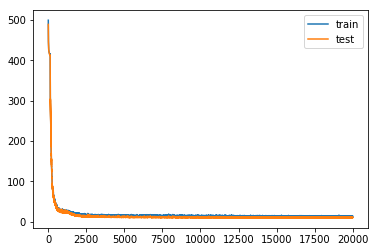

In [318]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [319]:
yhat = model.predict(validateX)

In [320]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

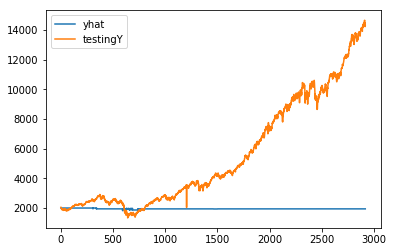

In [321]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [323]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 <= prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
9940.525527667654
9740.528342992706
9582.57350811274
9583.21840264009
9553.940970426956
9400.184282020753
9315.704560178763
9404.64886150544
9304.108148617403
9228.216629423683
9286.128060563973
9378.414220917972
9415.79959444707
9213.292971248758
9313.114266299255
9502.300700192769
9502.63678570929
9281.763819653781
9304.424750915578
9268.946784462853
9254.27592104601
9194.008481726858
9039.113973369069
8983.671553074062
9034.335714068962
9282.990288248855
9231.052411854387
9131.229168482056
9135.640656196741
9310.16061039754
9243.202146816864
9265.369178493505
9303.997094272814
9175.081022181203
9227.01597609292
9487.033163213988
9497.617908662573
9565.502312195287
9422.926068638695
9429.202587429845
9315.26716192683
9235.08300265035
9341.74631690458
9202.88990681128
9065.996430966647
8977.943486879441
8994.697106337799
8978.727686417991
9154.233004386793
8931.666946656751
8832.380953030393
9012.064934254611
9076.630858622026
9007.805415643046
8907.969995259247
9074.40490092564

IndexError: index 2917 is out of bounds for axis 0 with size 2917

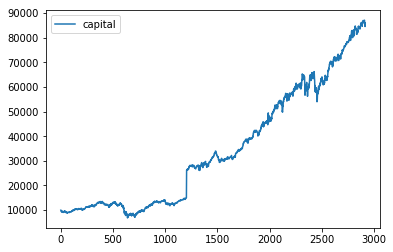

In [316]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()